In [5]:
import sys
# Adjust the path to point to the directory containing 'src'
sys.path.append('../')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

from src.visualizations import plot_target_variable, plot_categorical_features, plot_numerical_features, categorical_vs_target, numerical_vs_target, plot_correlation_heatmap
import shap
from src.evaluation import plot_confusion_matrix
from src.modeling import get_models
from src.feature_engineering import bin_age, features_engineering_extraction, encode_categorical_columns
from src.data_preprocessing import load_data, rename_columns, impute_missing_values, analyze_categorical,standardize_gender


In [6]:
# --- Data Loading ---
df = load_data(filepath='../data/mental-heath-in-tech-2016.csv')
print('Dataset loaded')

Data loaded successfully from: ../data/mental-heath-in-tech-2016.csv
Dataset loaded


In [7]:
df.describe()

Are you self-employed?  \
count             1433.000000   
mean                 0.200279   
std                  0.400349   
min                  0.000000   
25%                  0.000000   
50%                  0.000000   
75%                  0.000000   
max                  1.000000   

       Is your employer primarily a tech company/organization?  \
count                                        1146.000000         
mean                                            0.770506         
std                                             0.420691         
min                                             0.000000         
25%                                             1.000000         
50%                                             1.000000         
75%                                             1.000000         
max                                             1.000000         

       Is your primary role within your company related to tech/IT?  \
count                                         263.000000              
mean                                            0.942966              
std                                             0.232350              
min                                             0.000000              
25%                                             1.000000              
50%                                             1.000000              
75%                                             1.000000              
max                                             1.000000              

       Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?  \
count                                         287.000000                                                                       
mean                                            0.644599                                                                       
std                                             0.479471                                                                       
min                                             0.000000                                                                       
25%                                             0.000000                                                                       
50%                                             1.000000                                                                       
75%                                             1.000000                                                                       
max                                             1.000000                                                                       

       Do you have previous employers?  \
count                      1433.000000   
mean                          0.882066   
std                           0.322643   
min                           0.000000   
25%                           1.000000   
50%                           1.000000   
75%                           1.000000   
max                           1.000000   

       Have you ever sought treatment for a mental health issue from a mental health professional?  \
count                                        1433.000000                                             
mean                                            0.585485                                             
std                                             0.492810                                             
min                                             0.000000                                             
25%                                             0.000000                                             
50%                                             1.000000                                             
75%                                             1.000000                                             
max                                             1.000000                                             

       What is your age

In [8]:
df.shape

(1433, 63)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        1146 non-null   object 
 2   Is your employer primarily a tech company/organization?     

In [10]:

# --- Data Preprocessing ---
print("\n--- Data Preprocessing ---")

column_new_name = ["SelfEmployed", "EmployeeCount", "TechCompany", "TechRole", "EmployerMHBenefits",
                   "MHBenefitsAwareness", "EmployerMHDiscussion", "EmployerMHResources", "EmployerMHAnonymity",
                   "MHLeaveDifficulty", "MHDiscussionEmployerNegative", "PhysicalDiscussionEmployerNegative",
                   "MHDiscussionCoworkerComfort", "MHDiscussionSupervisorComfort", "EmployerMHVsPhysical",
                   "MHNegativeObserved", "PersonalnsuranceMHCoverage", "MHResourceAwareness", "MHDisclosureClients",
                   "MHDisclosureClientsNegative", "MHDisclosureCoworkers", "MHDisclosureCoworkersNegative",
                   "MHProductivityImpact", "MHProductivityPercent", "PreviousEmployers",
                   "PreviousEmployerMHBenefits", "PreviousEmployerMHBenefitsAwareness",
                   "PreviousEmployerMHDiscussion", "PreviousEmployerMHResources", "PreviousEmployerMHAnonymity",
                   "PreviousEmployerMHDiscussionNegative", "PreviousEmployerPhysicalDiscussionNegative",
                   "PreviousMHDiscussionCoworkerComfort", "PreviousMHDiscussionSupervisorComfort",
                   "PreviousEmployerMHVsPhysical", "PreviousMHNegativeObserved", "PhysicalInterviewDisclosure",
                   "PhysicalInterviewDisclosureReason", "MHInterviewDisclosure", "MHInterviewDisclosureReason",
                   "MHCareerImpact", "MHStigmaCoworker", "MHDisclosureFamilyFriends", "MHUnsupportiveResponse",
                   "MHDisclosureInfluenced", "FamilyMHHistory", "PastMHDisorder", "CurrentMHDisorder",
                   "CurrentMHDisorderConditions", "MHSelfDiagnosis", "ProfessionalMHDiagnosis",
                   "ProfessionalMHDiagnosisDetails", "MHTreatmentSought", "MHTreatmentEffectiveWorkImpact",
                   "MHTreatmentIneffectiveWorkImpact", "Age", "Gender", "CountryLive", "StateLive", "CountryWork",
                   "StateWork", "WorkPosition", "RemoteWork"]



--- Data Preprocessing ---


In [11]:

# Renaming columns
df_rename = rename_columns(df=df, renamed_columns=column_new_name)

# df.rename(columns=dict(zip(columns, renamed_columns)), inplace=True)
print("Columns renamed.")

Columns renamed.


In [12]:
# Feature engineering
print("\n--- Feature Engineering ---")

# Binning age
df_bin = bin_age(df=df_rename)



--- Feature Engineering ---
Age feature binned.


In [13]:

# Gender Feature Standardizationa

analyze_categorical(df=df_bin)

df_gender_cleaned = standardize_gender(df=df_bin)



Column 'CountryLive' has 53 unique values: ['United Kingdom' 'United States of America' 'Canada' 'Germany'
 'Netherlands' 'Czech Republic' 'Lithuania' 'Australia' 'France'
 'Venezuela' 'Poland' 'Belgium' 'Brazil' 'Denmark' 'Sweden' 'Russia'
 'Spain' 'India' 'Mexico' 'Switzerland' 'Norway' 'Argentina' 'Ireland'
 'Italy' 'Finland' 'Colombia' 'Costa Rica' 'Vietnam' 'Bulgaria'
 'New Zealand' 'South Africa' 'Slovakia' 'Austria' 'Bangladesh' 'Algeria'
 'Pakistan' 'Afghanistan' 'Greece' 'Romania' 'Other' 'Brunei' 'Japan'
 'Iran' 'Hungary' 'Israel' 'Ecuador' 'Bosnia and Herzegovina' 'China'
 'Chile' 'Guatemala' 'Taiwan' 'Serbia' 'Estonia']
Column 'CountryWork' has 53 unique values: ['United Kingdom' 'United States of America' 'Canada' 'Germany'
 'Netherlands' 'Czech Republic' 'Lithuania' 'Australia' 'France'
 'Venezuela' 'Poland' 'Belgium' 'Brazil' 'Denmark' 'Sweden' 'Russia'
 'Spain' 'India' 'United Arab Emirates' 'Mexico' 'Switzerland' 'Norway'
 'Argentina' 'Ireland' 'Italy' 'Finland' 'Turke

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\data_preprocessing.py:79: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace(to_replace=replacements,


In [14]:
print(f'Gender features cleaned unique values: {df_gender_cleaned.Gender.unique()}')


Gender features cleaned unique values: ['Male' 'Female' 'Others' nan]


In [15]:

# More Feature Engineering
df_feature_eng = features_engineering_extraction(df=df_gender_cleaned)

print("Employment features engineered.")


Employment features engineered.


In [16]:
df_feature_eng.head()

Age Age_group               CountryLive               CountryWork  \
0   39     30-39            United Kingdom            United Kingdom   
1   29     18-29  United States of America  United States of America   
2   38     30-39            United Kingdom            United Kingdom   
3   43     40-49            United Kingdom            United Kingdom   
4   43     40-49  United States of America  United States of America   

  CurrentMHDisorder                        CurrentMHDisorderConditions  \
0                No                                                NaN   
1               Yes  Anxiety Disorder (Generalized, Social, Phobia,...   
2                No                                                NaN   
3               Yes  Anxiety Disorder (Generalized, Social, Phobia,...   
4               Yes  Anxiety Disorder (Generalized, Social, Phobia,...   

  EmployeeCount EmployerMHAnonymity               EmployerMHBenefits  \
0        26-100        I don't know  Not eligible for coverage / N/A   
1          2-25                 Yes                               No   
2          2-25        I don't know                               No   
3           NaN                 NaN                              NaN   
4          2-25                  No                              Yes   

  EmployerMHDiscussion  ... StateLive StateWork TechCompany TechRole  \
0                   No  ...       NaN       NaN         1.0      NaN   
1                  Yes  ...  Illinois  Illinois         1.0      NaN   
2                   No  ...       NaN       NaN         1.0      NaN   
3                  NaN  ...       NaN       NaN         NaN      NaN   
4                   No  ...  Illinois  Illinois         0.0      1.0   

                                        WorkPosition  \
0                                 Back-end Developer   
1             Back-end Developer|Front-end Developer   
2                                 Back-end Developer   
3                               Supervisor/Team Lead   
4  Executive Leadership|Supervisor/Team Lead|Dev ...   

  CurrentMHDisorderConditions_count MHSelfDiagnosisConditions_count  \
0                                 0                               0   
1                                 2                               0   
2                                 0                               0   
3                                 2                               0   
4                                 2                               0   

  MHPHDiagnosisConditions_count role_count         EmploymentCompanySize  
0                             1          1  Tech Employee Medium Company  
1                             2          2   Tech Employee Small Company  
2                             0          1   Tech Employee Small Company  
3                             2          1                         Other  
4                             1          7                     Tech-Role  

[5 rows x 69 columns]

In [56]:

# Dropping Unnecessary Columns
dropped_cols = ['Age', 'CurrentMHDisorderConditions', 'EmployeeCount', 'MHInterviewDisclosureReason',
                'MHResourceAwareness', 'MHProductivityImpact', 'MHProductivityPercent',
                'MHSelfDiagnosis', 'PersonalnsuranceMHCoverage', 'SelfEmployed', 'TechCompany',
                # 'TechRole', 'WorkPosition', 'PhysicalInterviewDisclosureReason',
                # 'PreviousEmployerMHAnonymity', 'PreviousEmployerMHBenefits',
                # 'PreviousEmployerMHBenefitsAwareness', 'PreviousEmployerMHDiscussion',
                # 'PreviousEmployerMHDiscussionNegative', 'PreviousEmployerMHResources',
                'PreviousEmployerMHVsPhysical', 'PreviousEmployerPhysicalDiscussionNegative',
                'PreviousEmployers', 'PreviousMHDiscussionCoworkerComfort',
                'PreviousMHDiscussionSupervisorComfort']
df_feature_eng = df_feature_eng.drop(columns=dropped_cols, errors='ignore')
print("Unnecessary columns dropped.")

Unnecessary columns dropped.


In [57]:
# Missing values imputation
df_cleaned = impute_missing_values(df_feature_eng)
print("Missing values imputed.")

Missing values imputed.


In [58]:
df_cleaned.columns.to_list()

['Age_group',
 'CountryLive',
 'CountryWork',
 'CurrentMHDisorder',
 'EmployerMHAnonymity',
 'EmployerMHBenefits',
 'EmployerMHDiscussion',
 'EmployerMHResources',
 'EmployerMHVsPhysical',
 'FamilyMHHistory',
 'Gender',
 'MHBenefitsAwareness',
 'MHCareerImpact',
 'MHDisclosureClients',
 'MHDisclosureClientsNegative',
 'MHDisclosureCoworkers',
 'MHDisclosureCoworkersNegative',
 'MHDisclosureFamilyFriends',
 'MHDisclosureInfluenced',
 'MHDiscussionCoworkerComfort',
 'MHDiscussionEmployerNegative',
 'MHDiscussionSupervisorComfort',
 'MHInterviewDisclosure',
 'MHLeaveDifficulty',
 'MHNegativeObserved',
 'MHStigmaCoworker',
 'MHTreatmentEffectiveWorkImpact',
 'MHTreatmentIneffectiveWorkImpact',
 'MHTreatmentSought',
 'MHUnsupportiveResponse',
 'PastMHDisorder',
 'PhysicalDiscussionEmployerNegative',
 'PhysicalInterviewDisclosure',
 'PreviousMHNegativeObserved',
 'ProfessionalMHDiagnosis',
 'ProfessionalMHDiagnosisDetails',
 'RemoteWork',
 'StateLive',
 'StateWork',
 'CurrentMHDisorderCondit

In [59]:
# --- Exploratory Data Analysis ---
print("\n--- Exploratory Data Analysis started ---")



--- Exploratory Data Analysis started ---


c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')


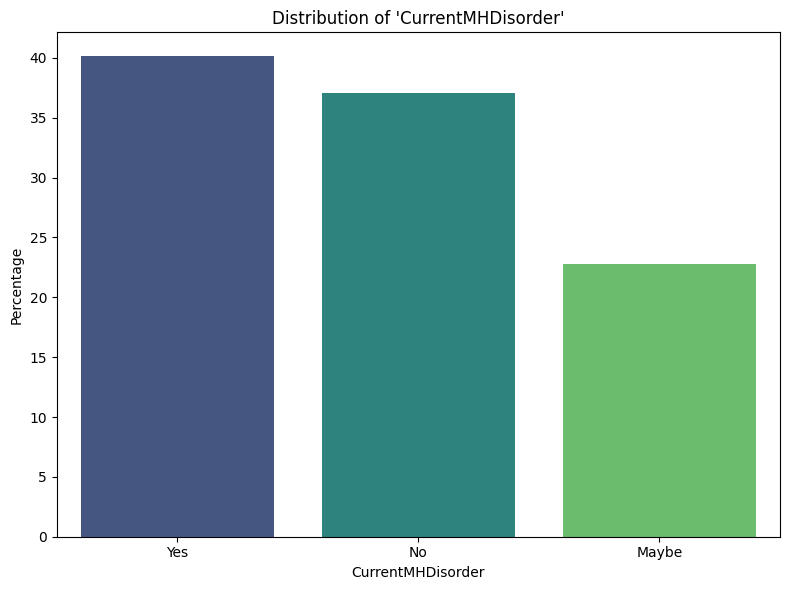

In [60]:
target_variable = plot_target_variable(df_cleaned)

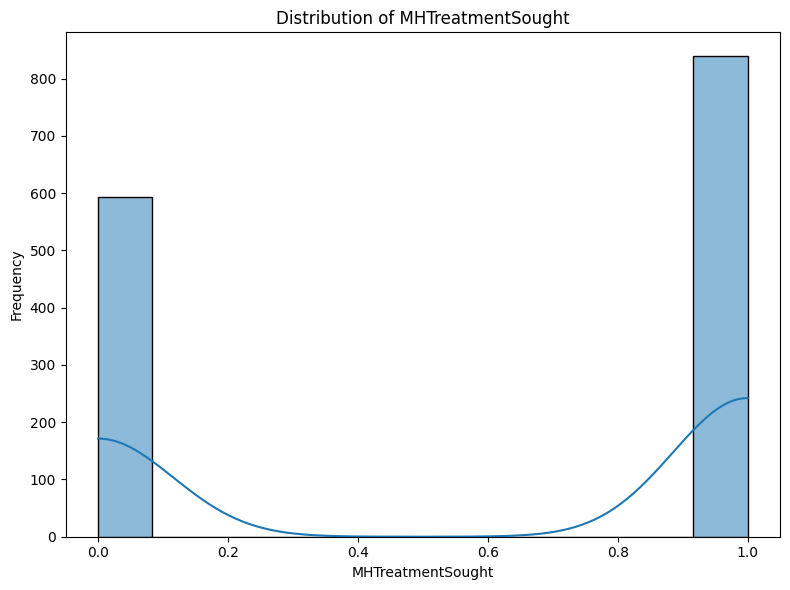

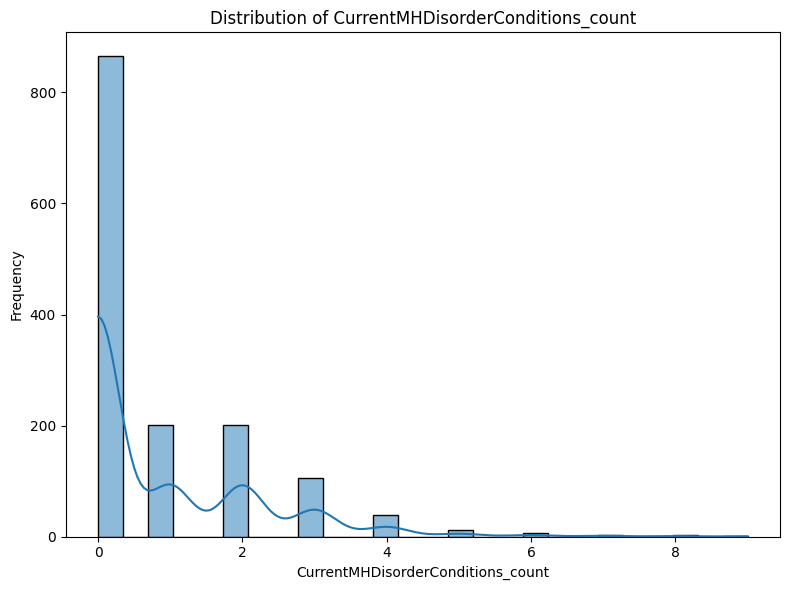

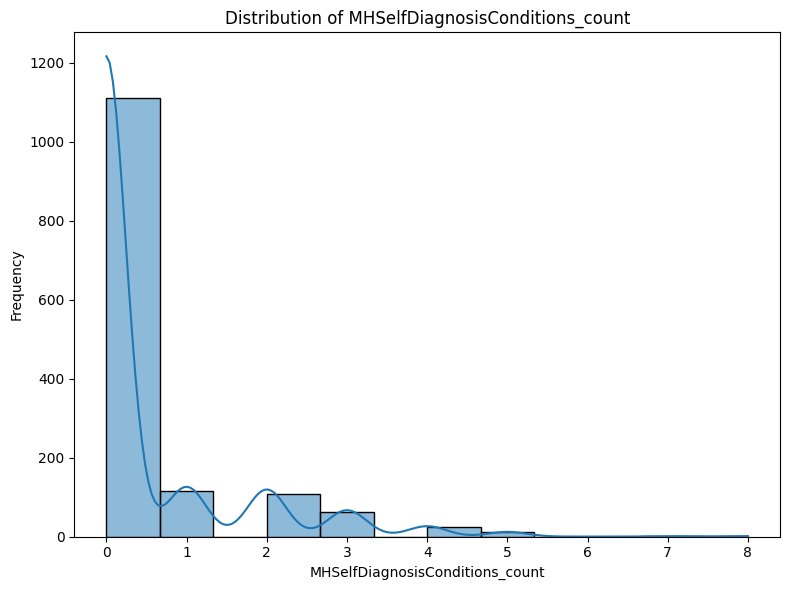

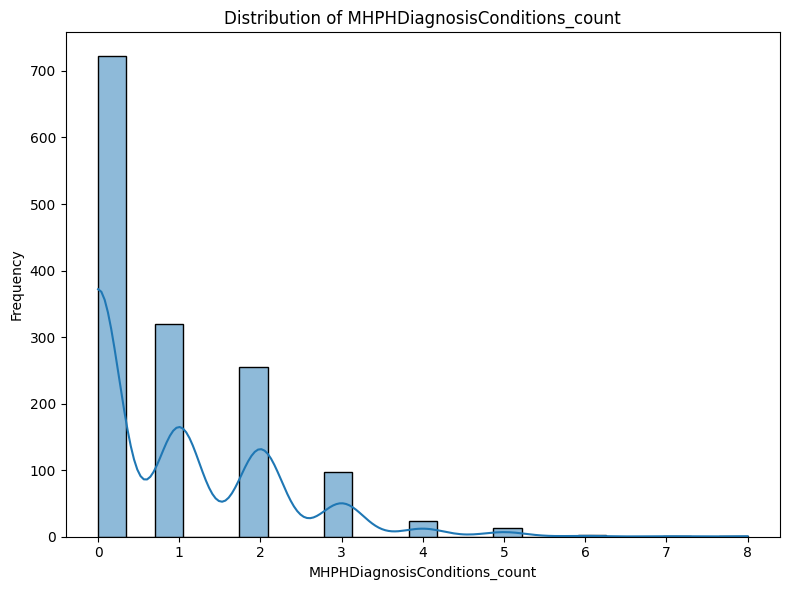

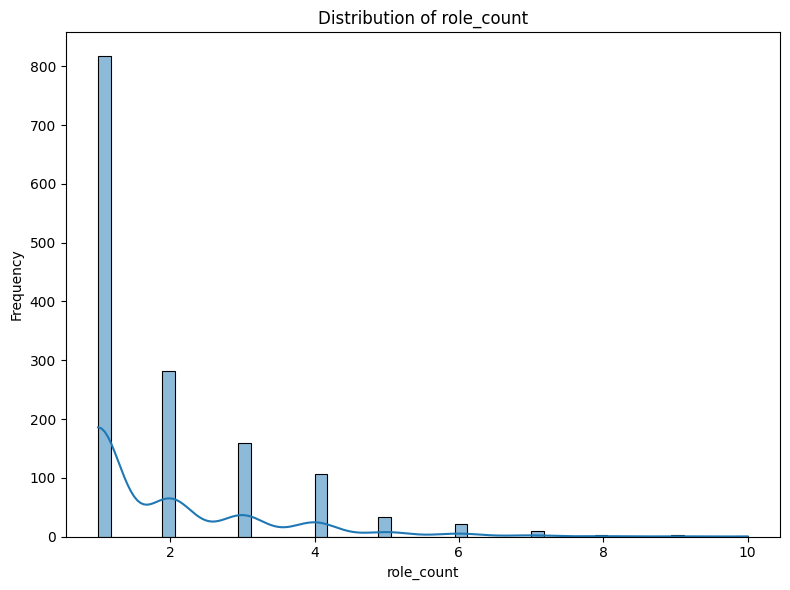

In [61]:
plot_numerical_features(df_cleaned)


In [62]:
categorical_cols = df_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


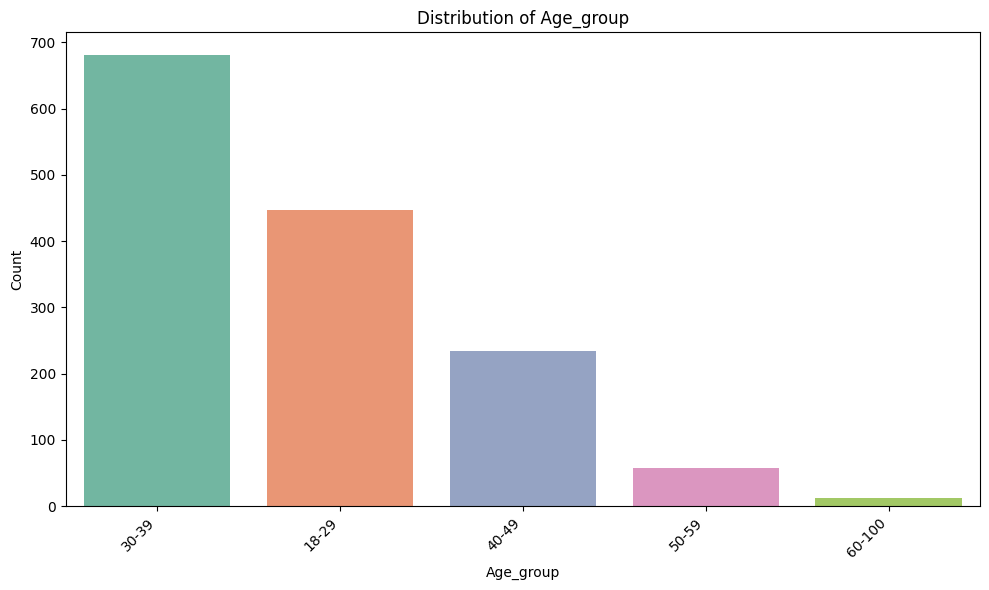

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


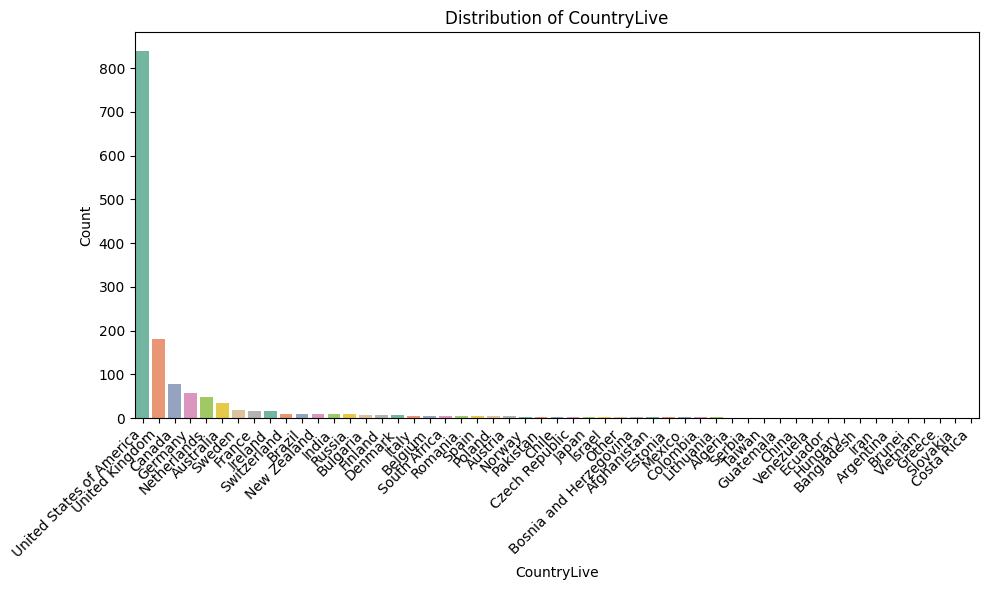

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


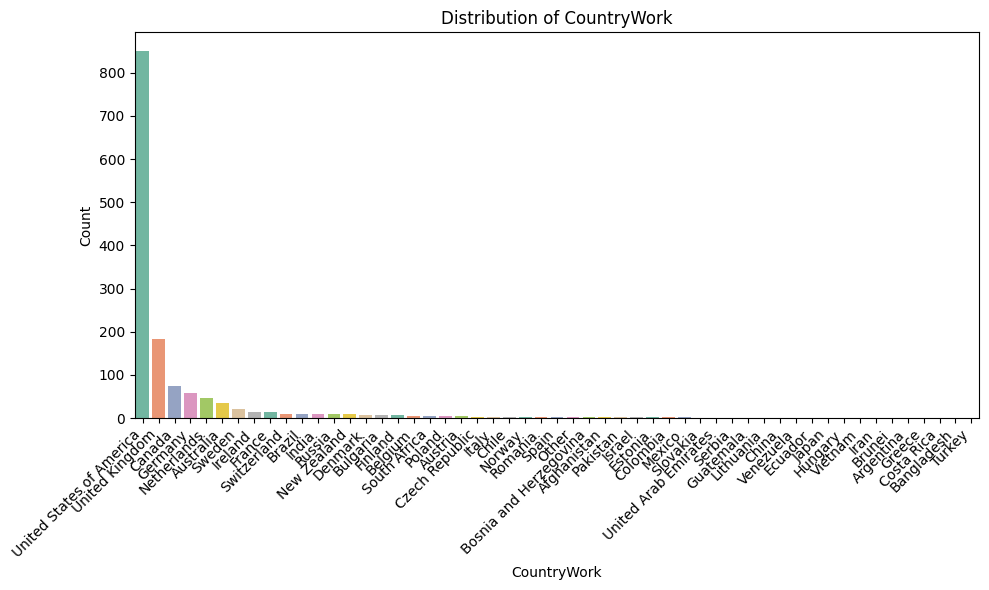

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


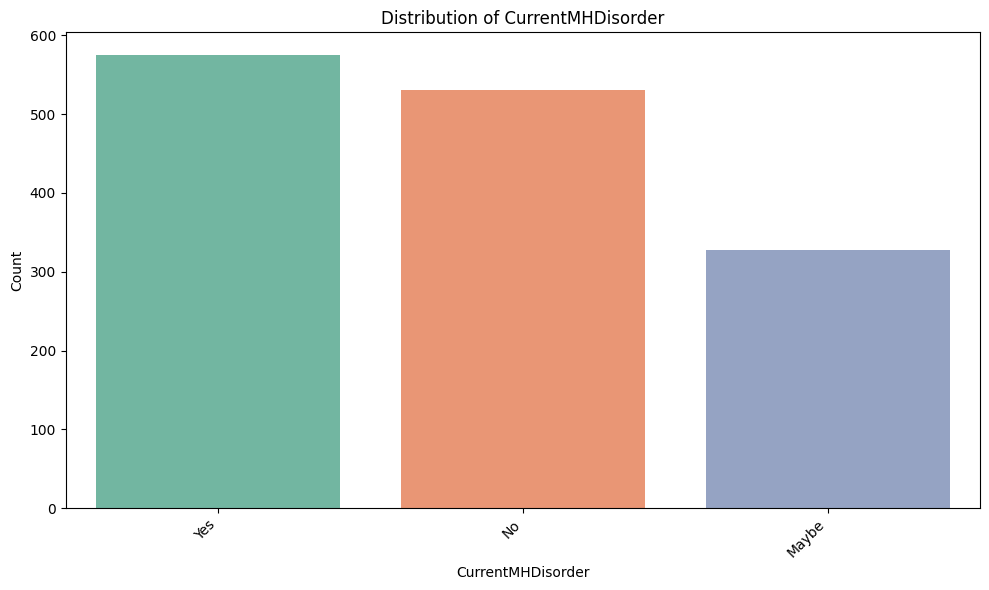

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


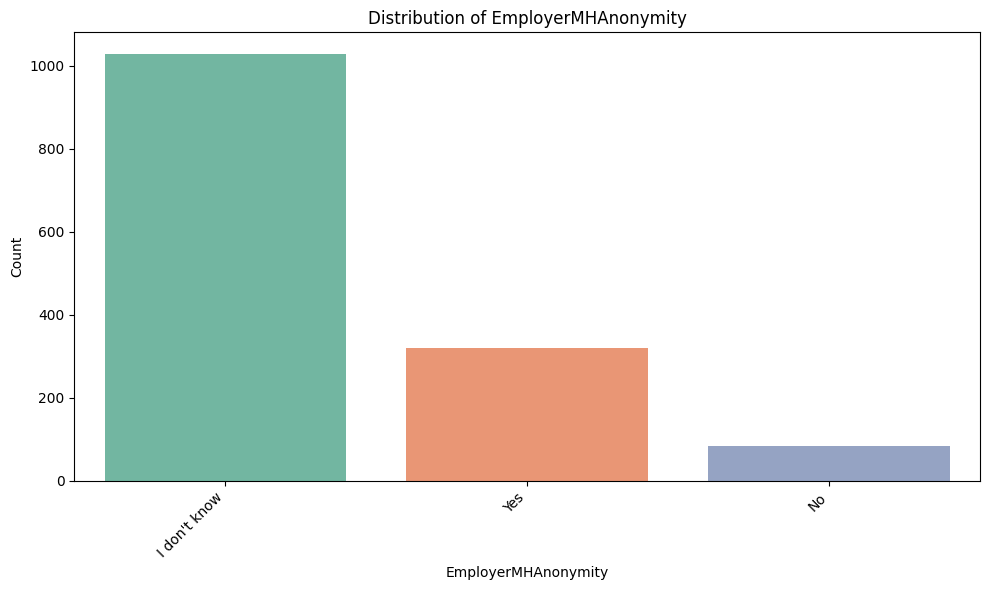

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


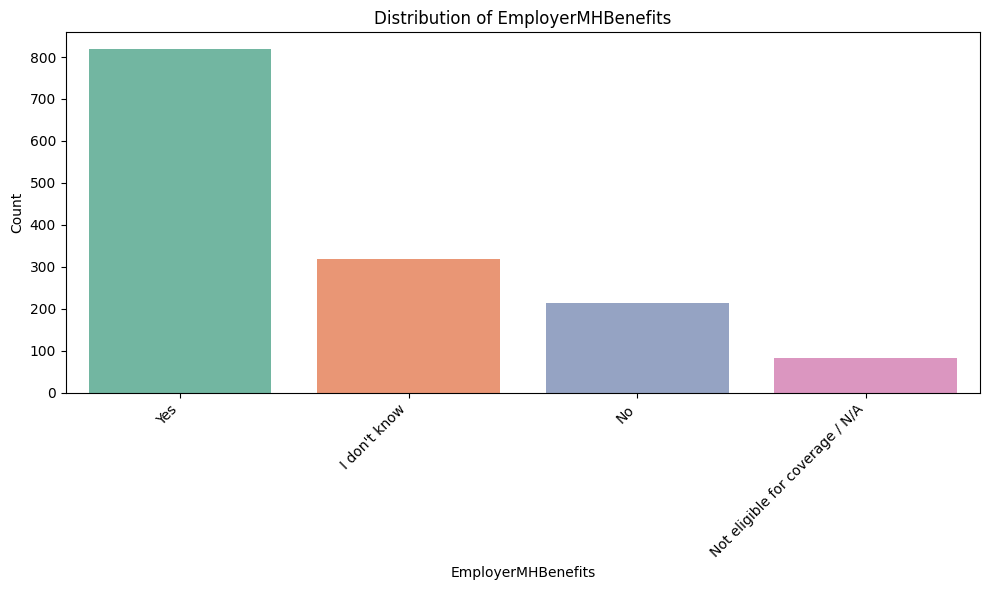

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


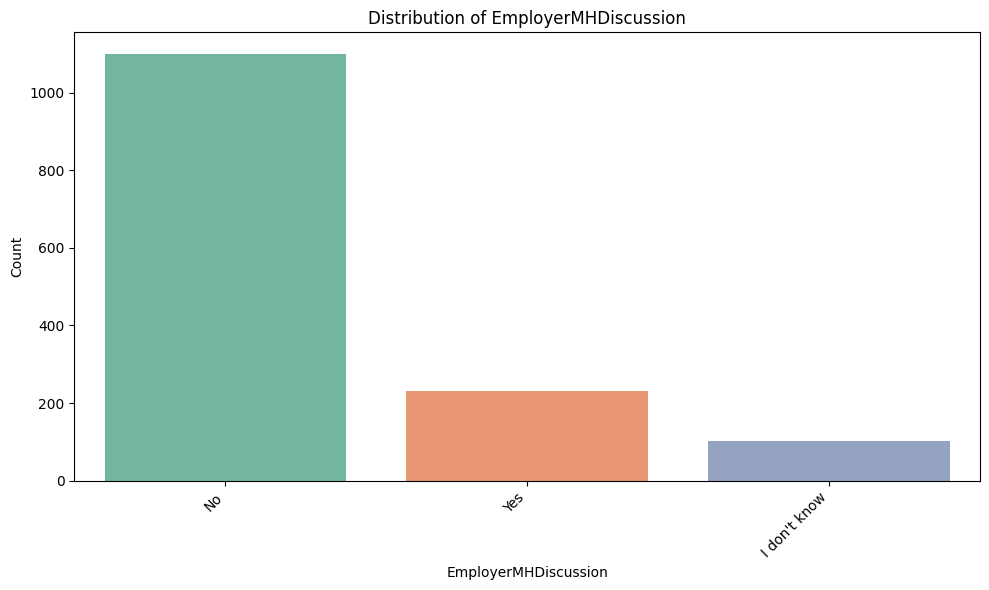

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


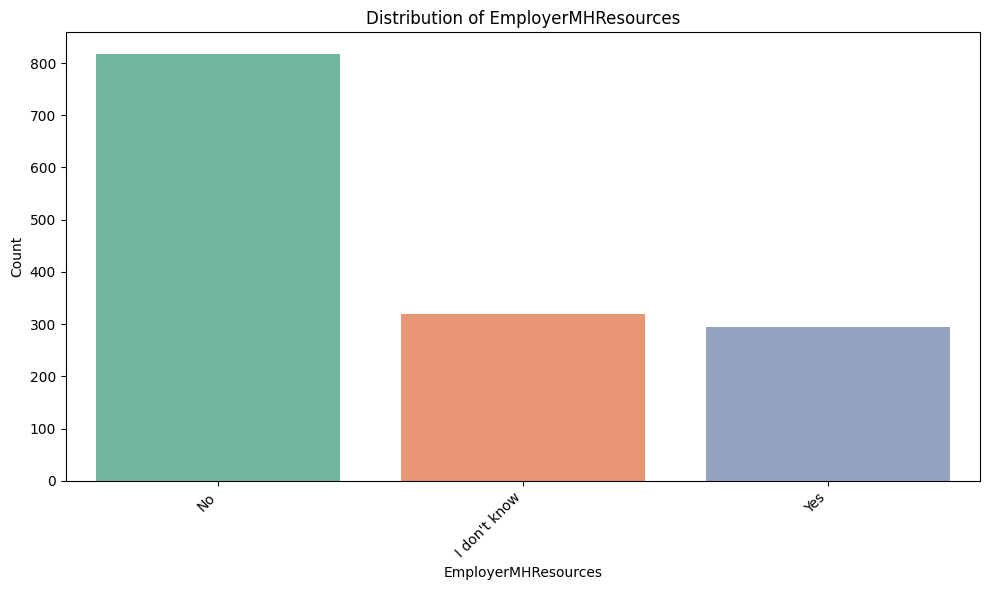

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


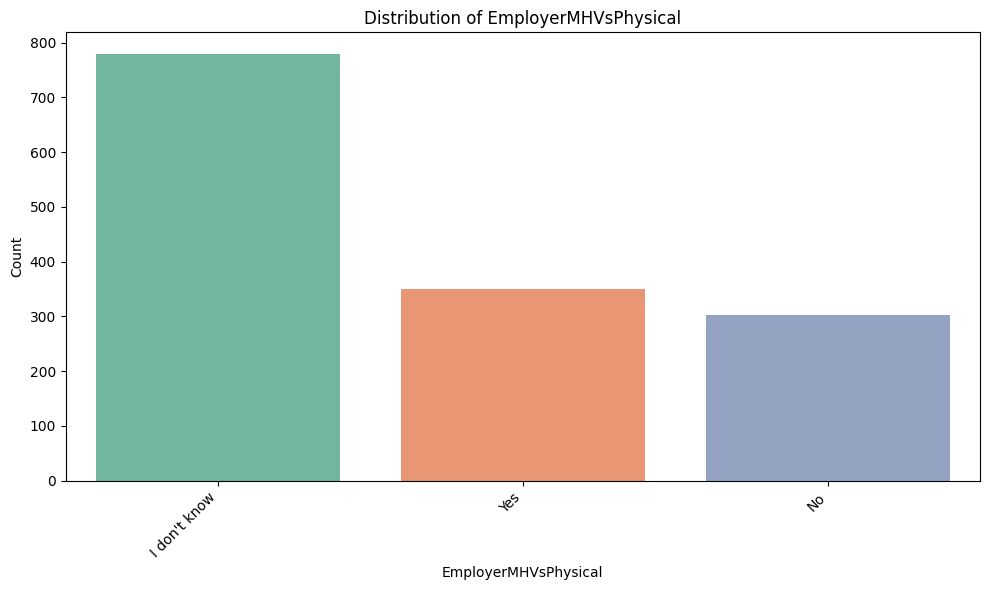

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


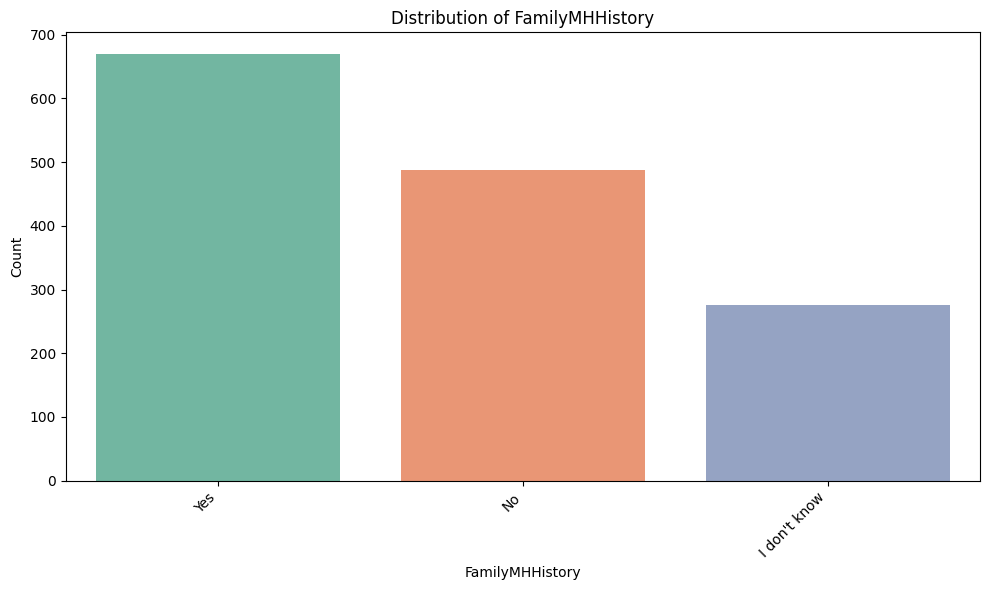

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


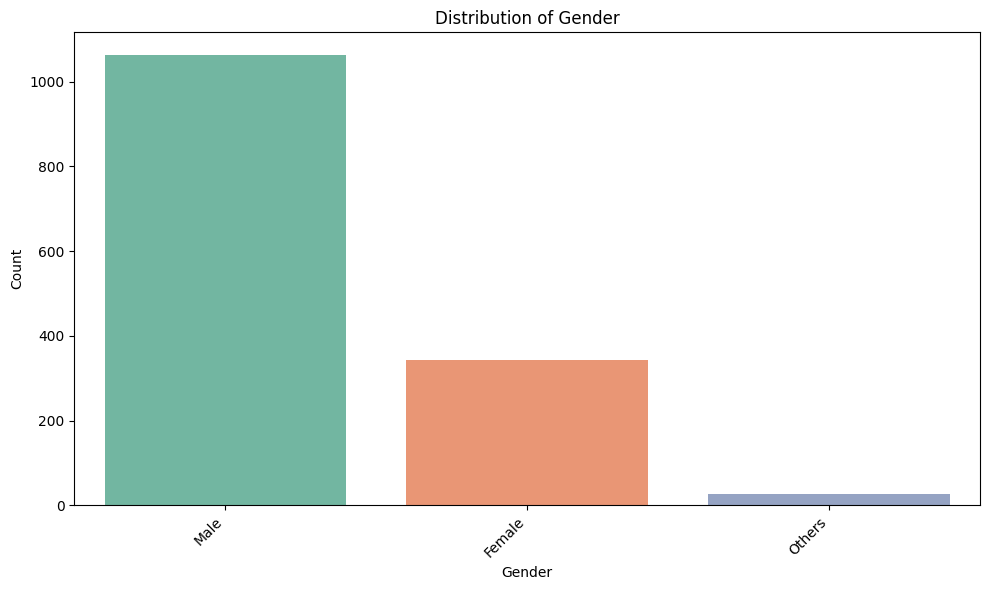

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


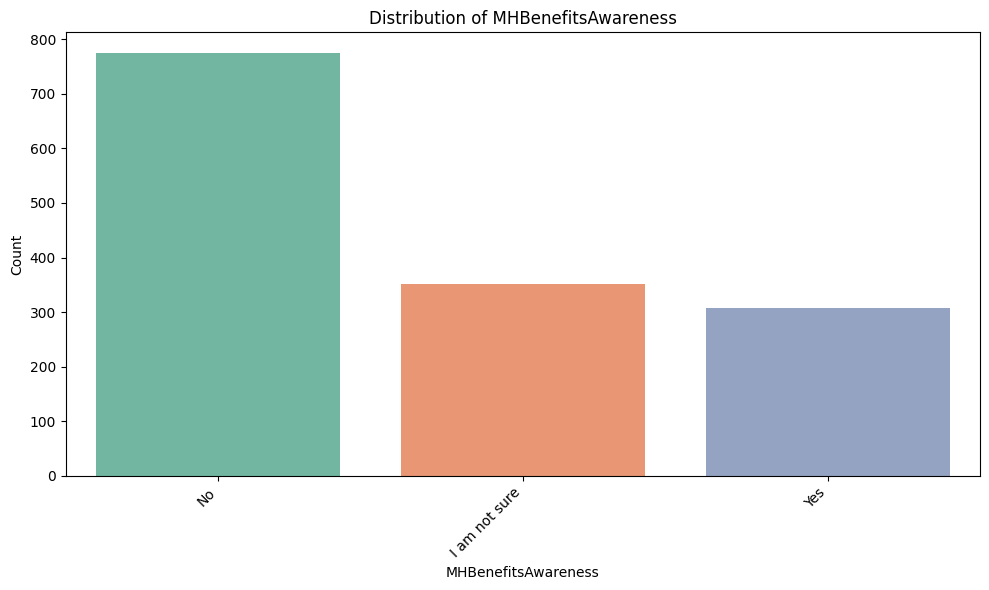

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


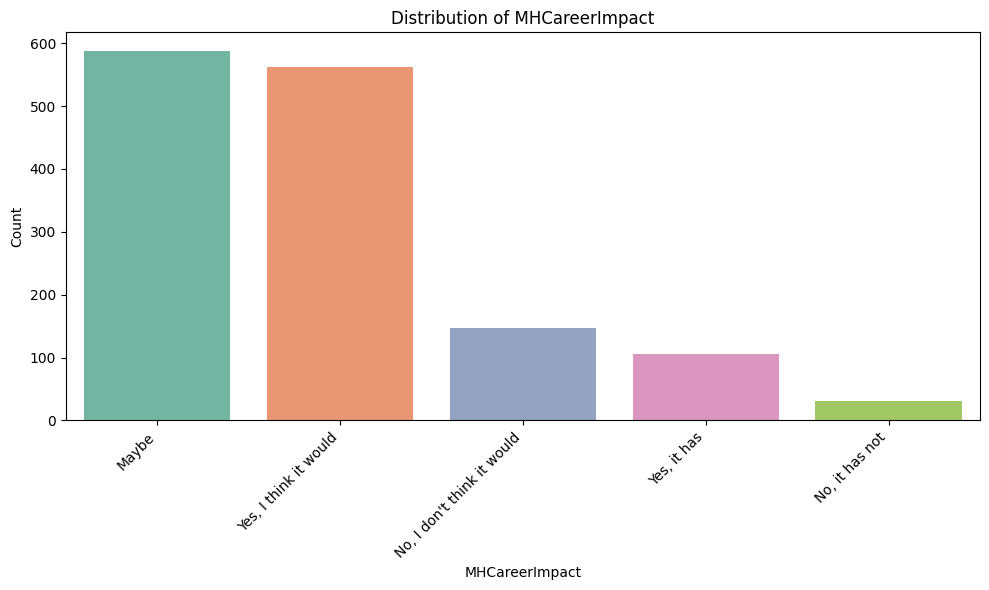

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


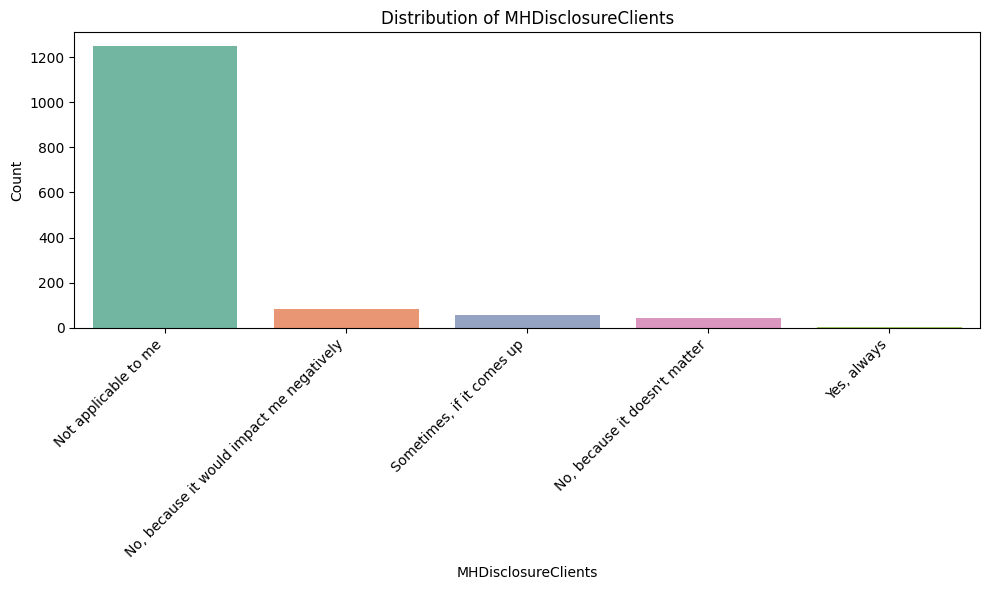

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


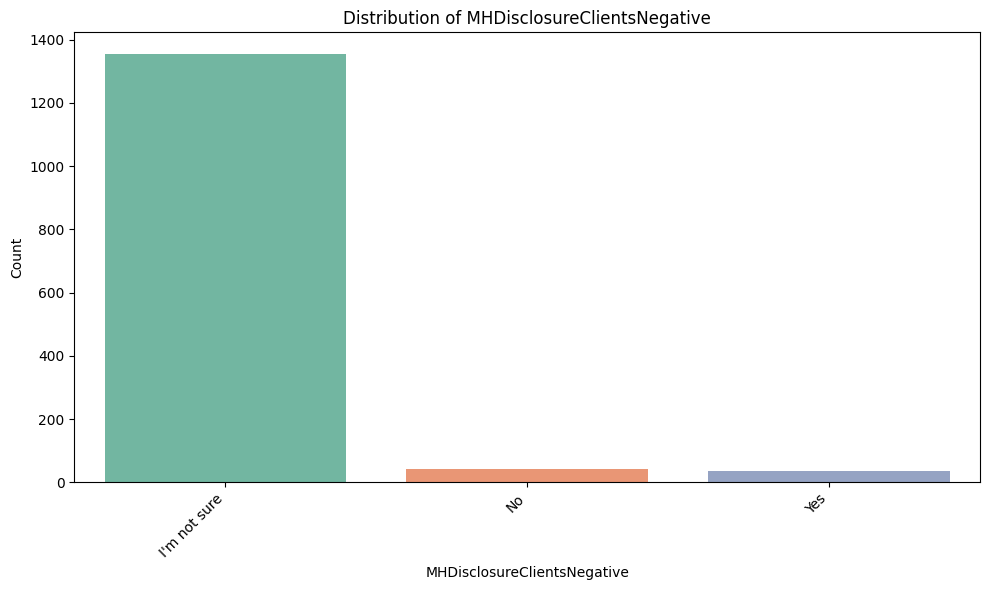

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


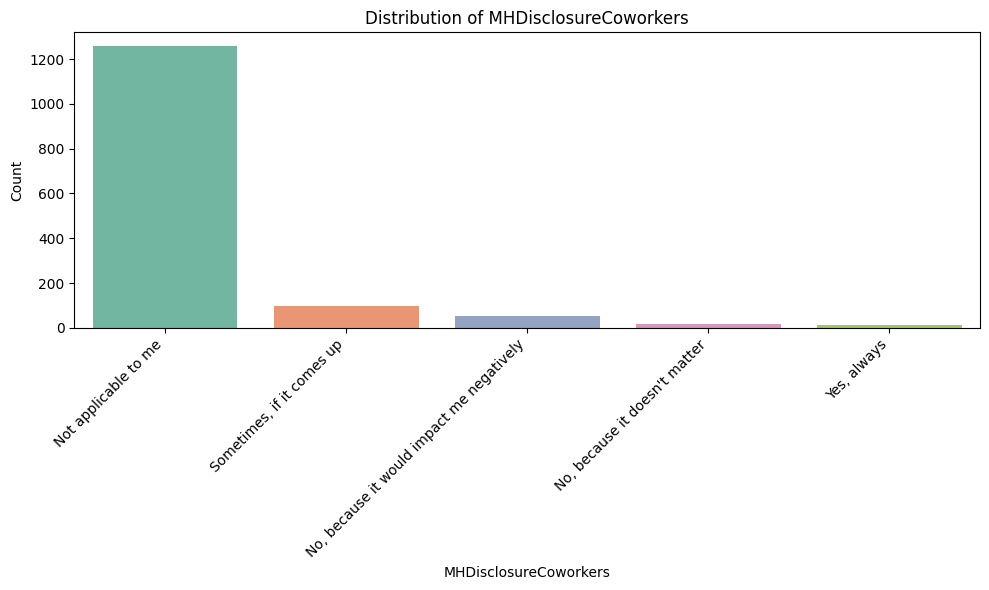

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


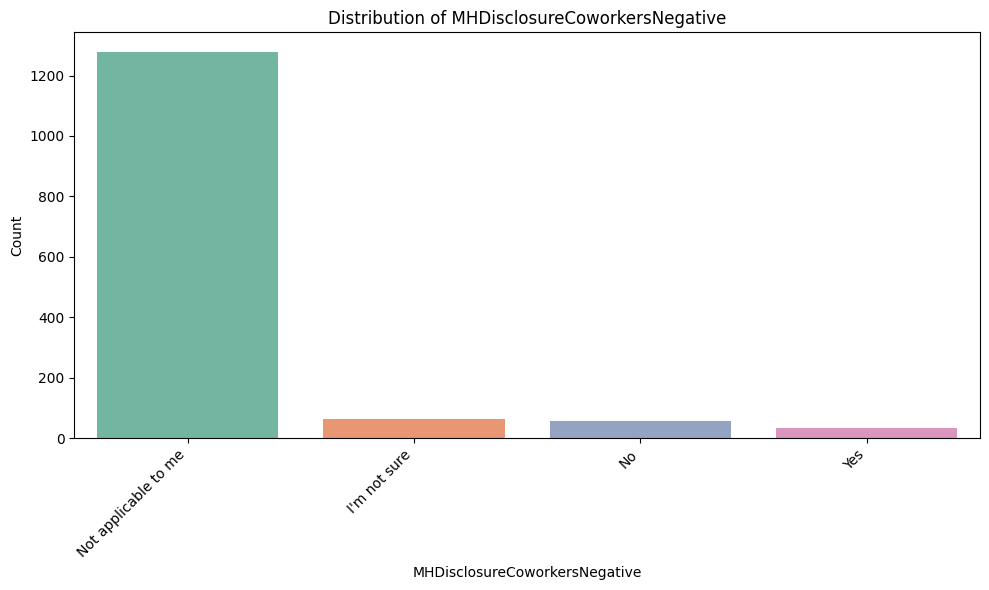

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


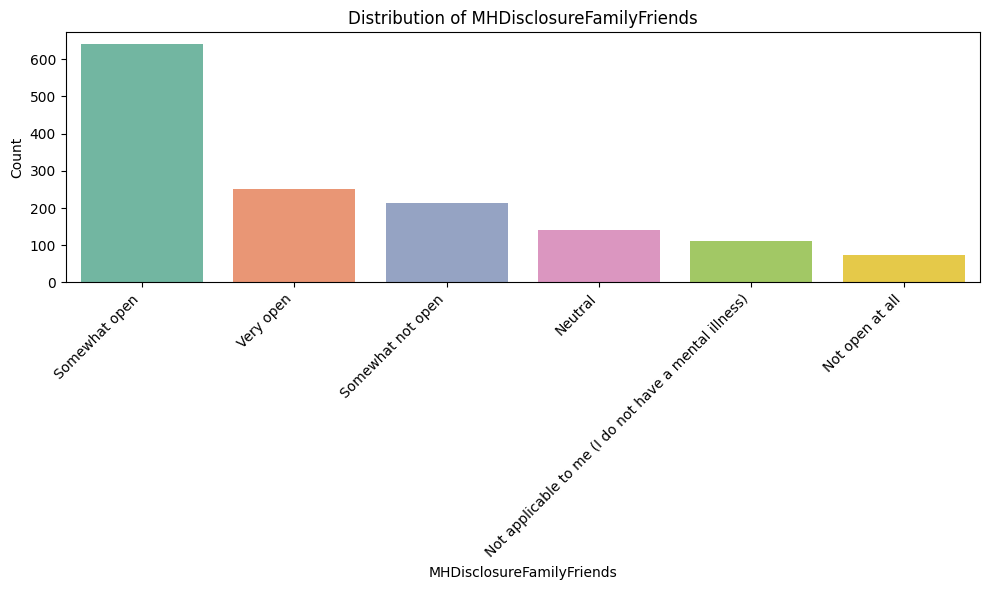

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


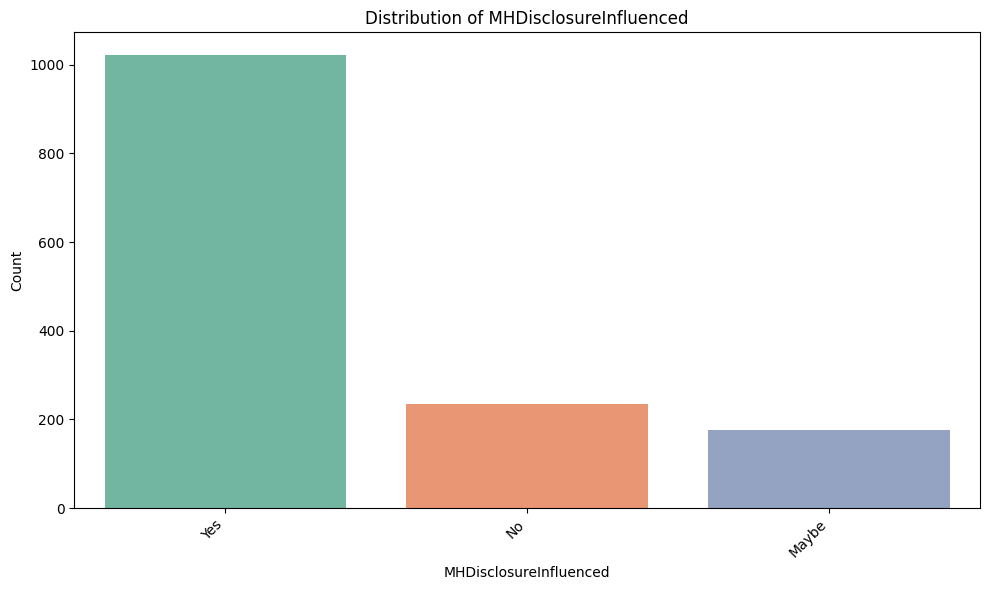

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


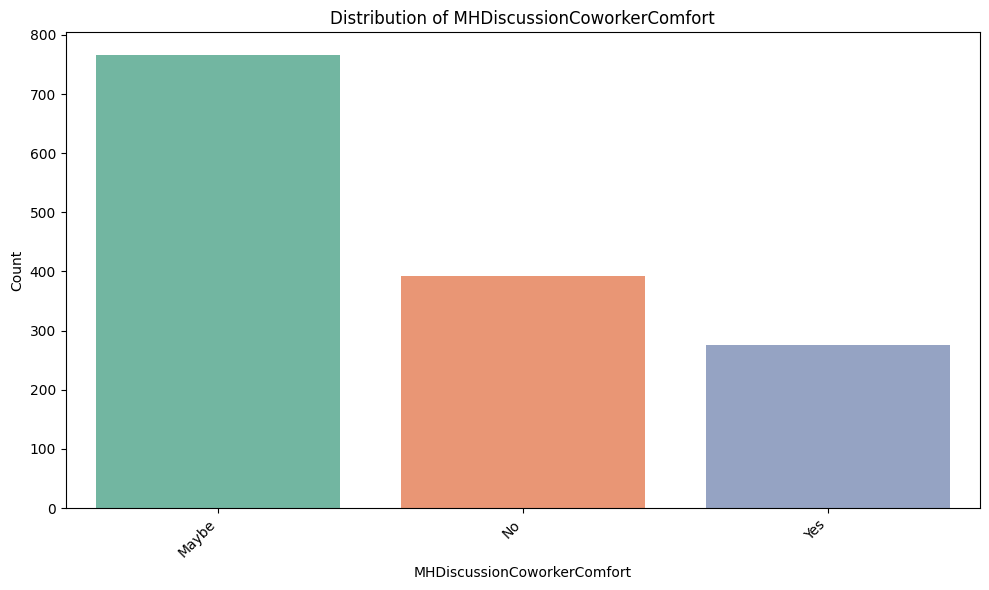

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


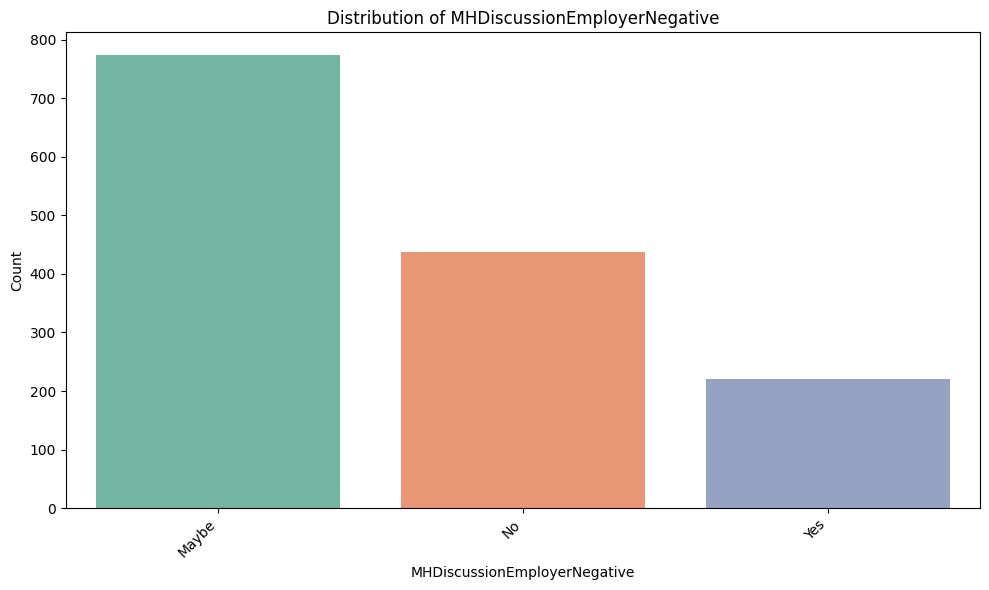

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


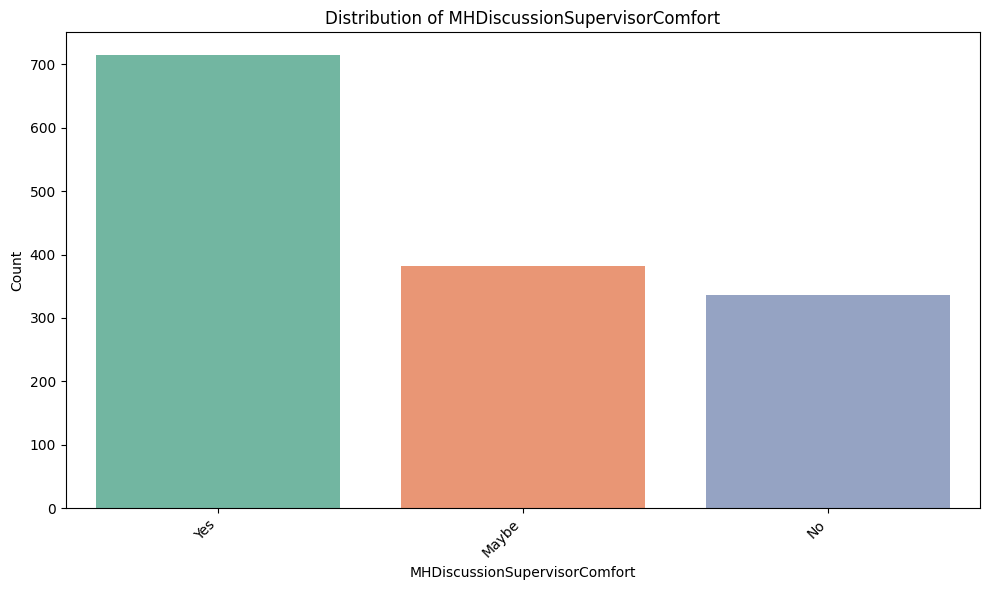

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


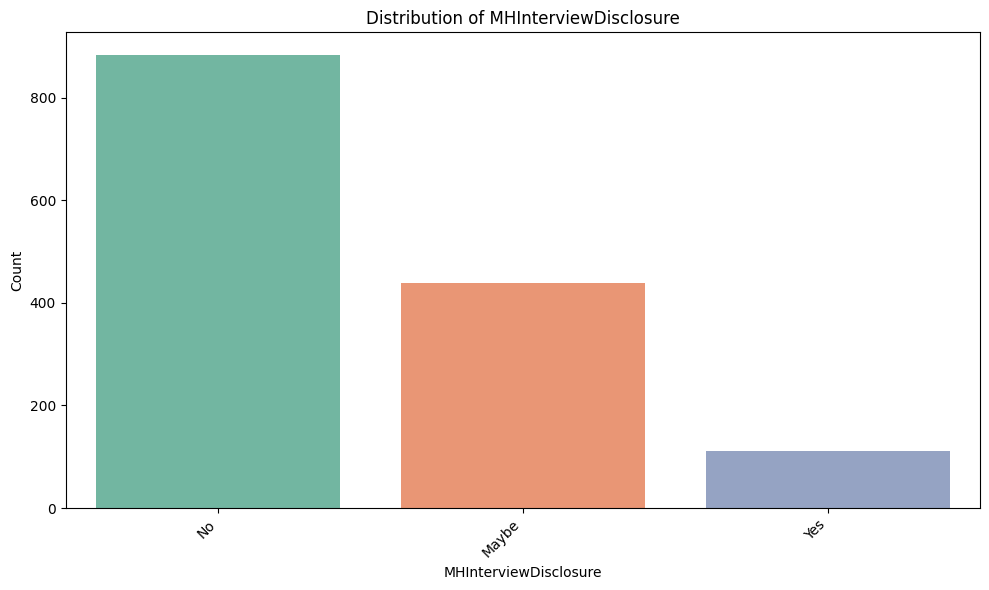

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


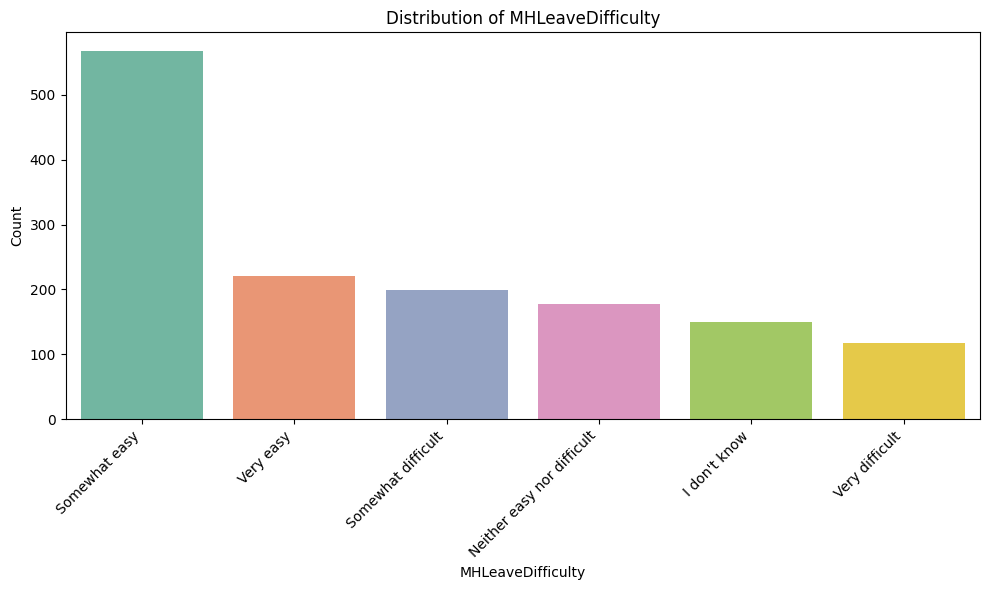

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


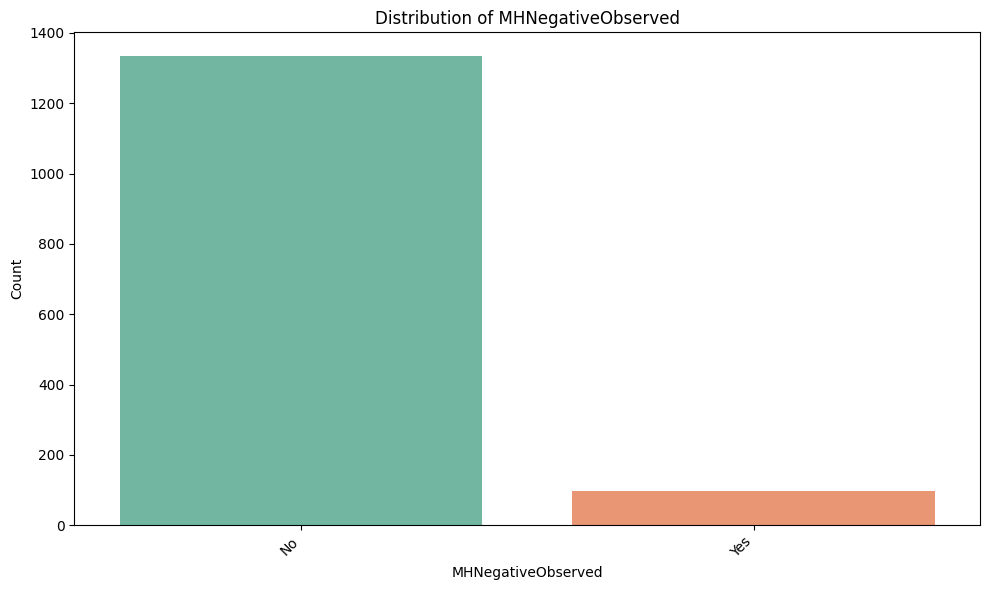

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


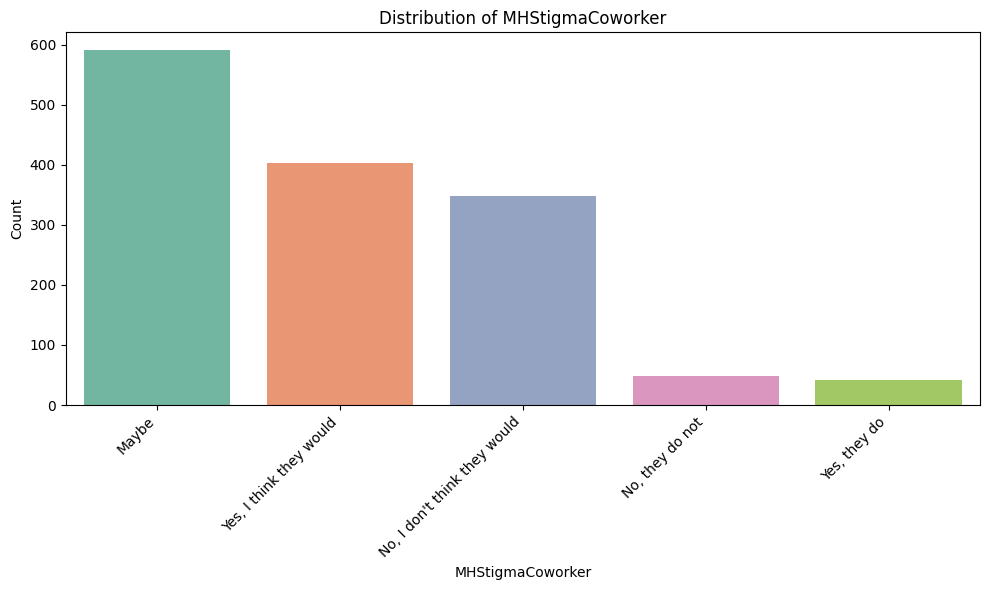

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


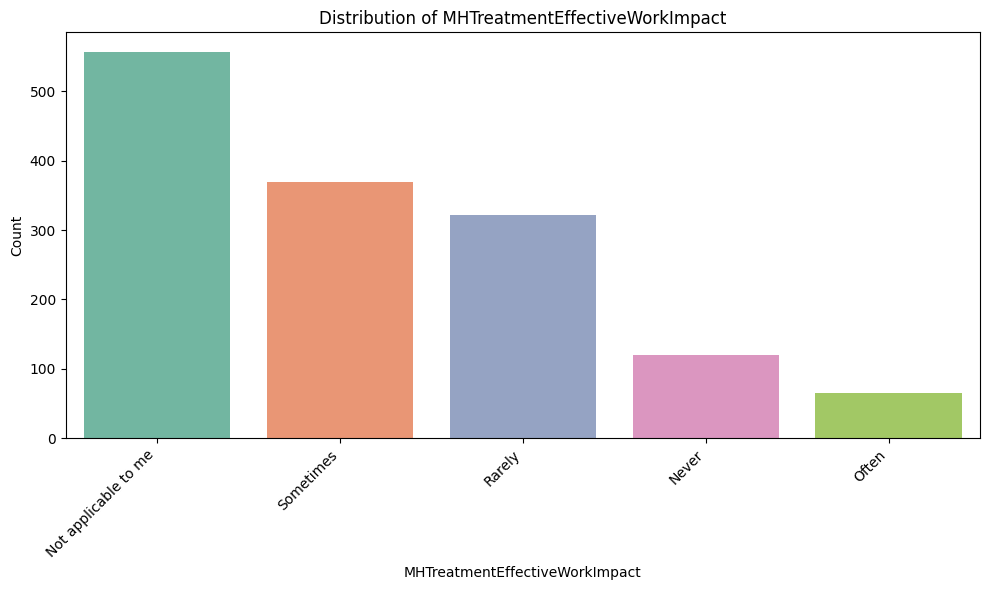

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


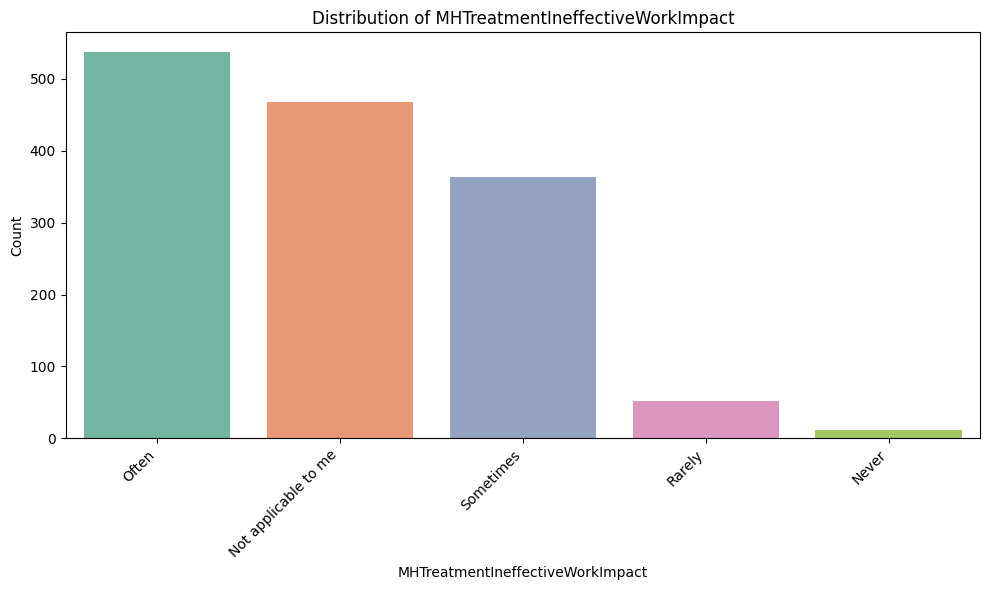

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


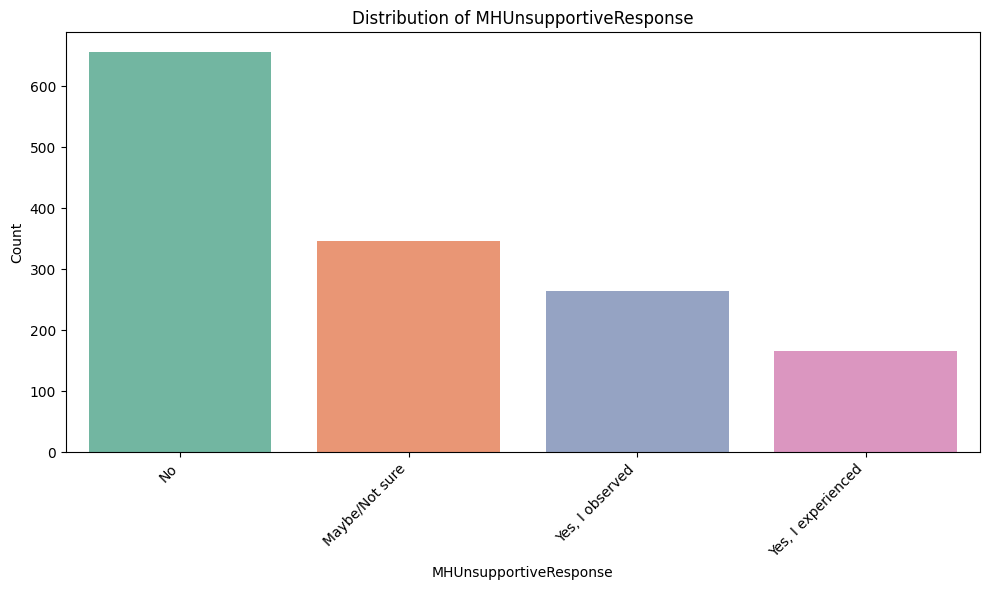

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


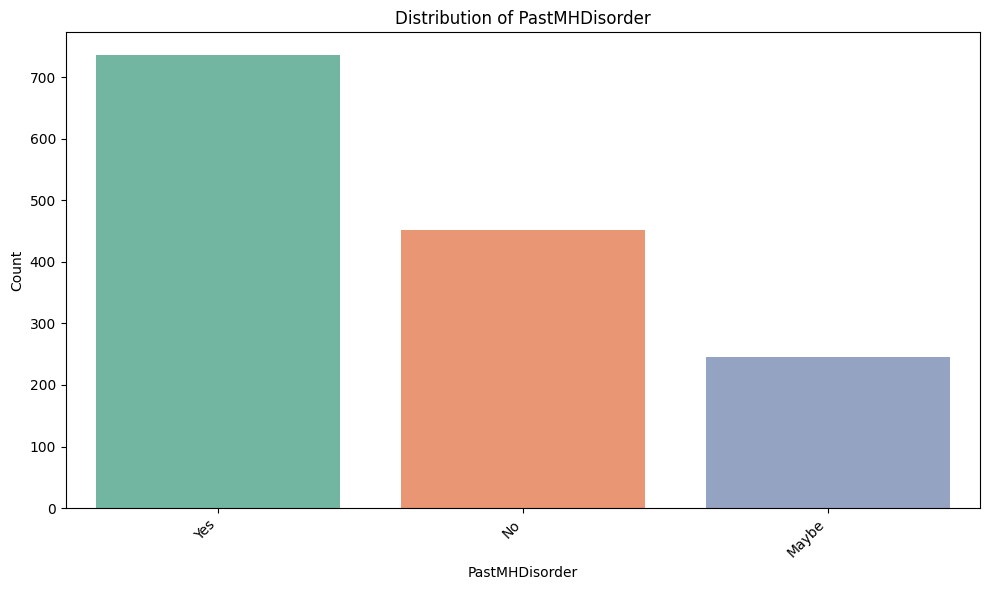

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


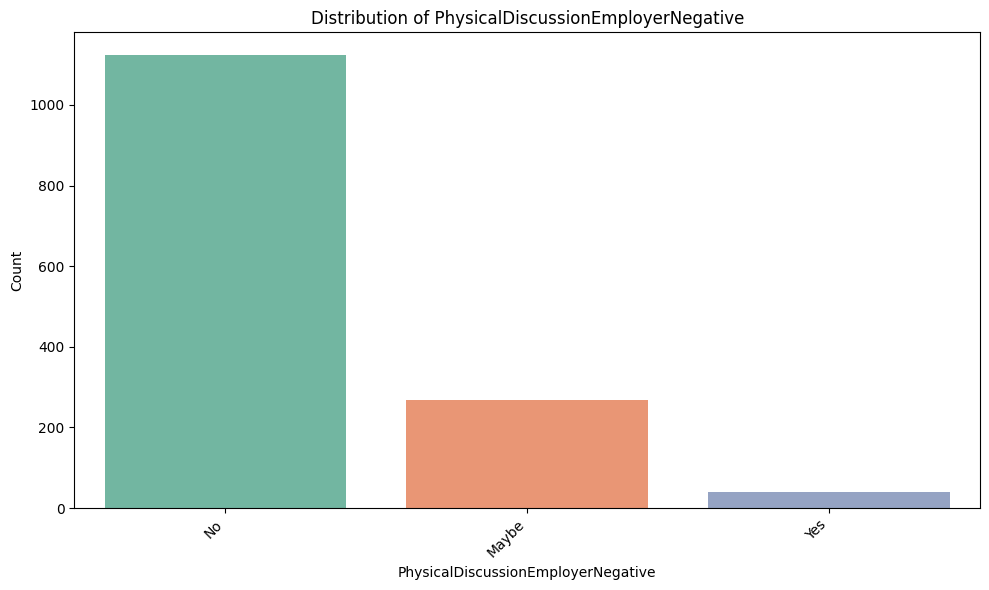

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


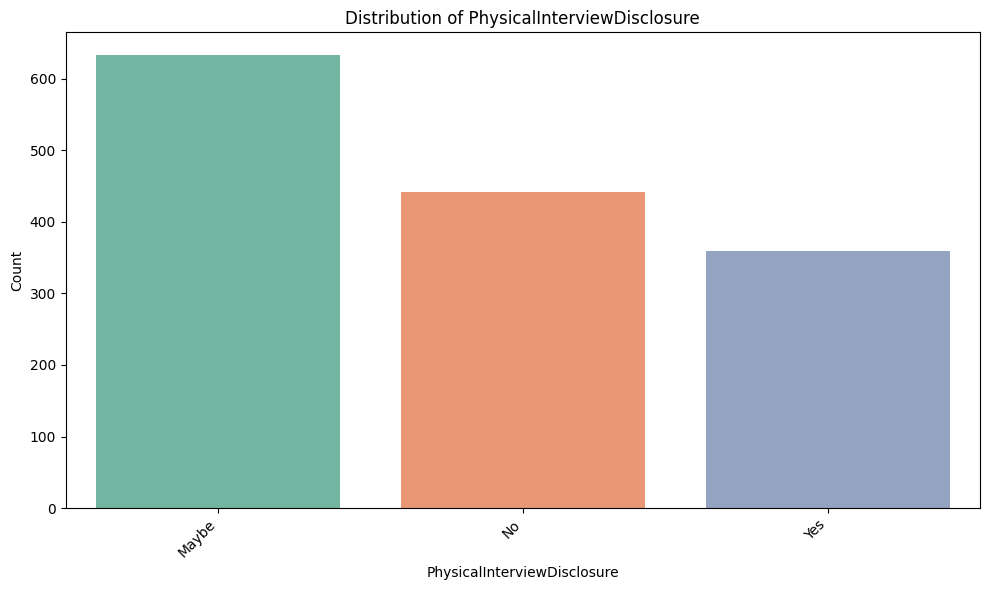

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


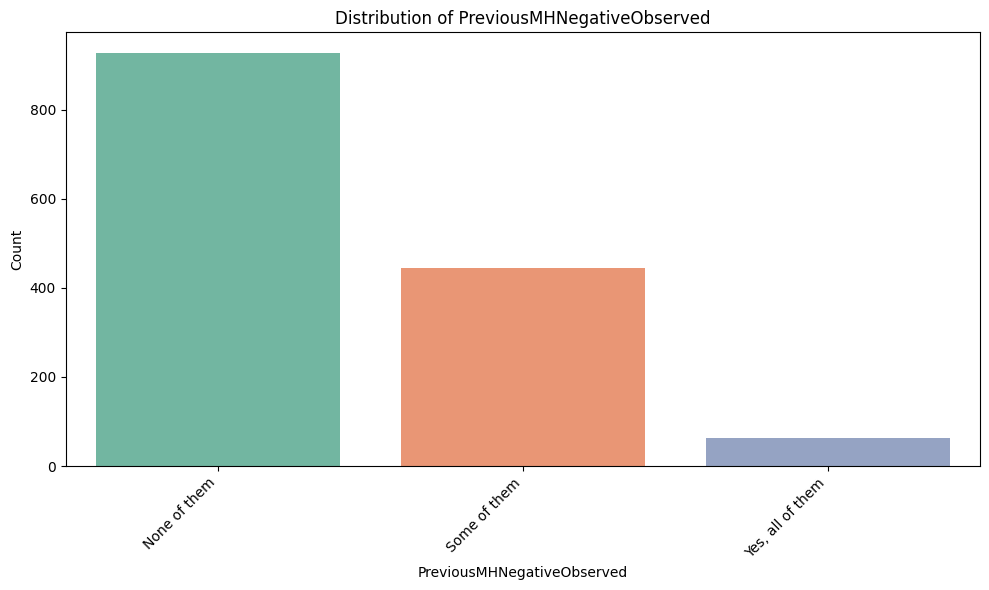

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


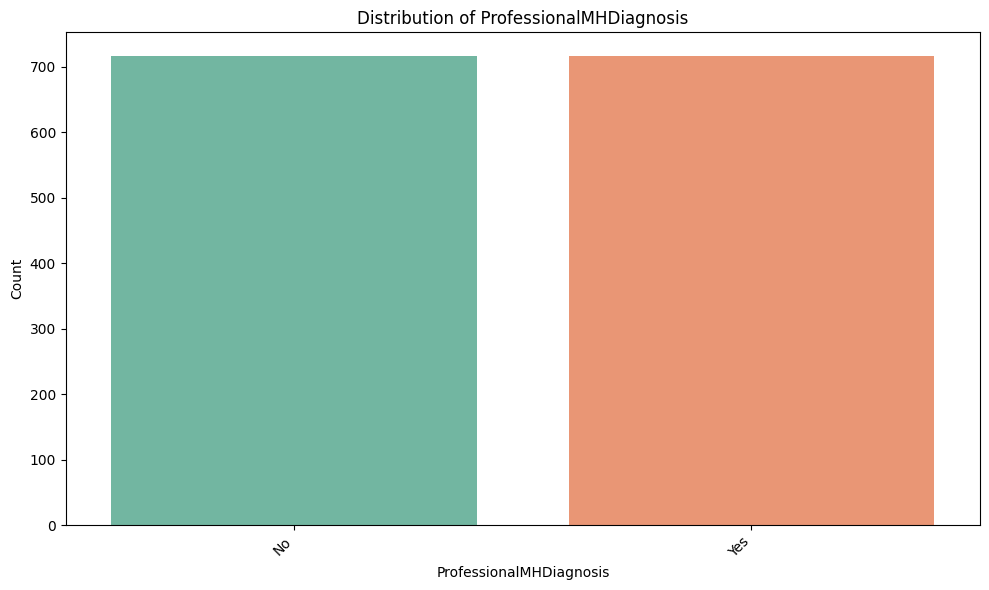

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:78: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


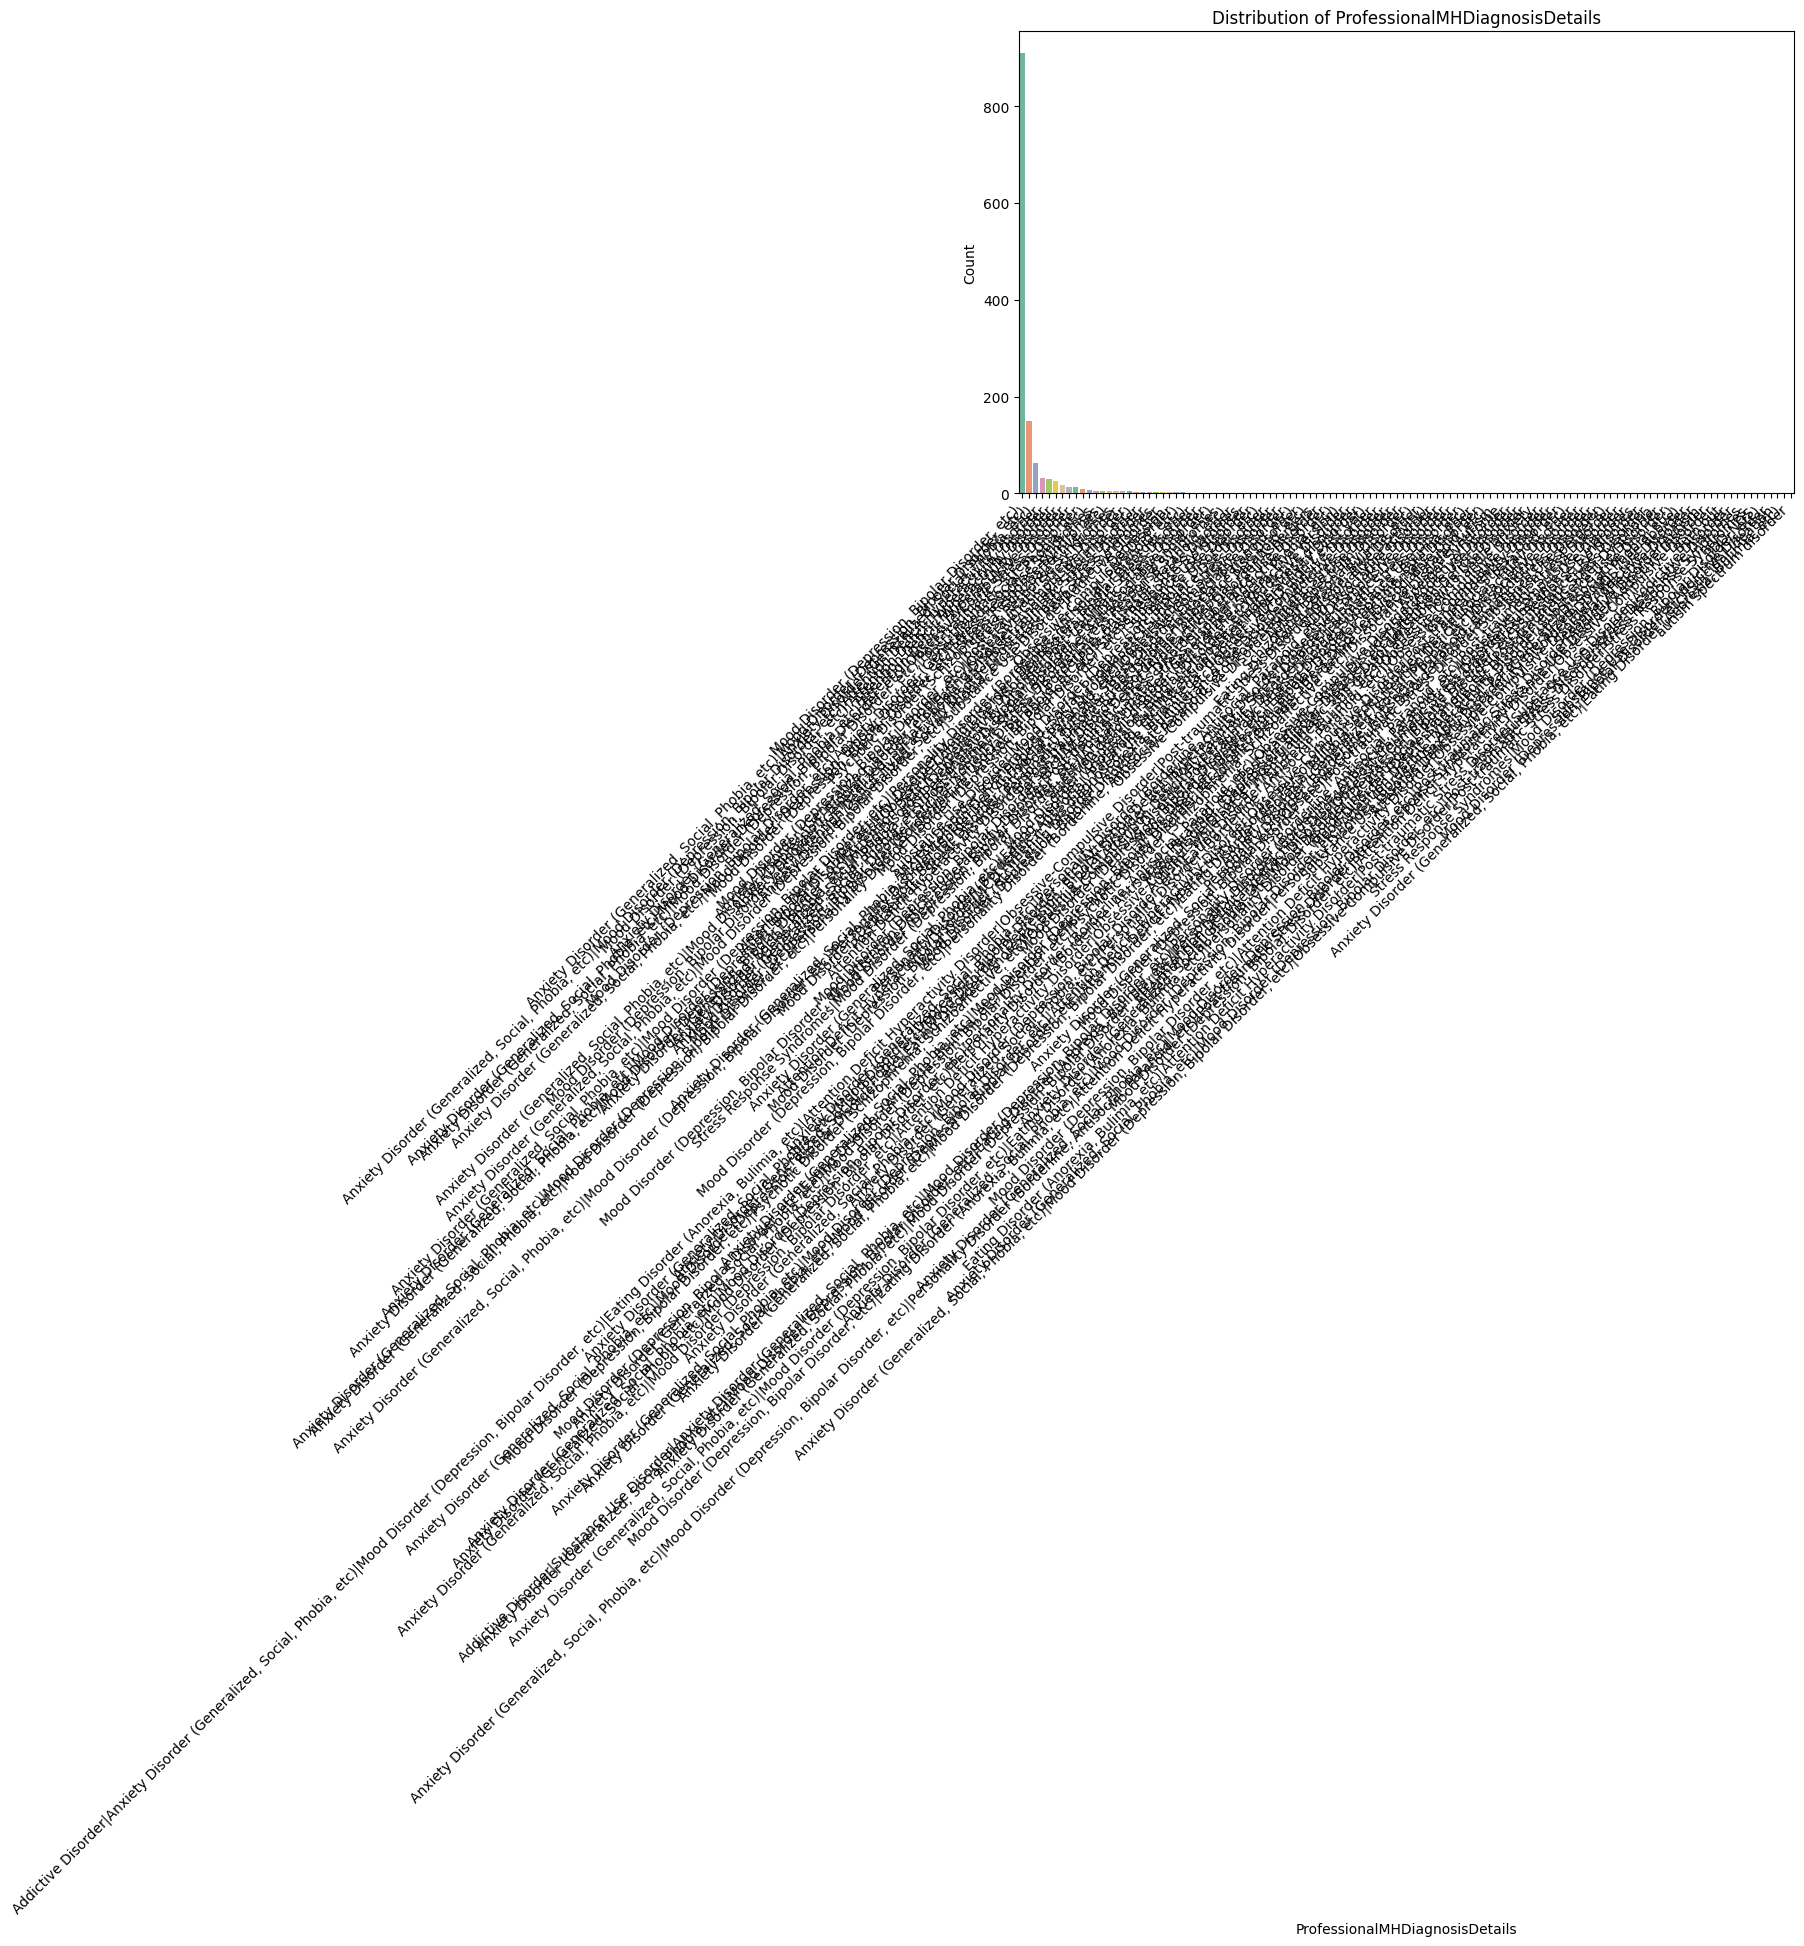

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


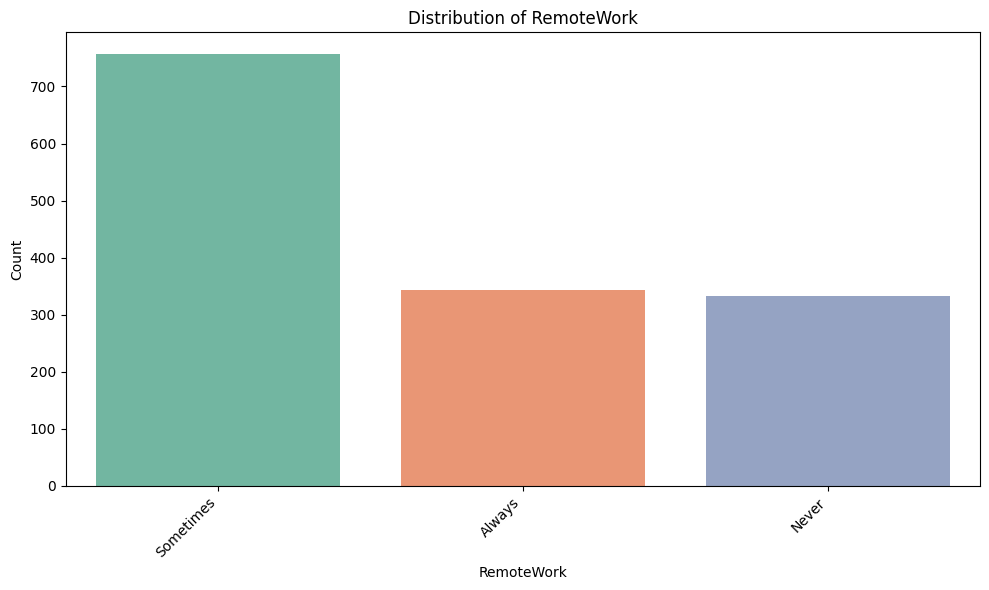

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


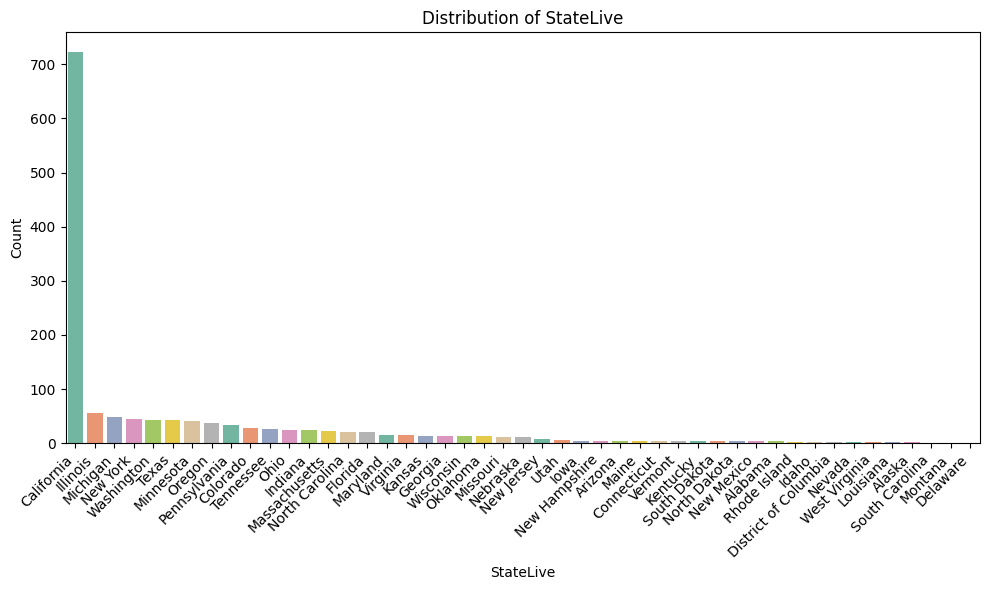

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


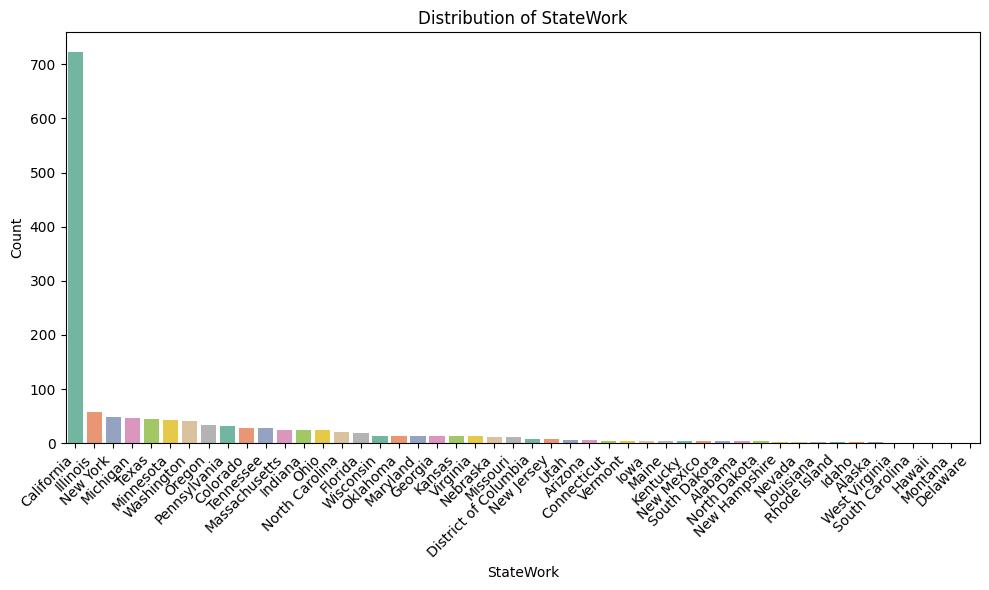

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


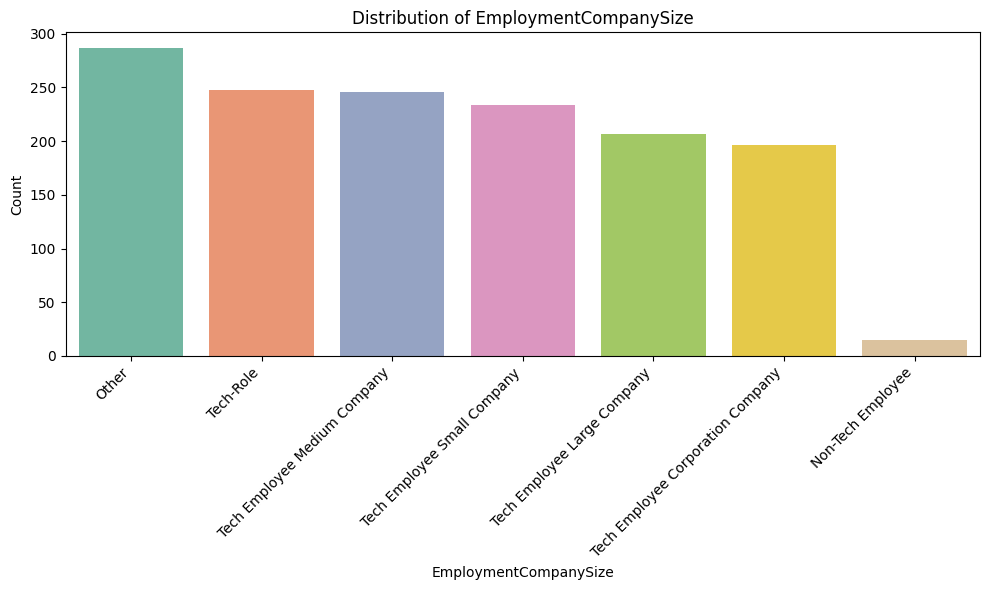

In [63]:
plot_categorical_features(df_cleaned, categorical_cols=categorical_cols)

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


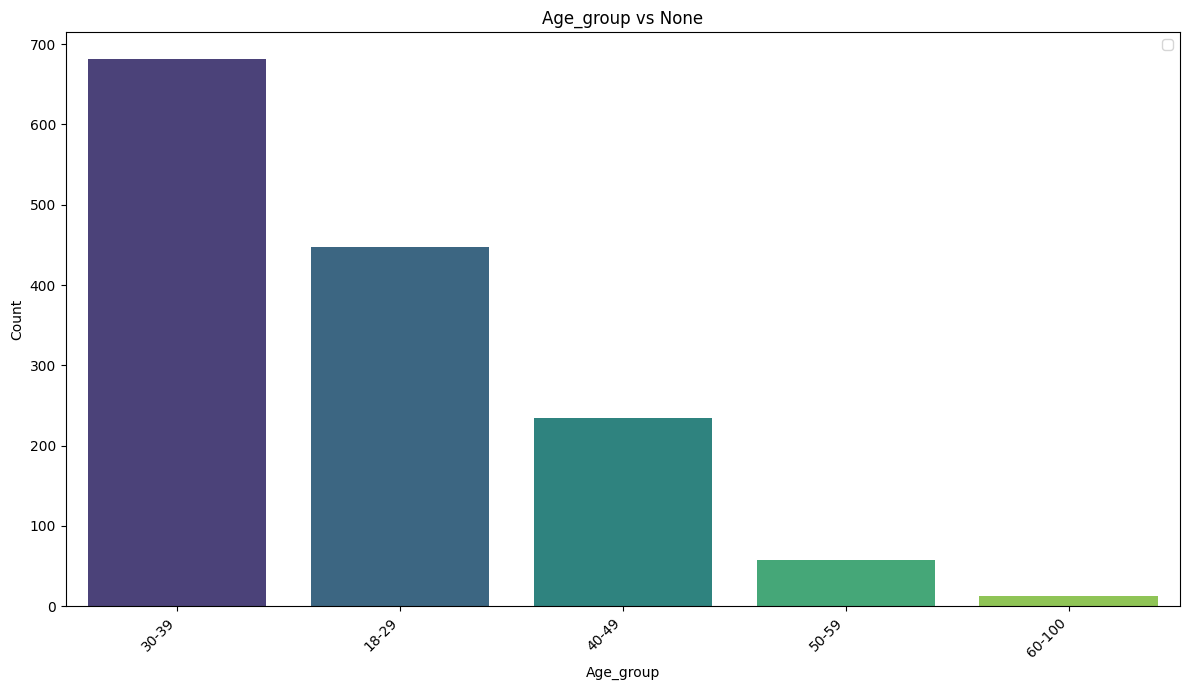

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


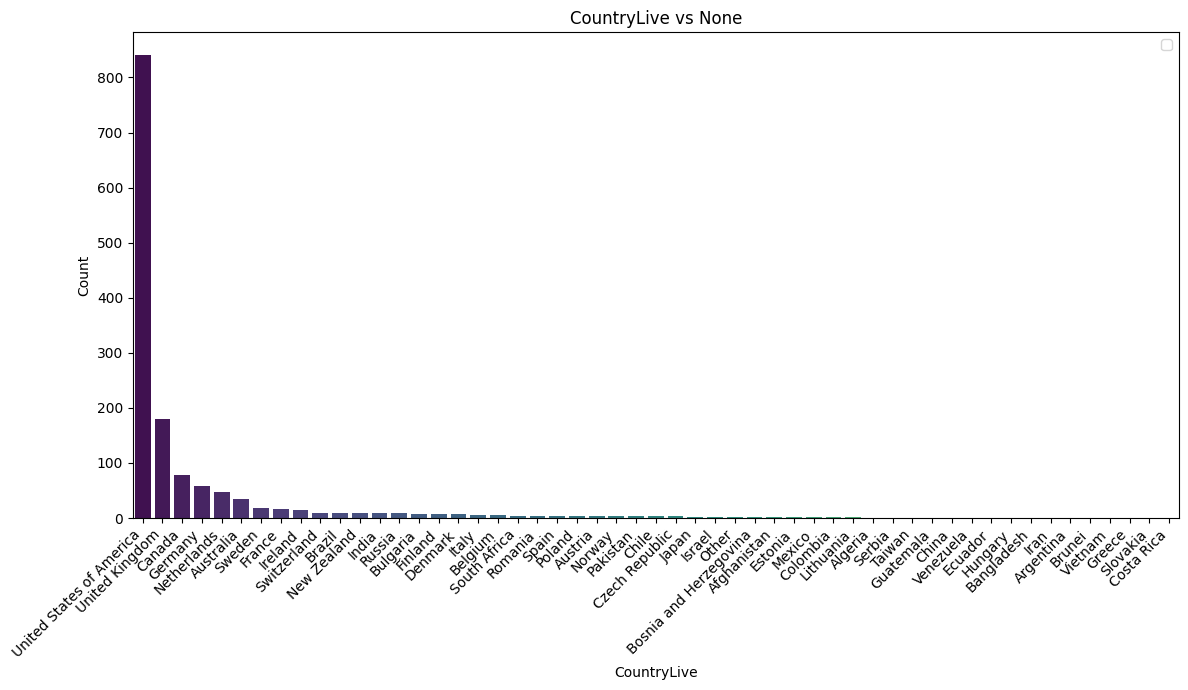

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


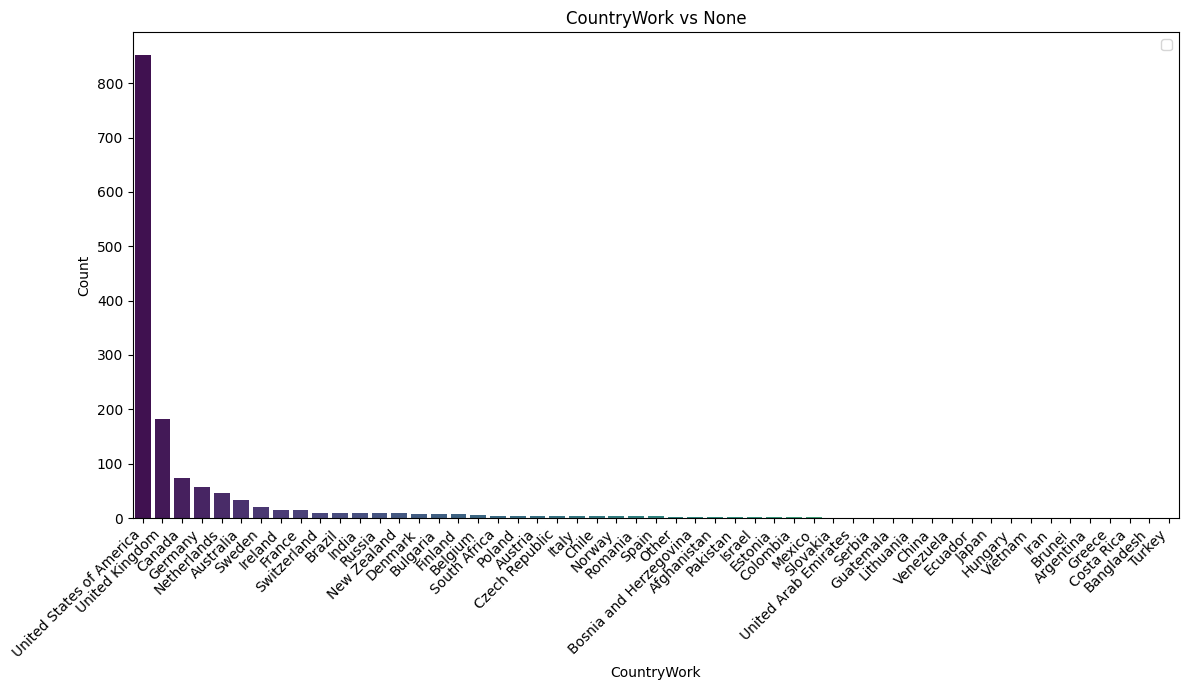

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


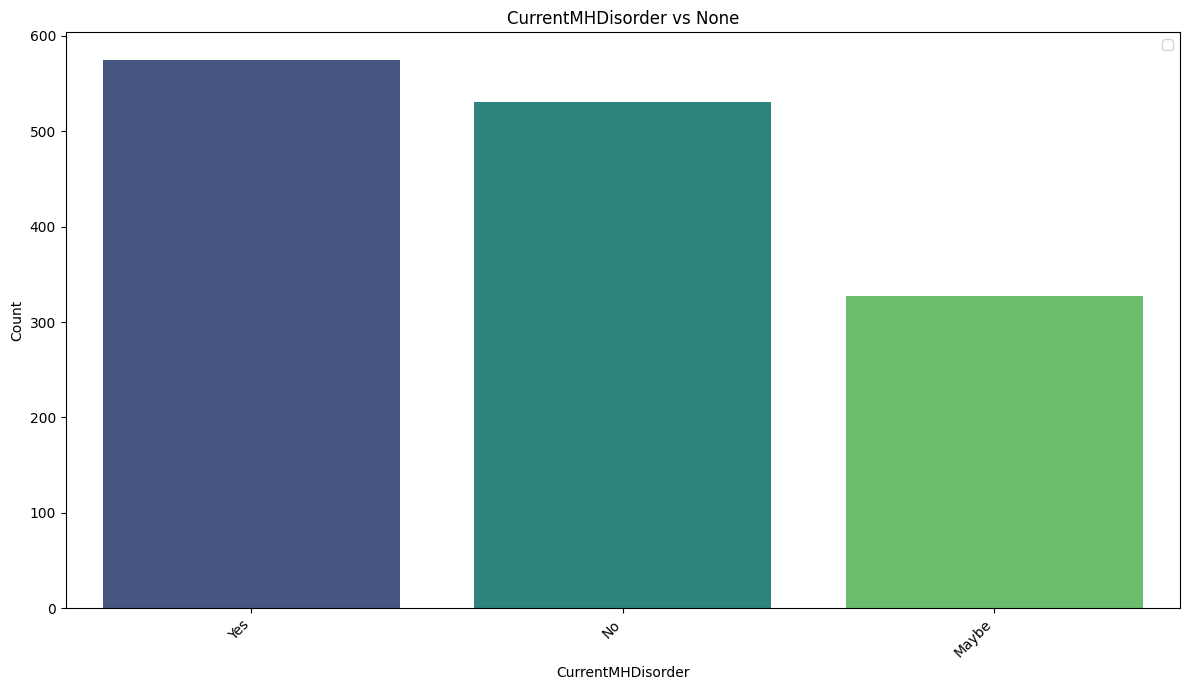

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


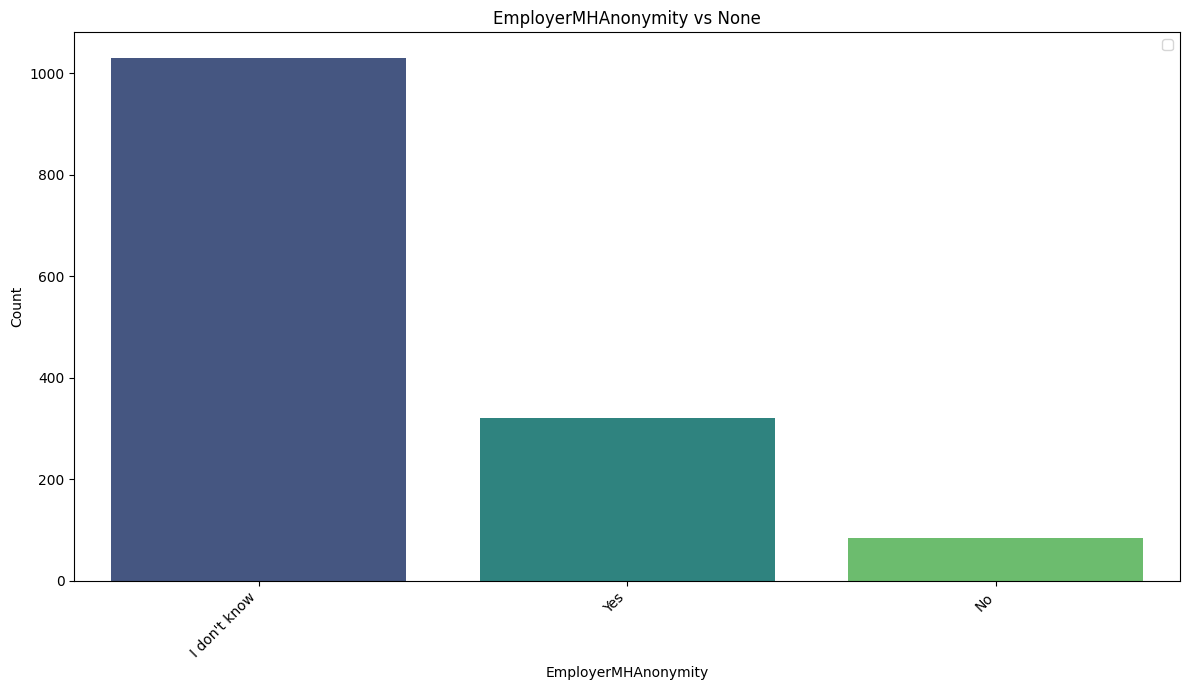

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


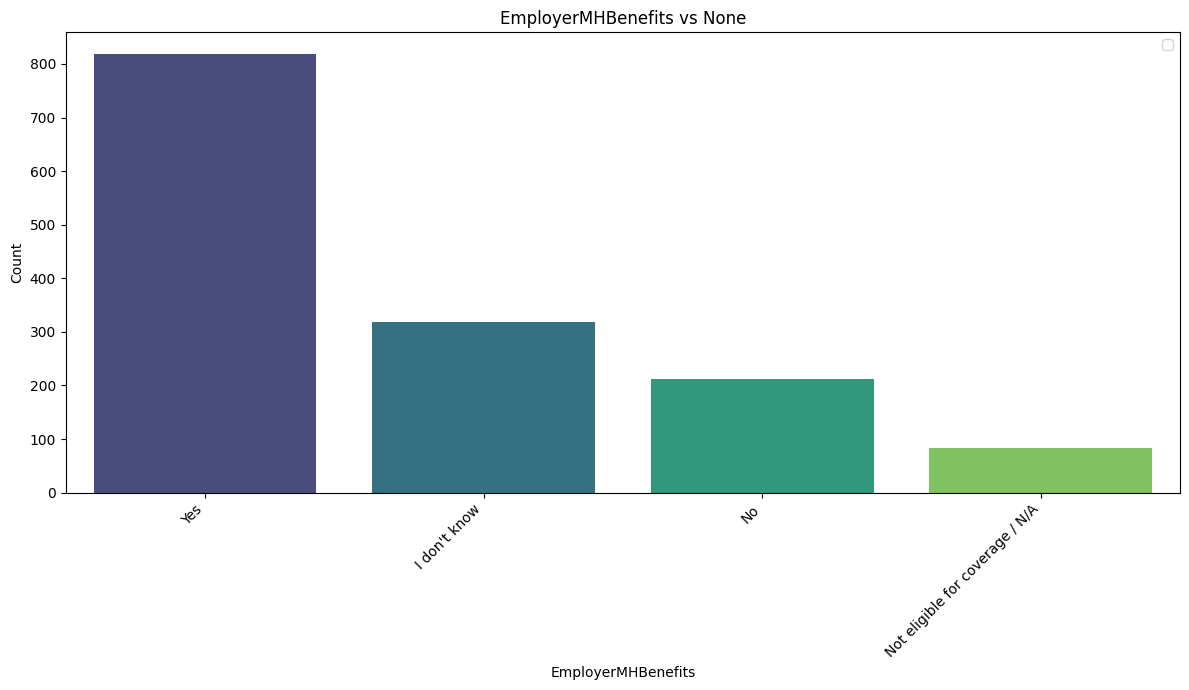

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


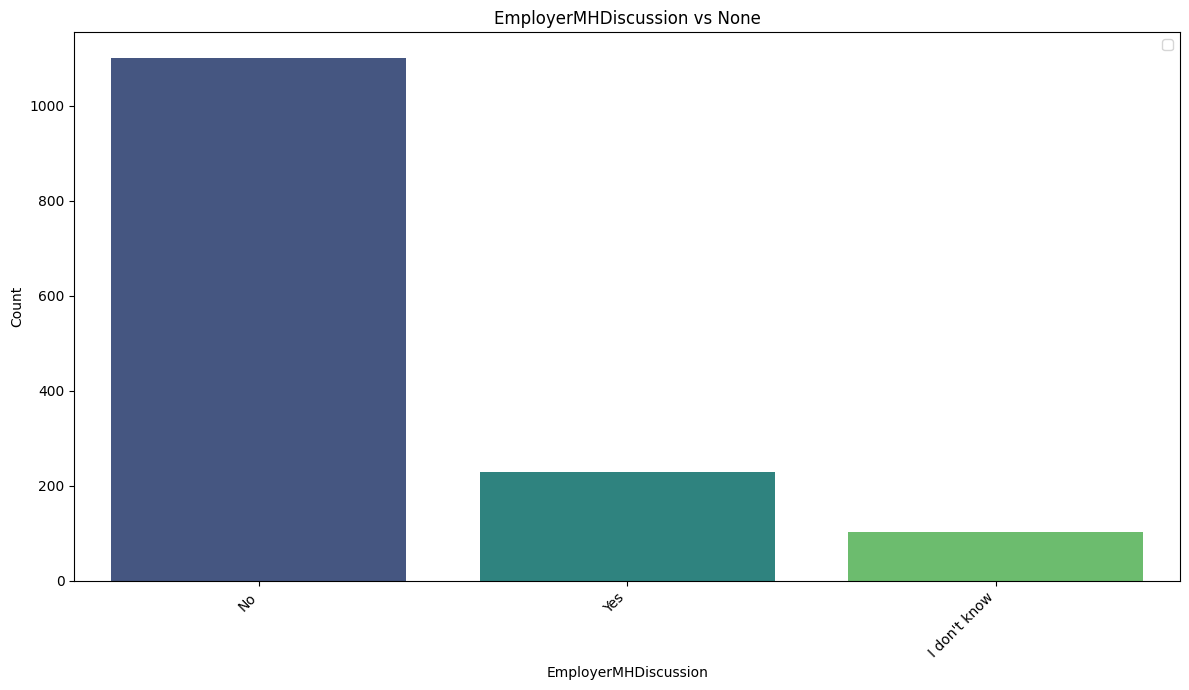

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


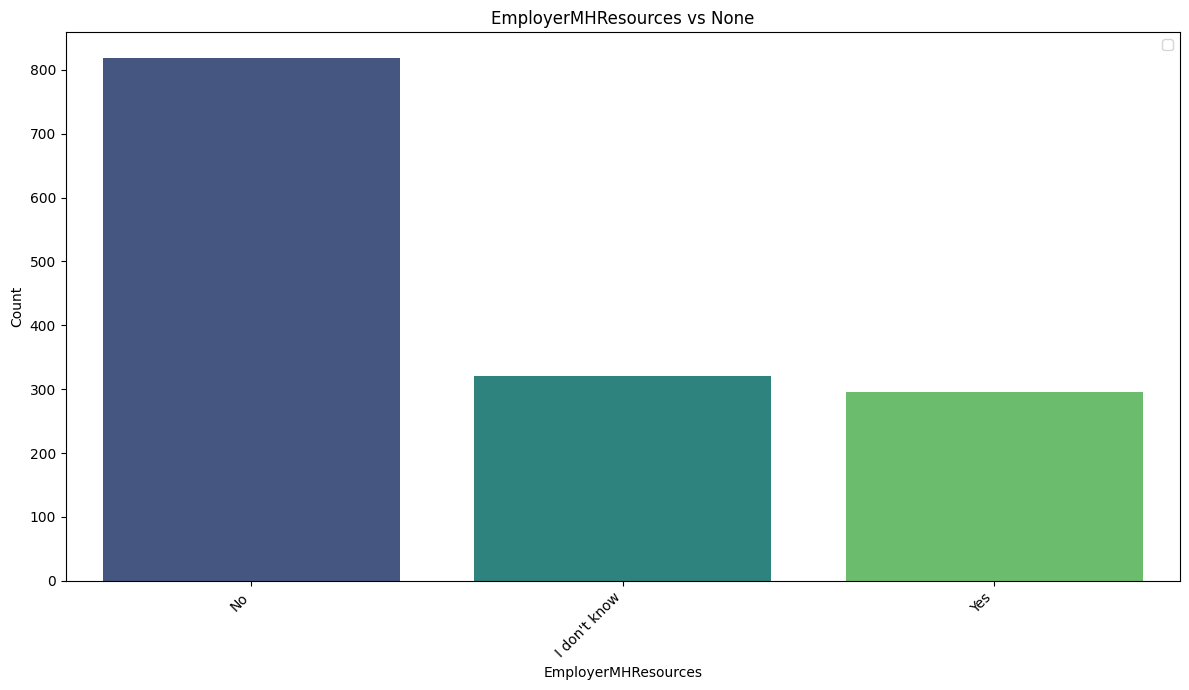

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


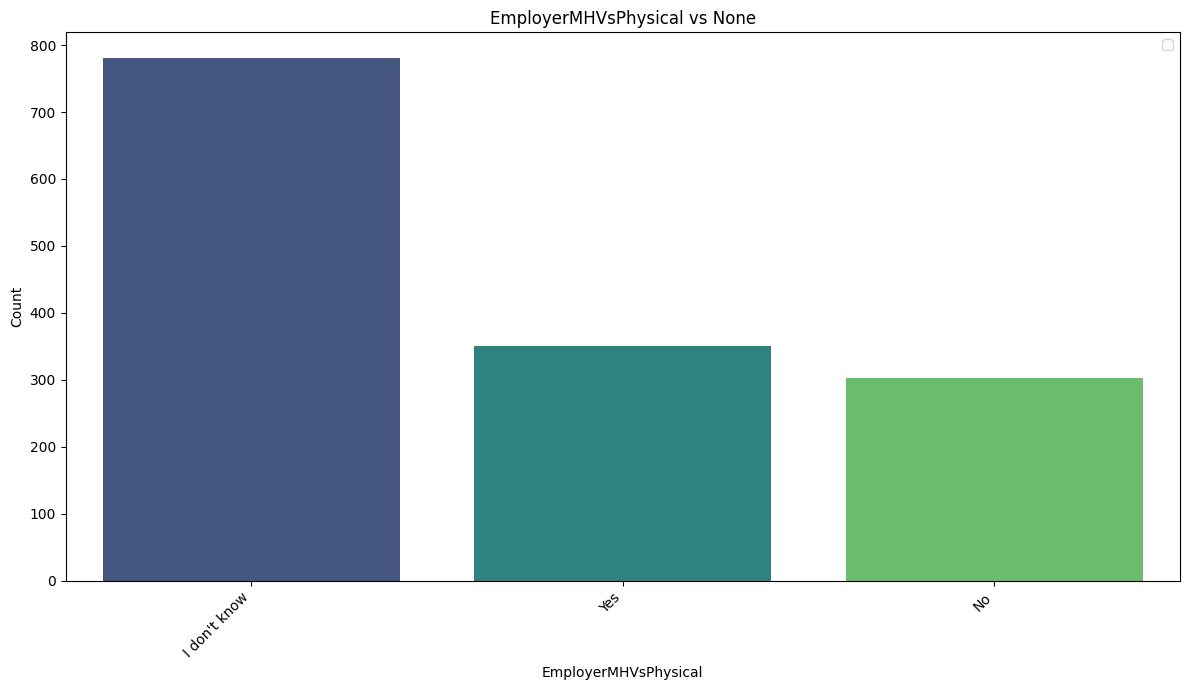

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


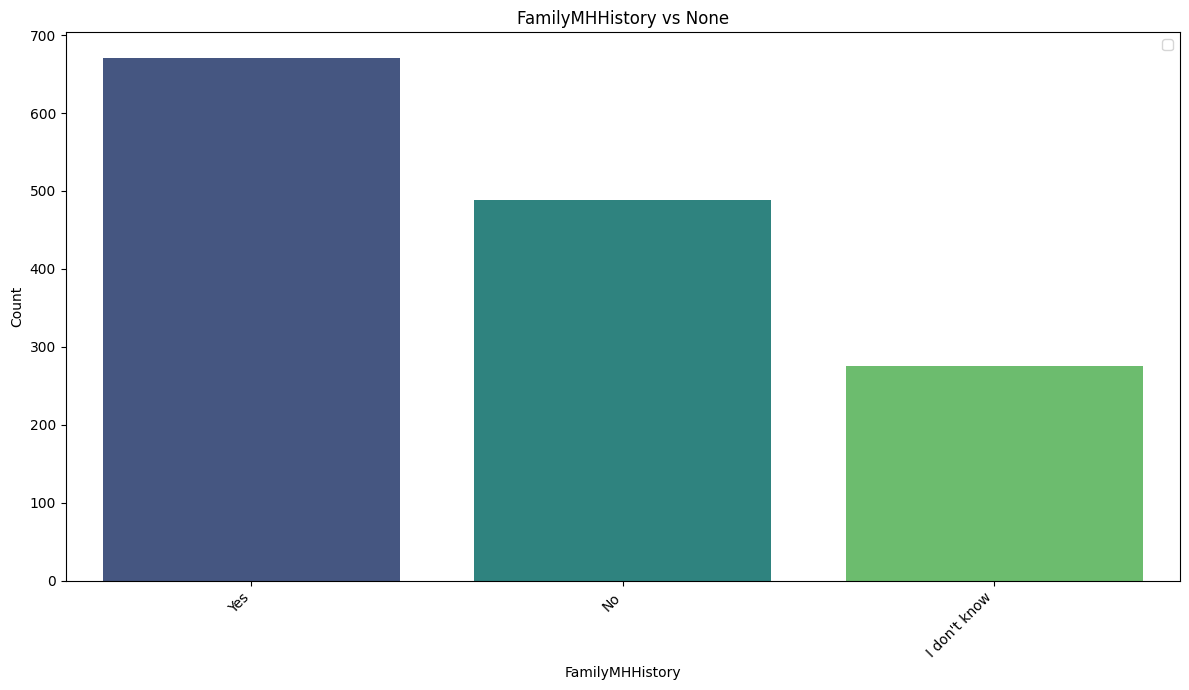

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


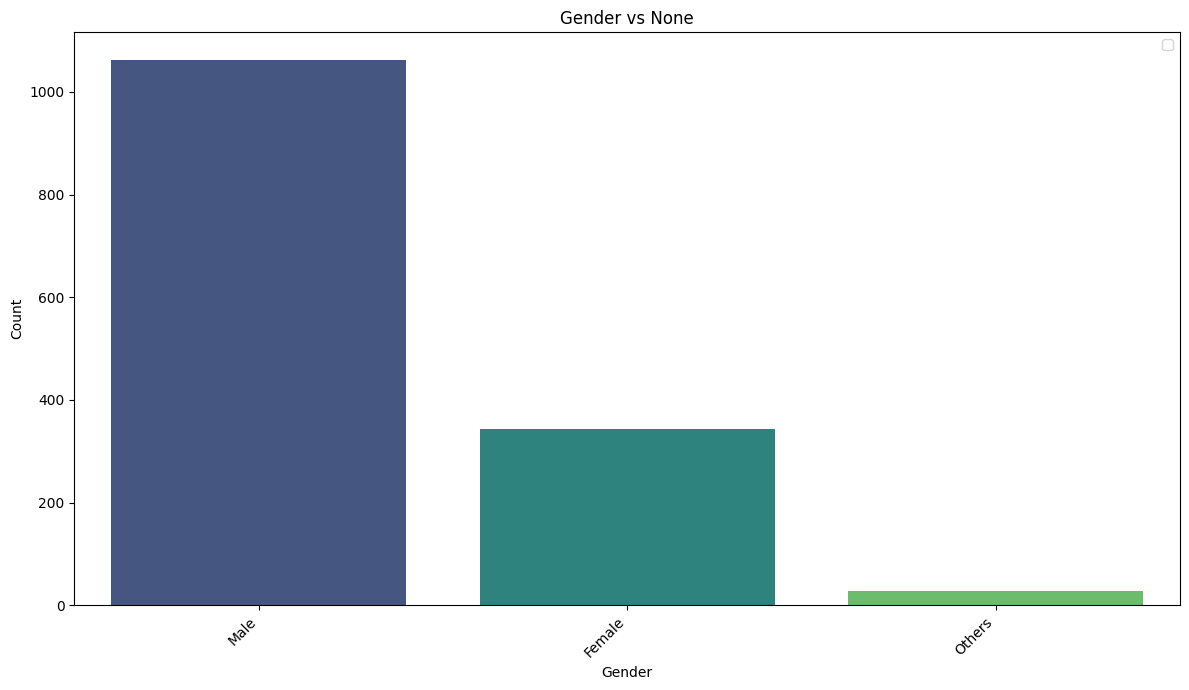

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


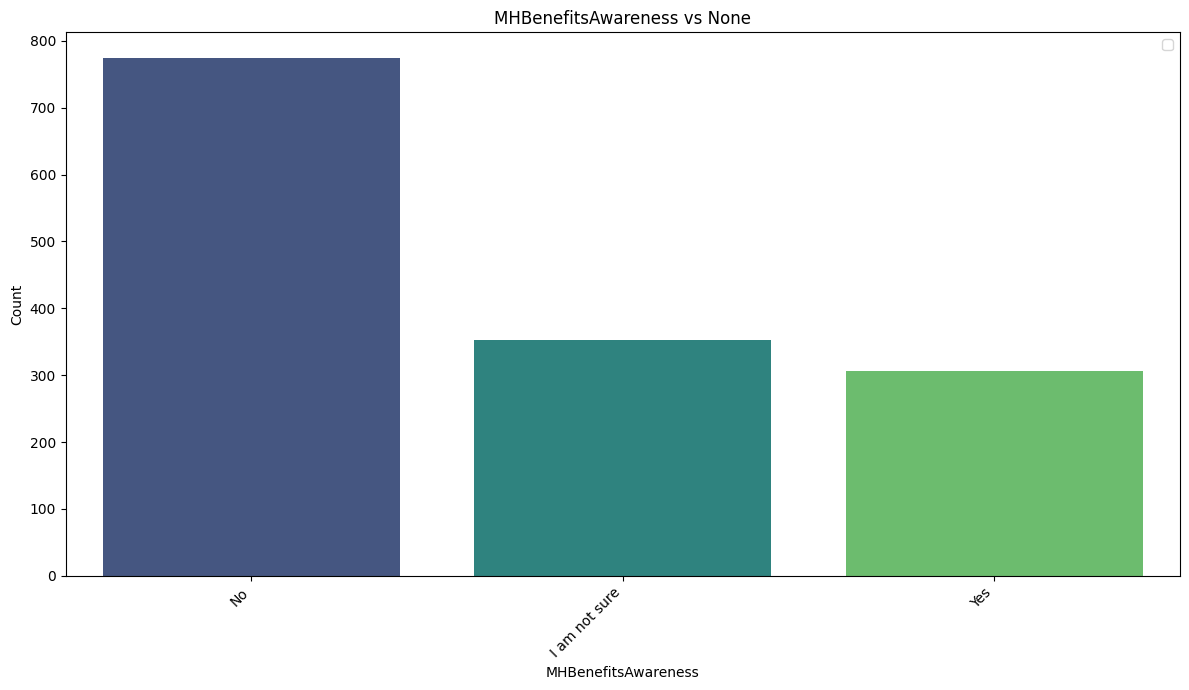

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


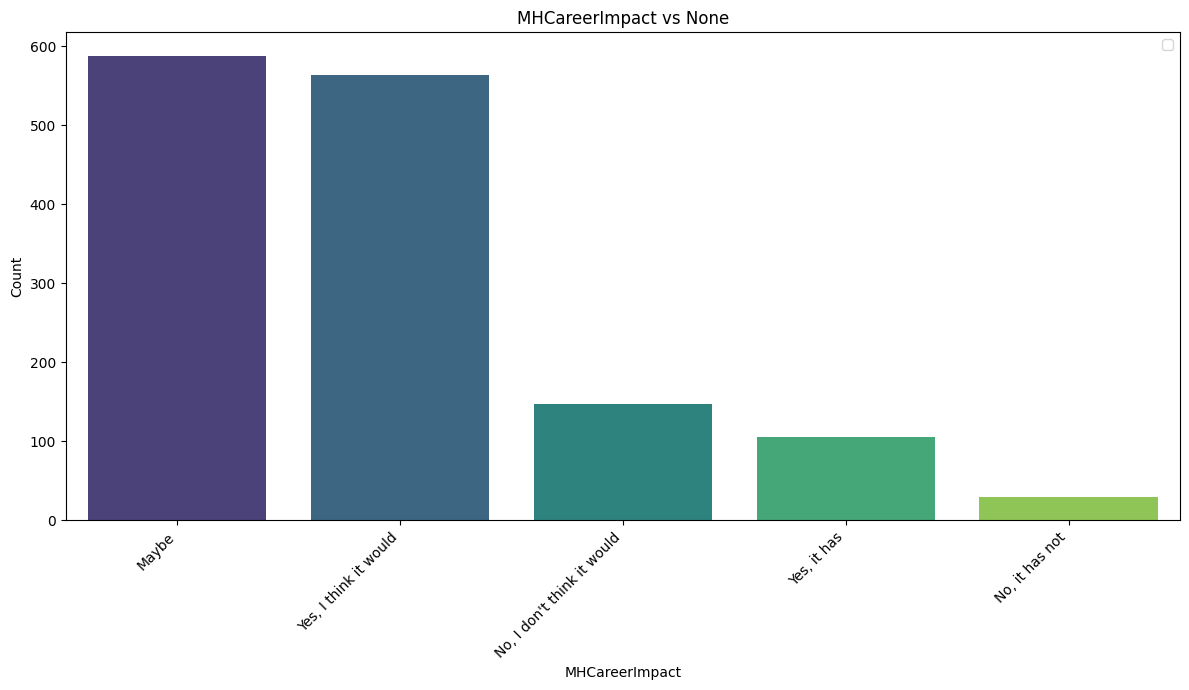

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


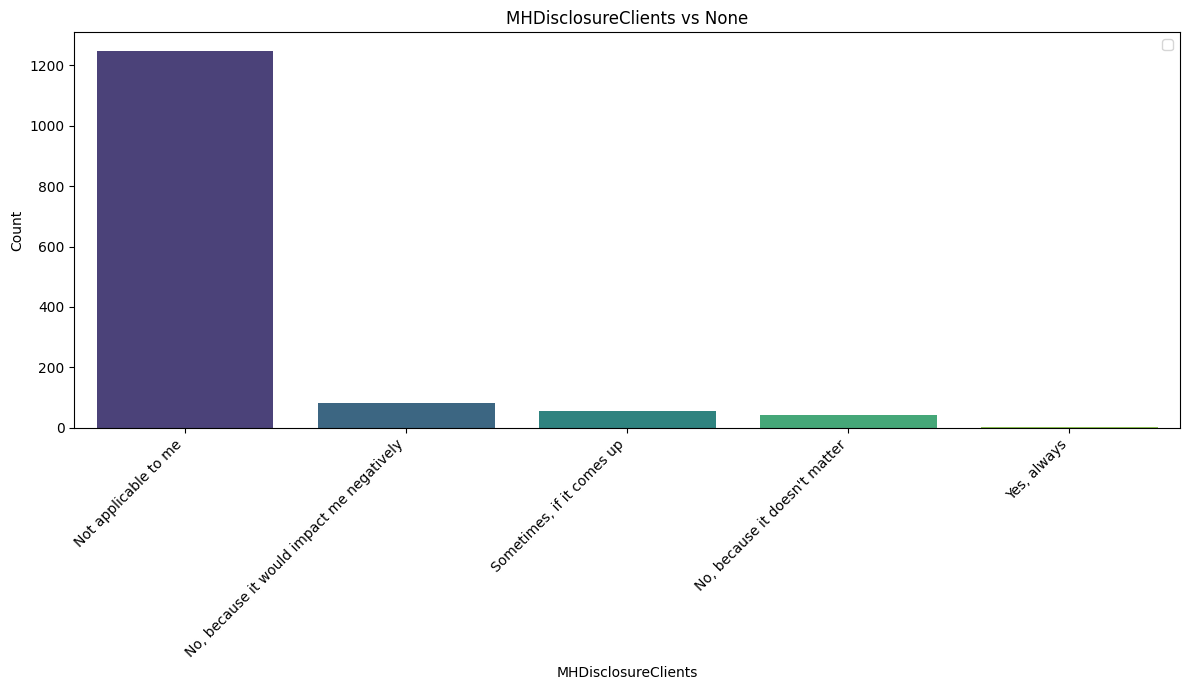

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


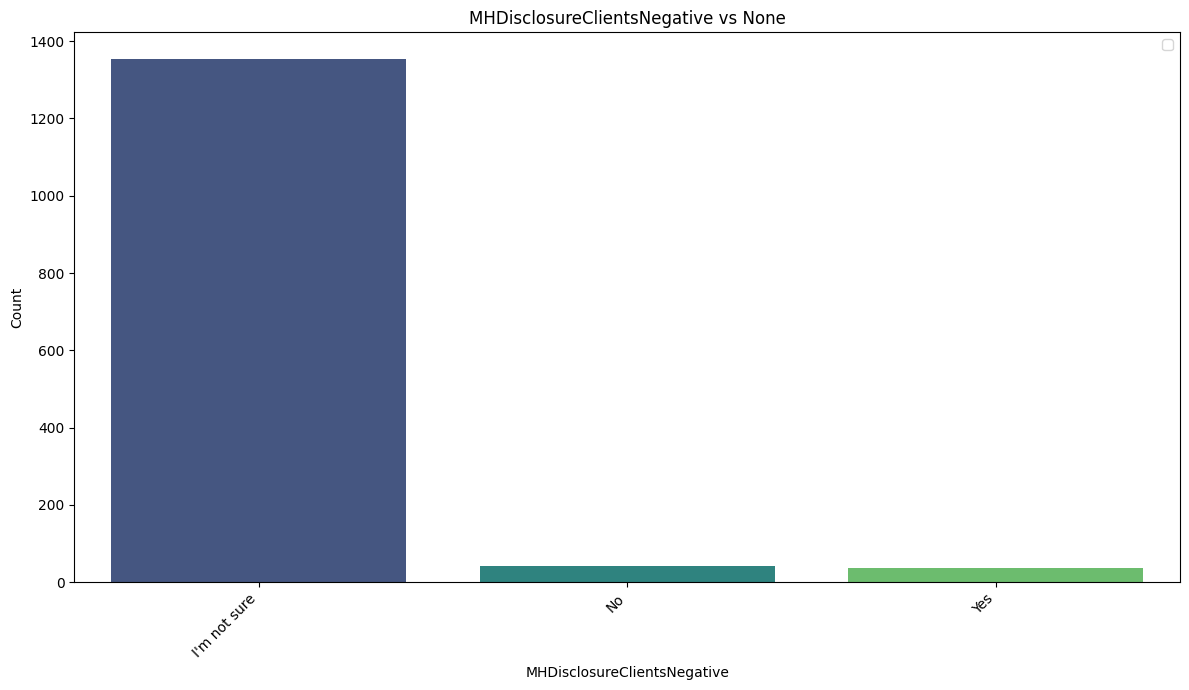

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


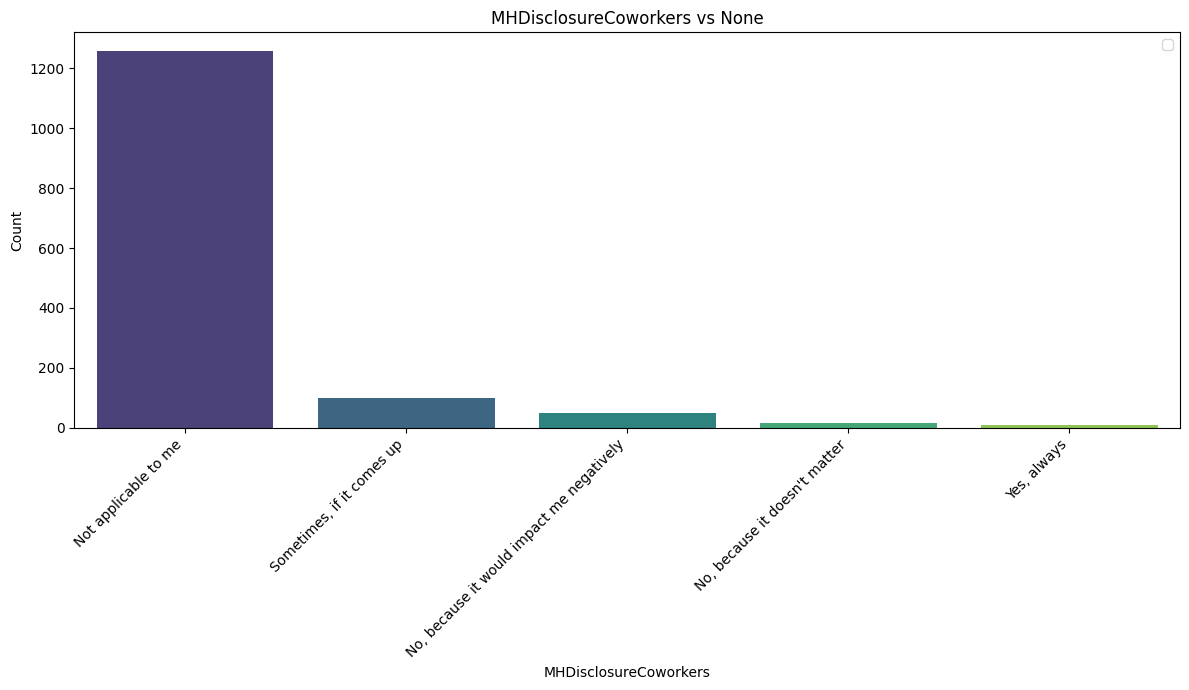

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


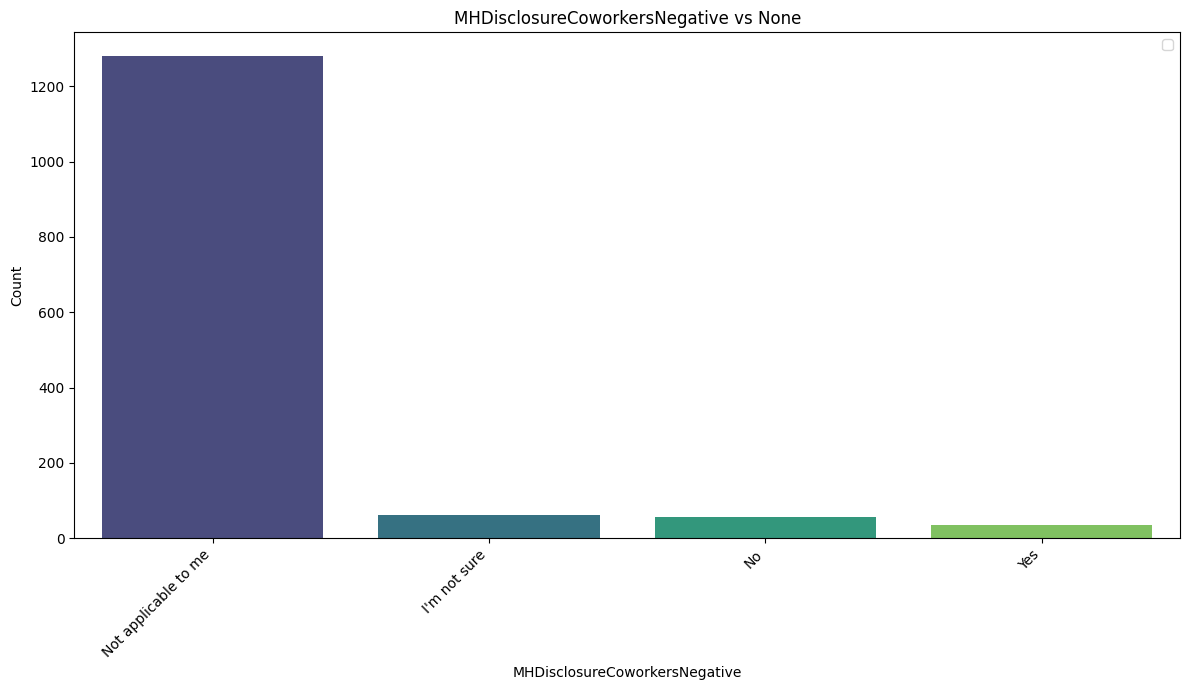

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


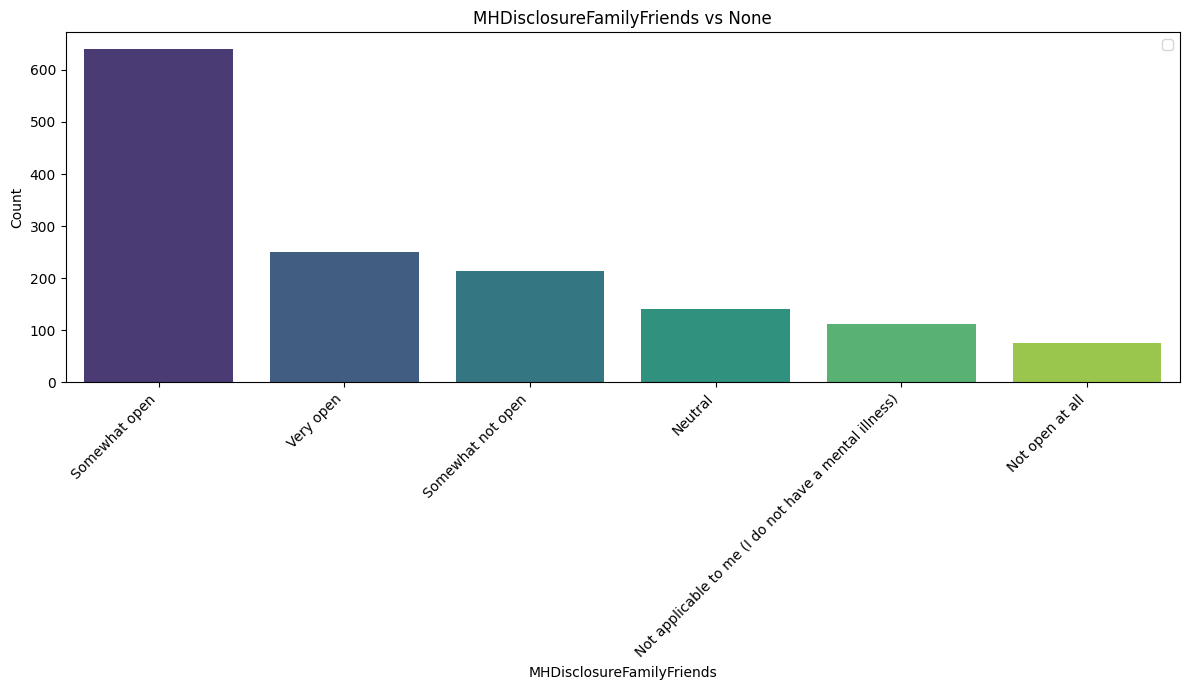

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


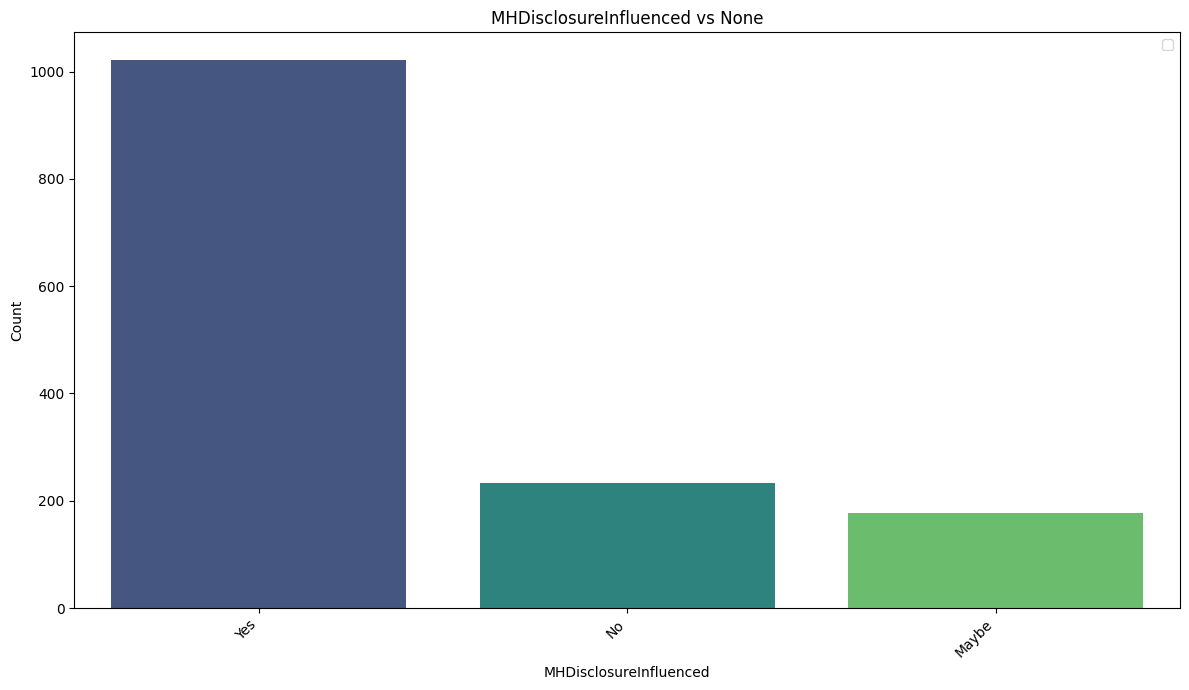

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


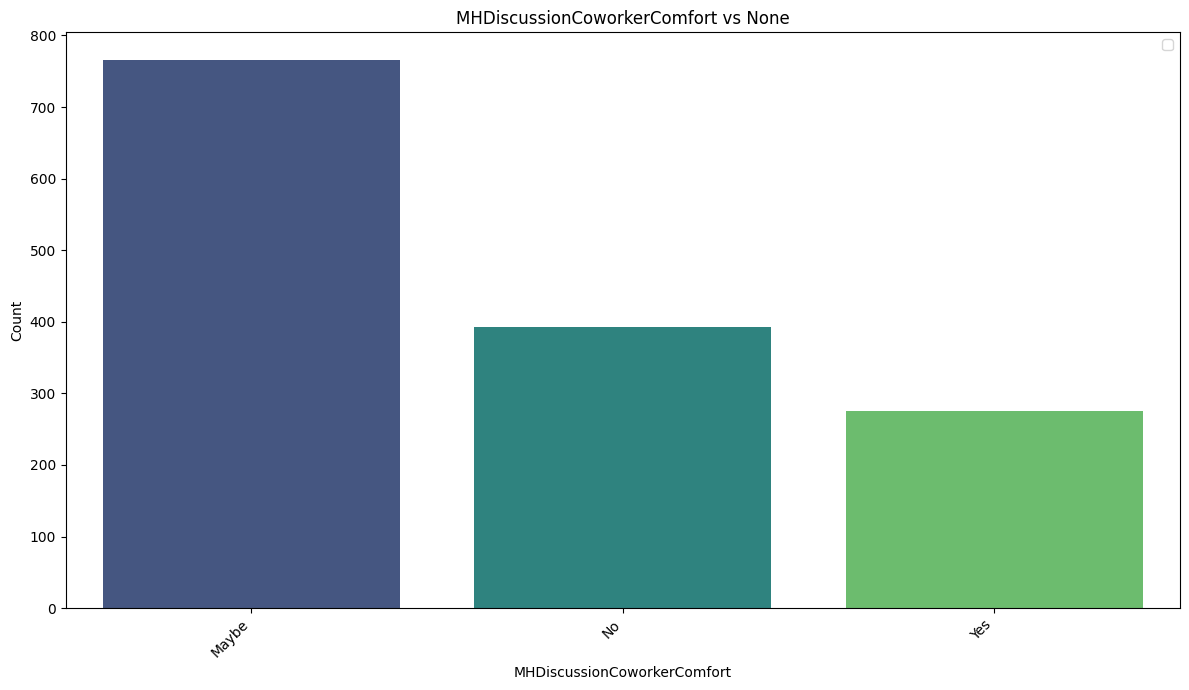

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


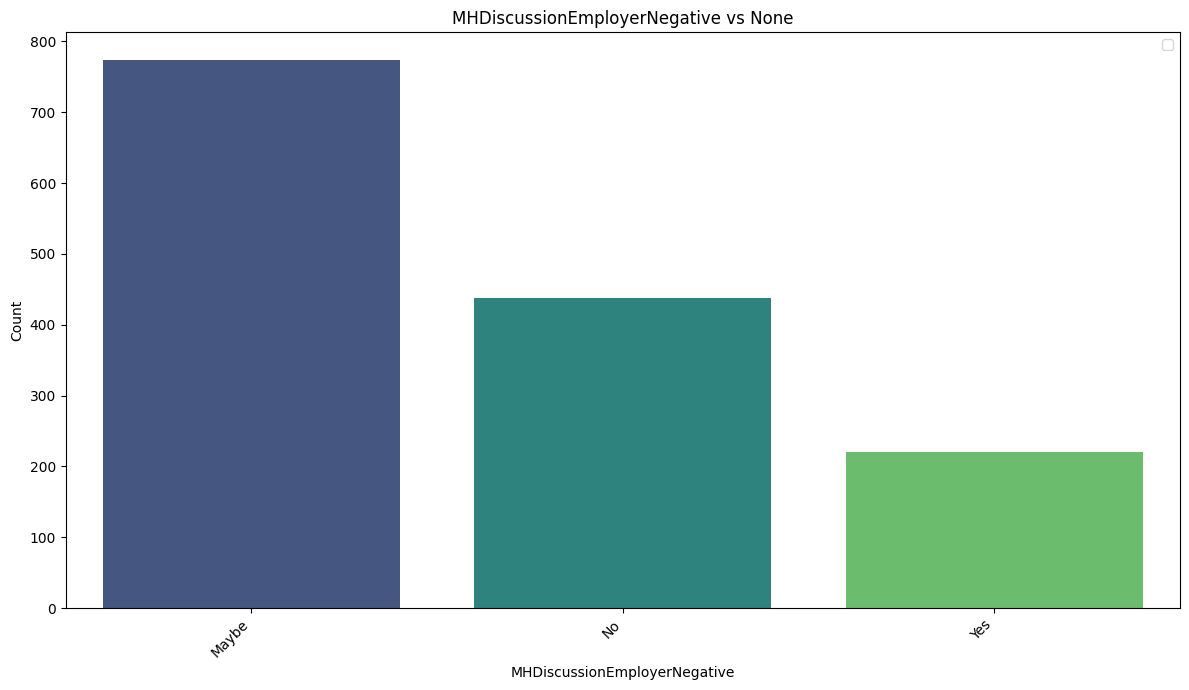

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


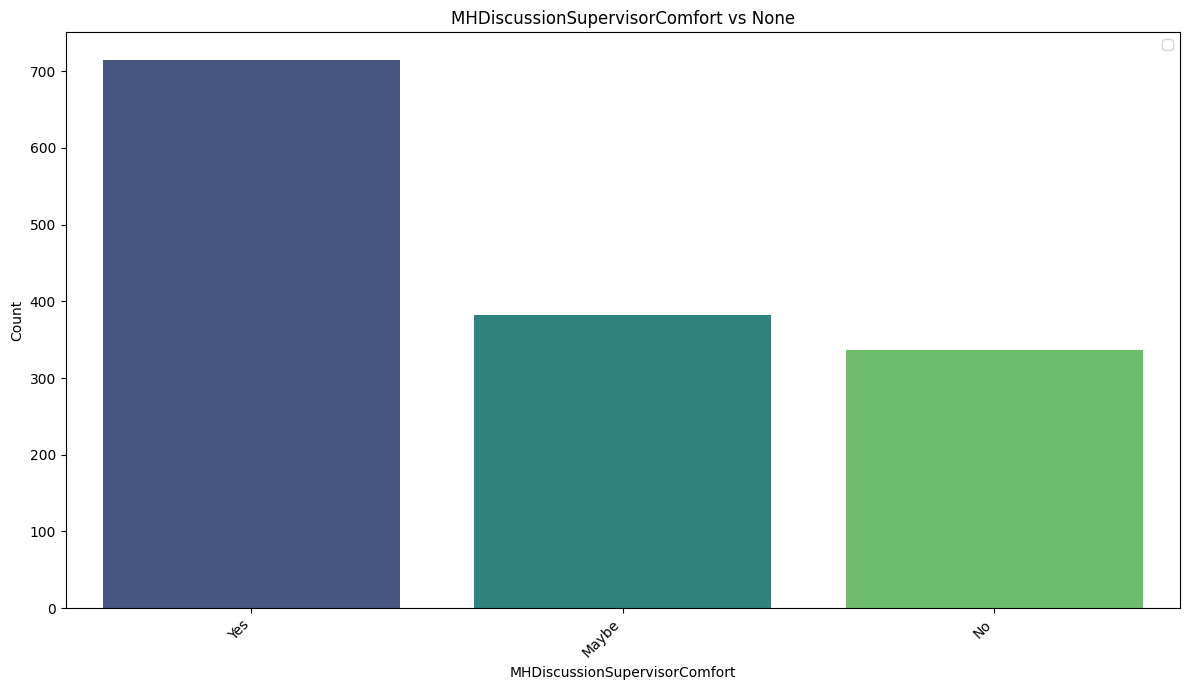

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


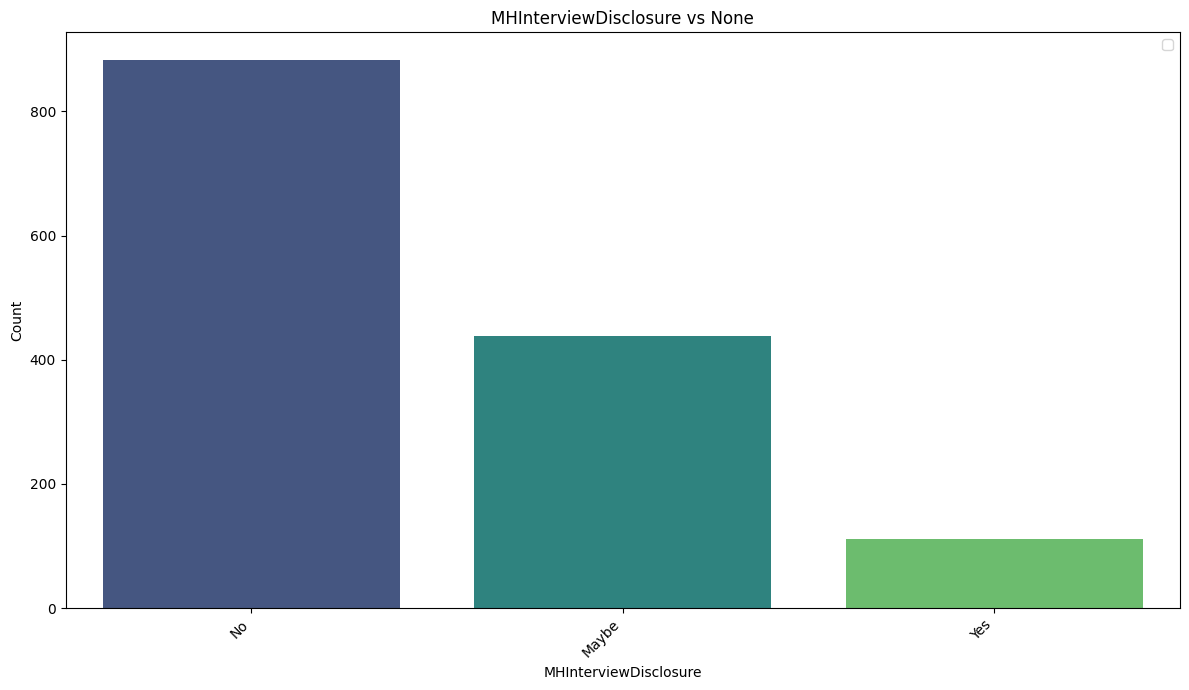

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


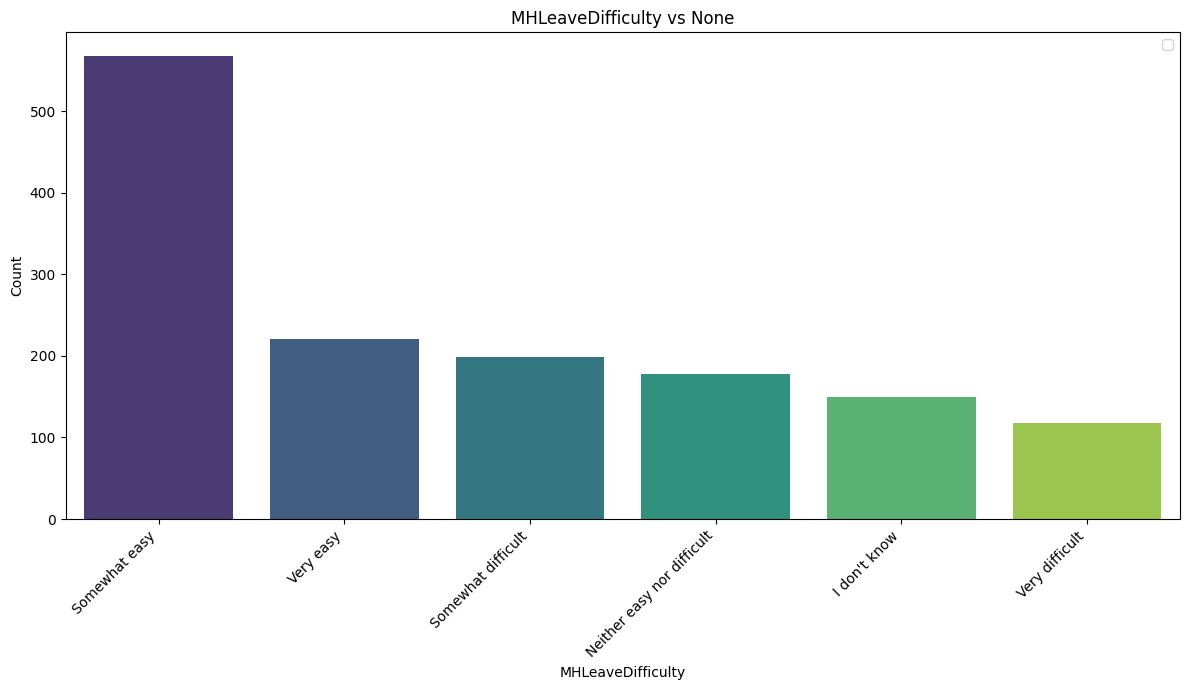

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


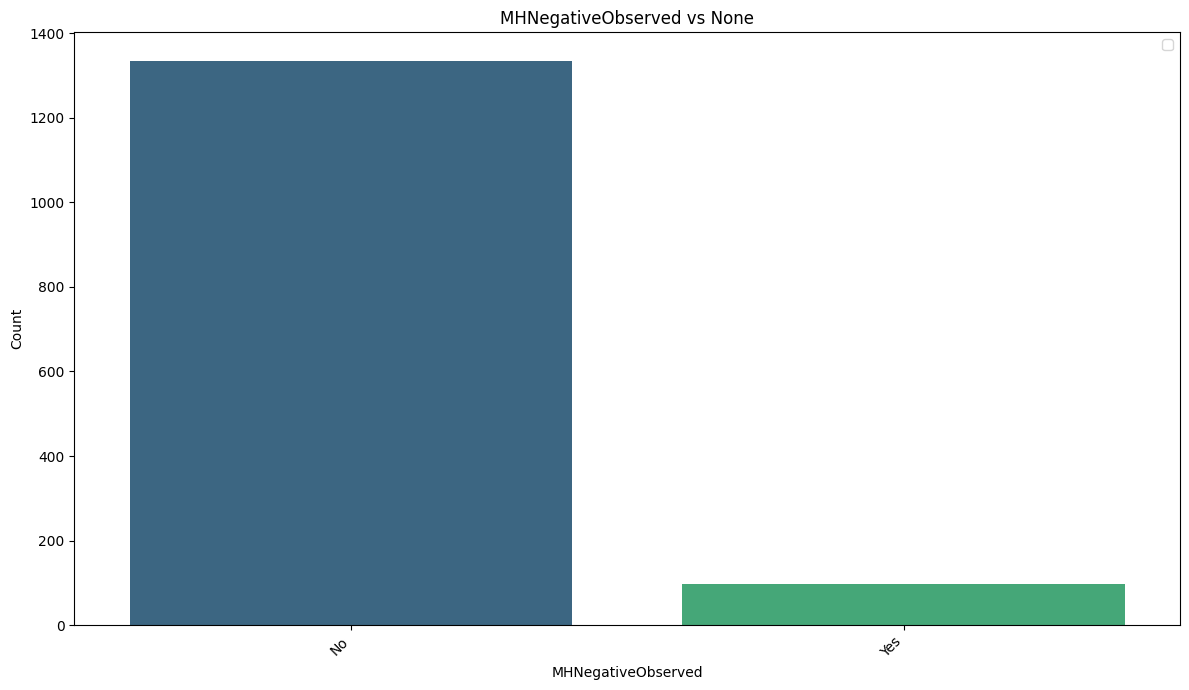

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


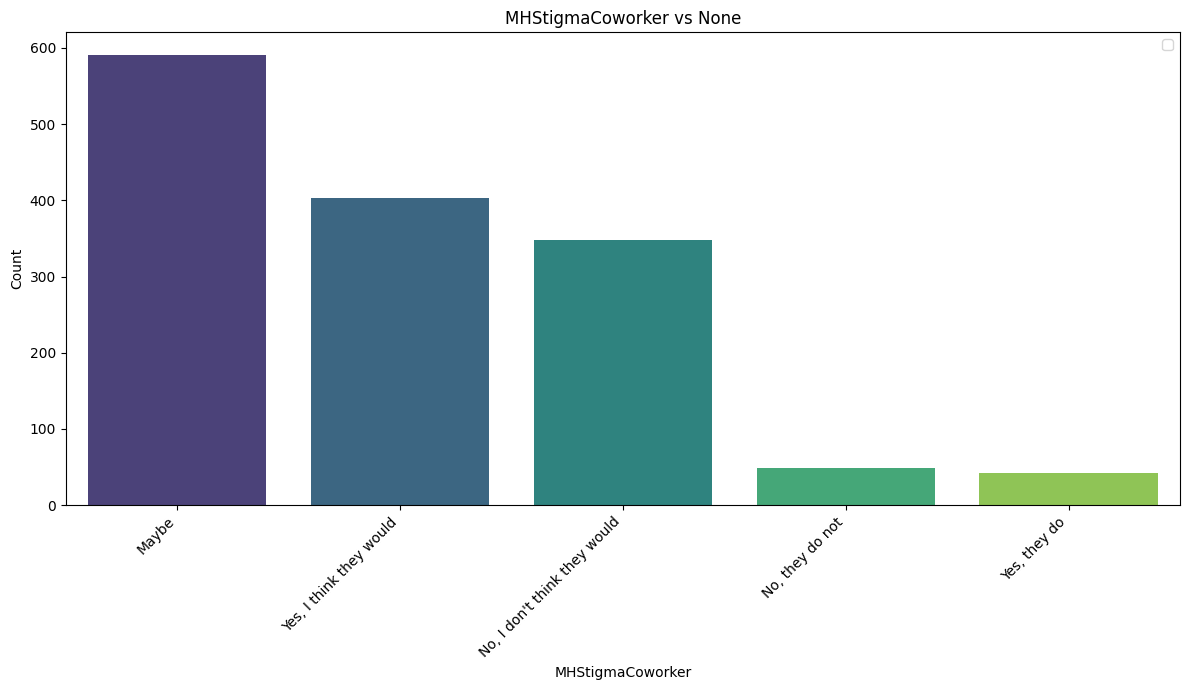

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


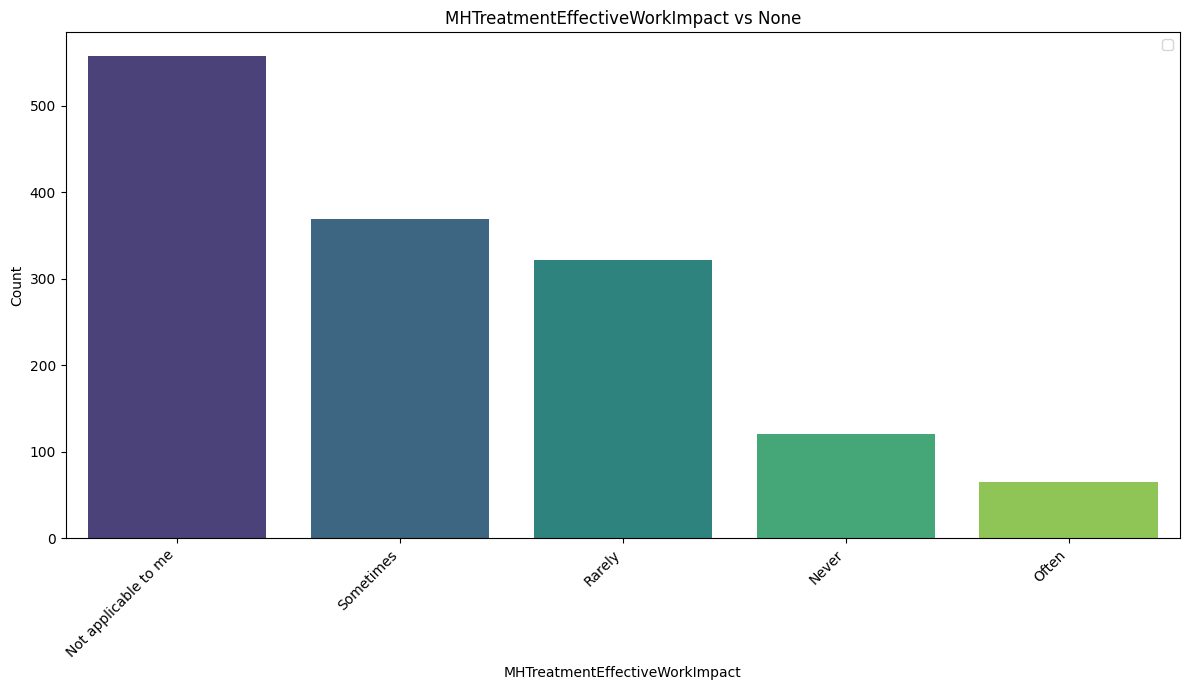

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


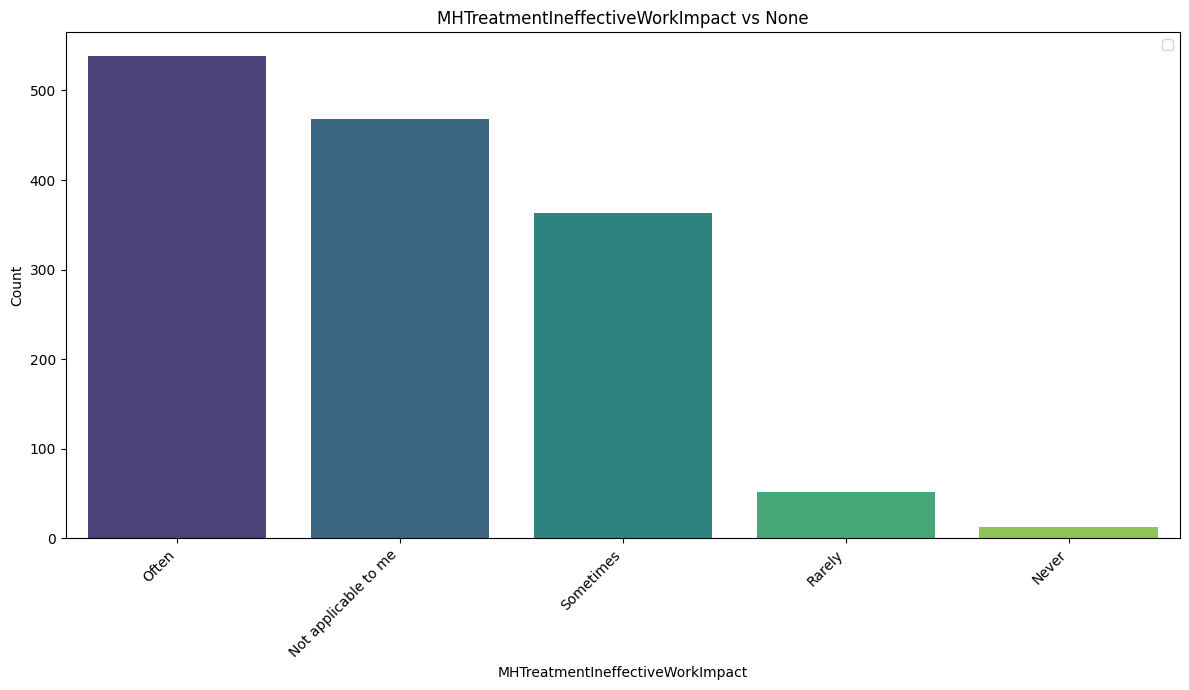

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


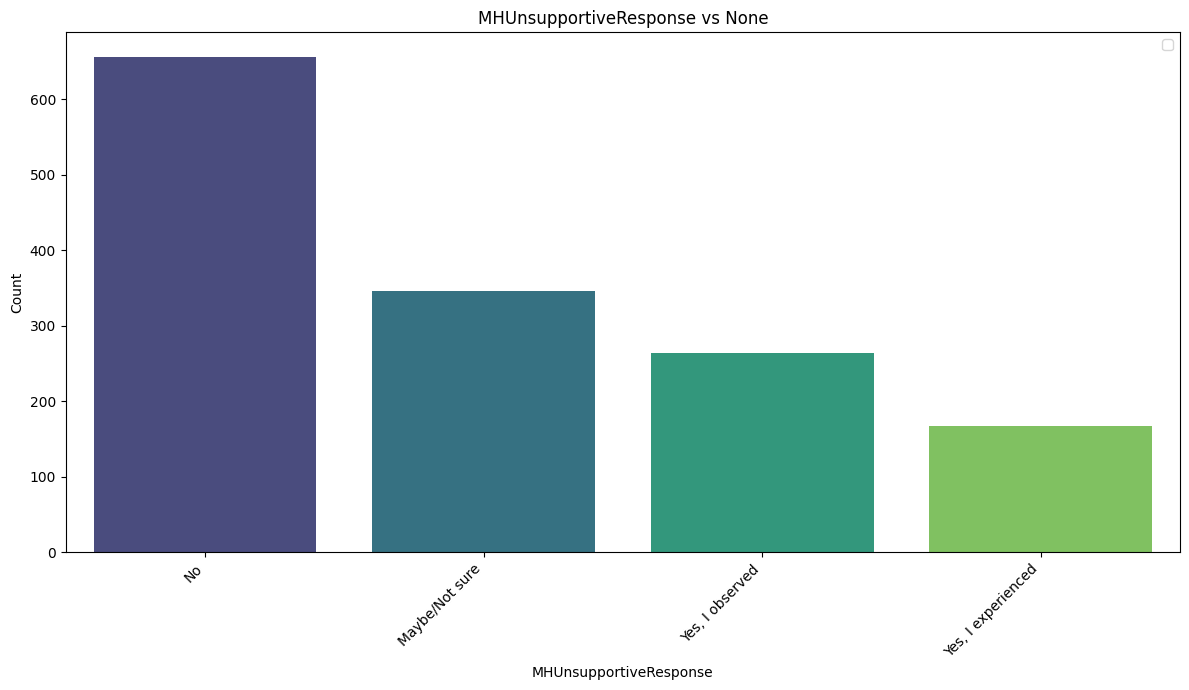

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


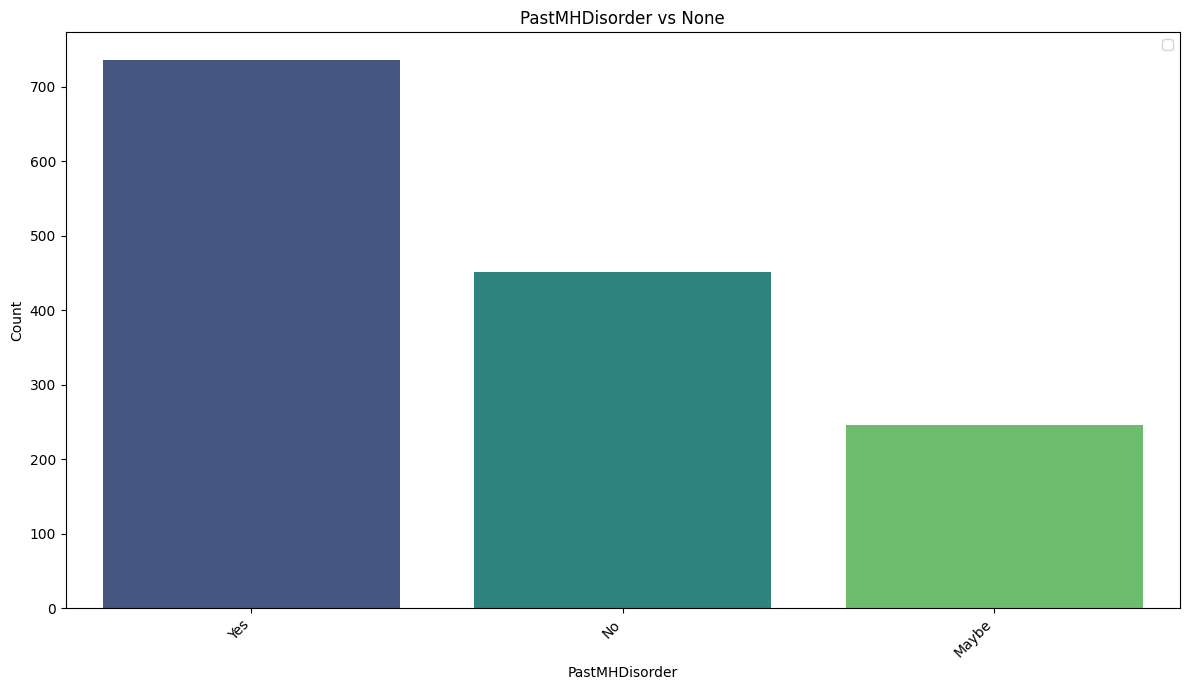

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


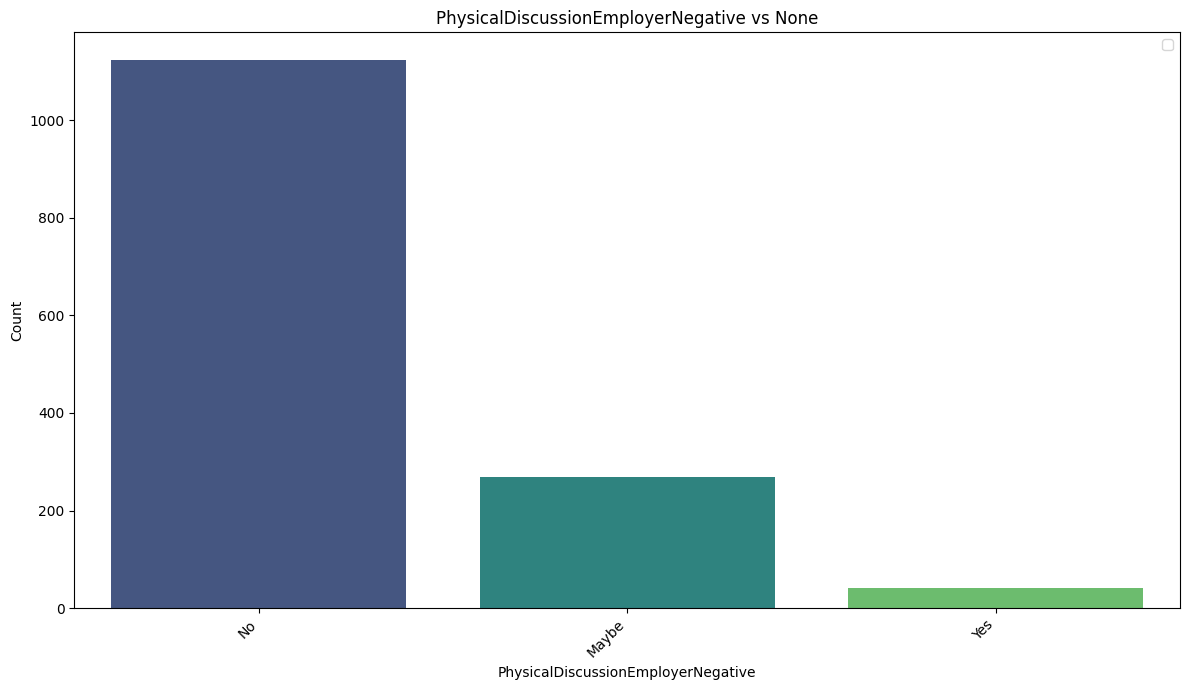

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


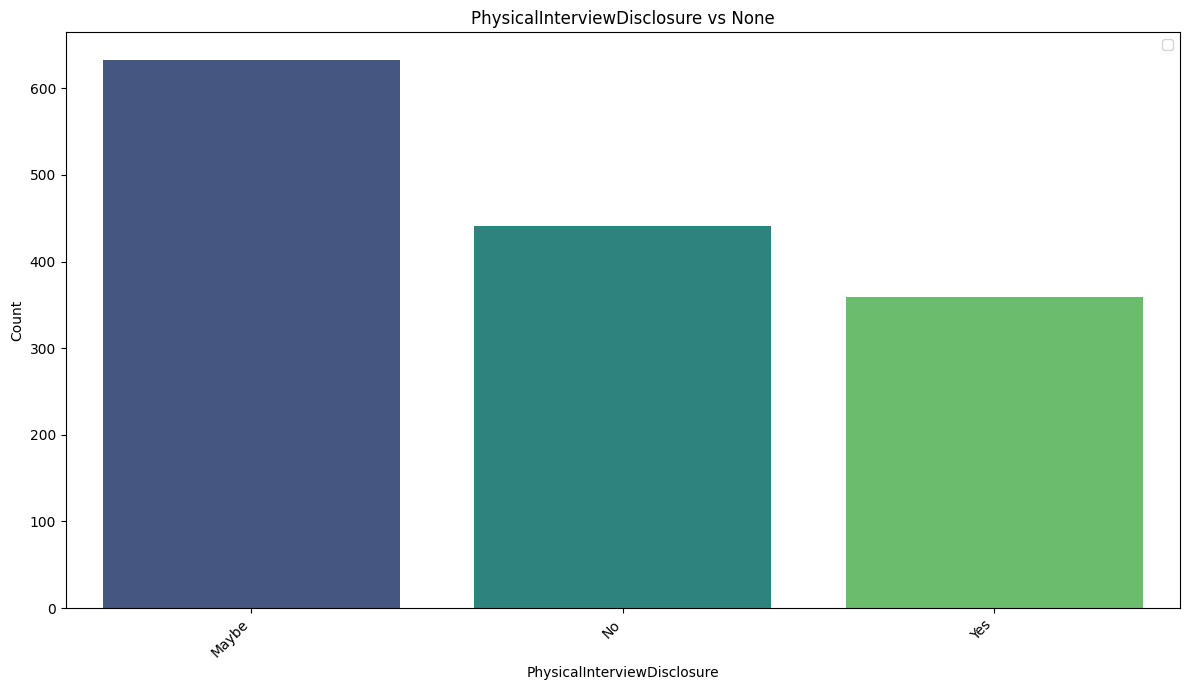

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


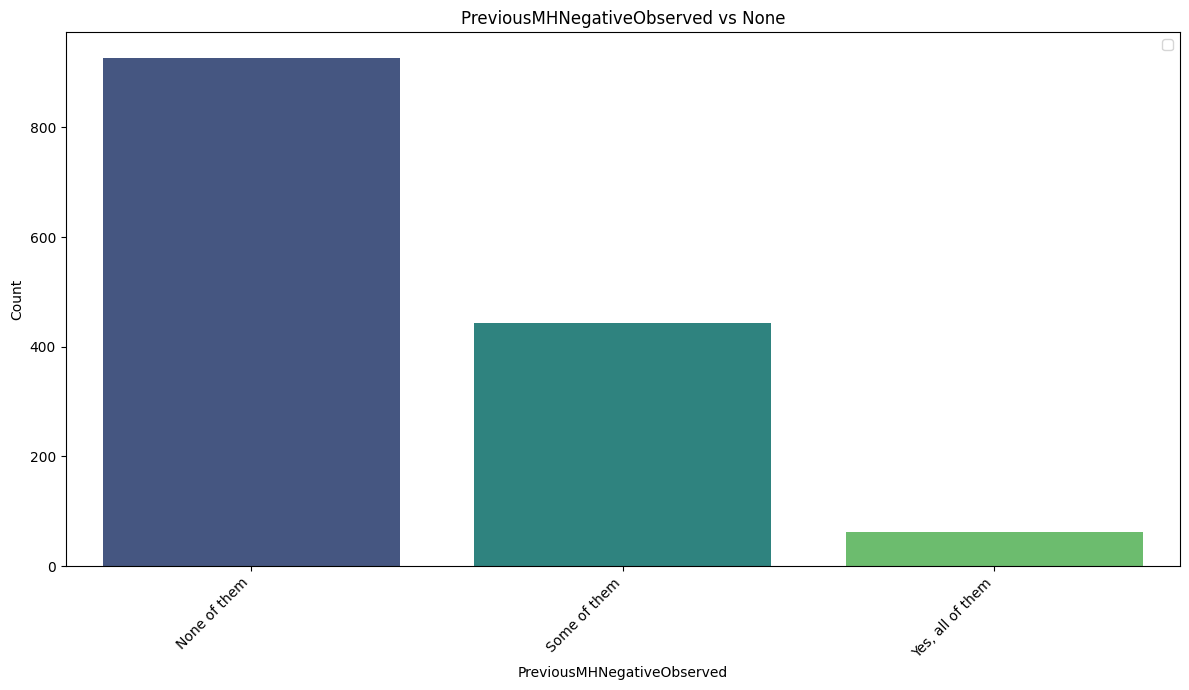

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


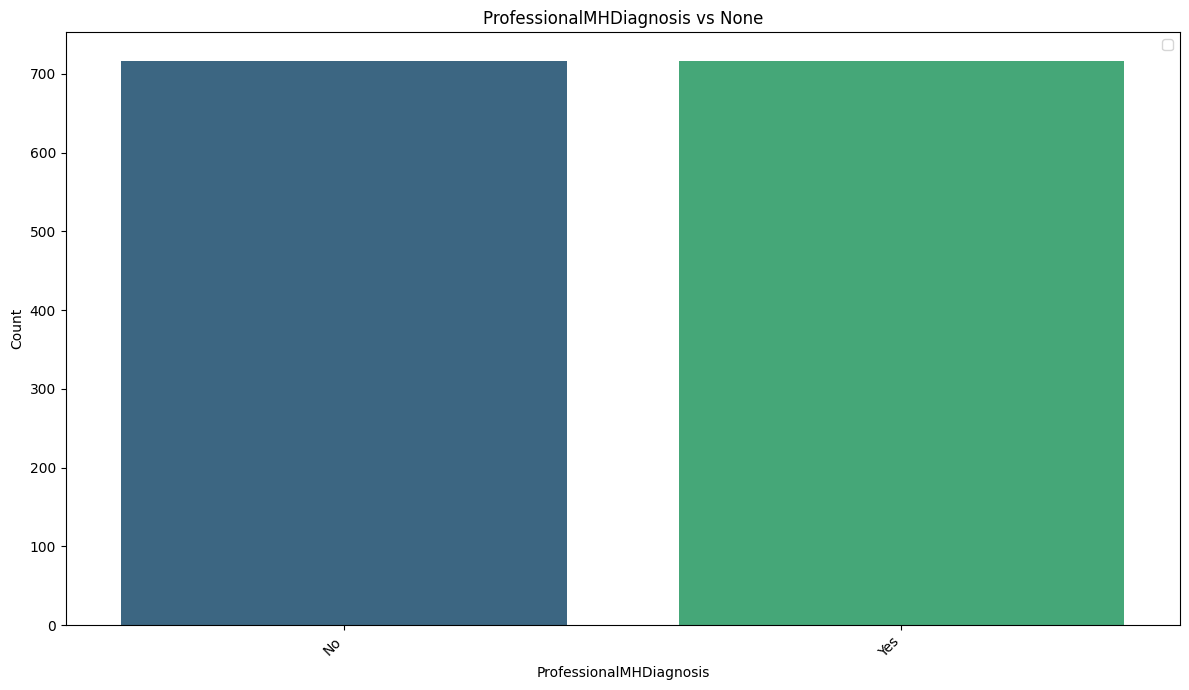

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-

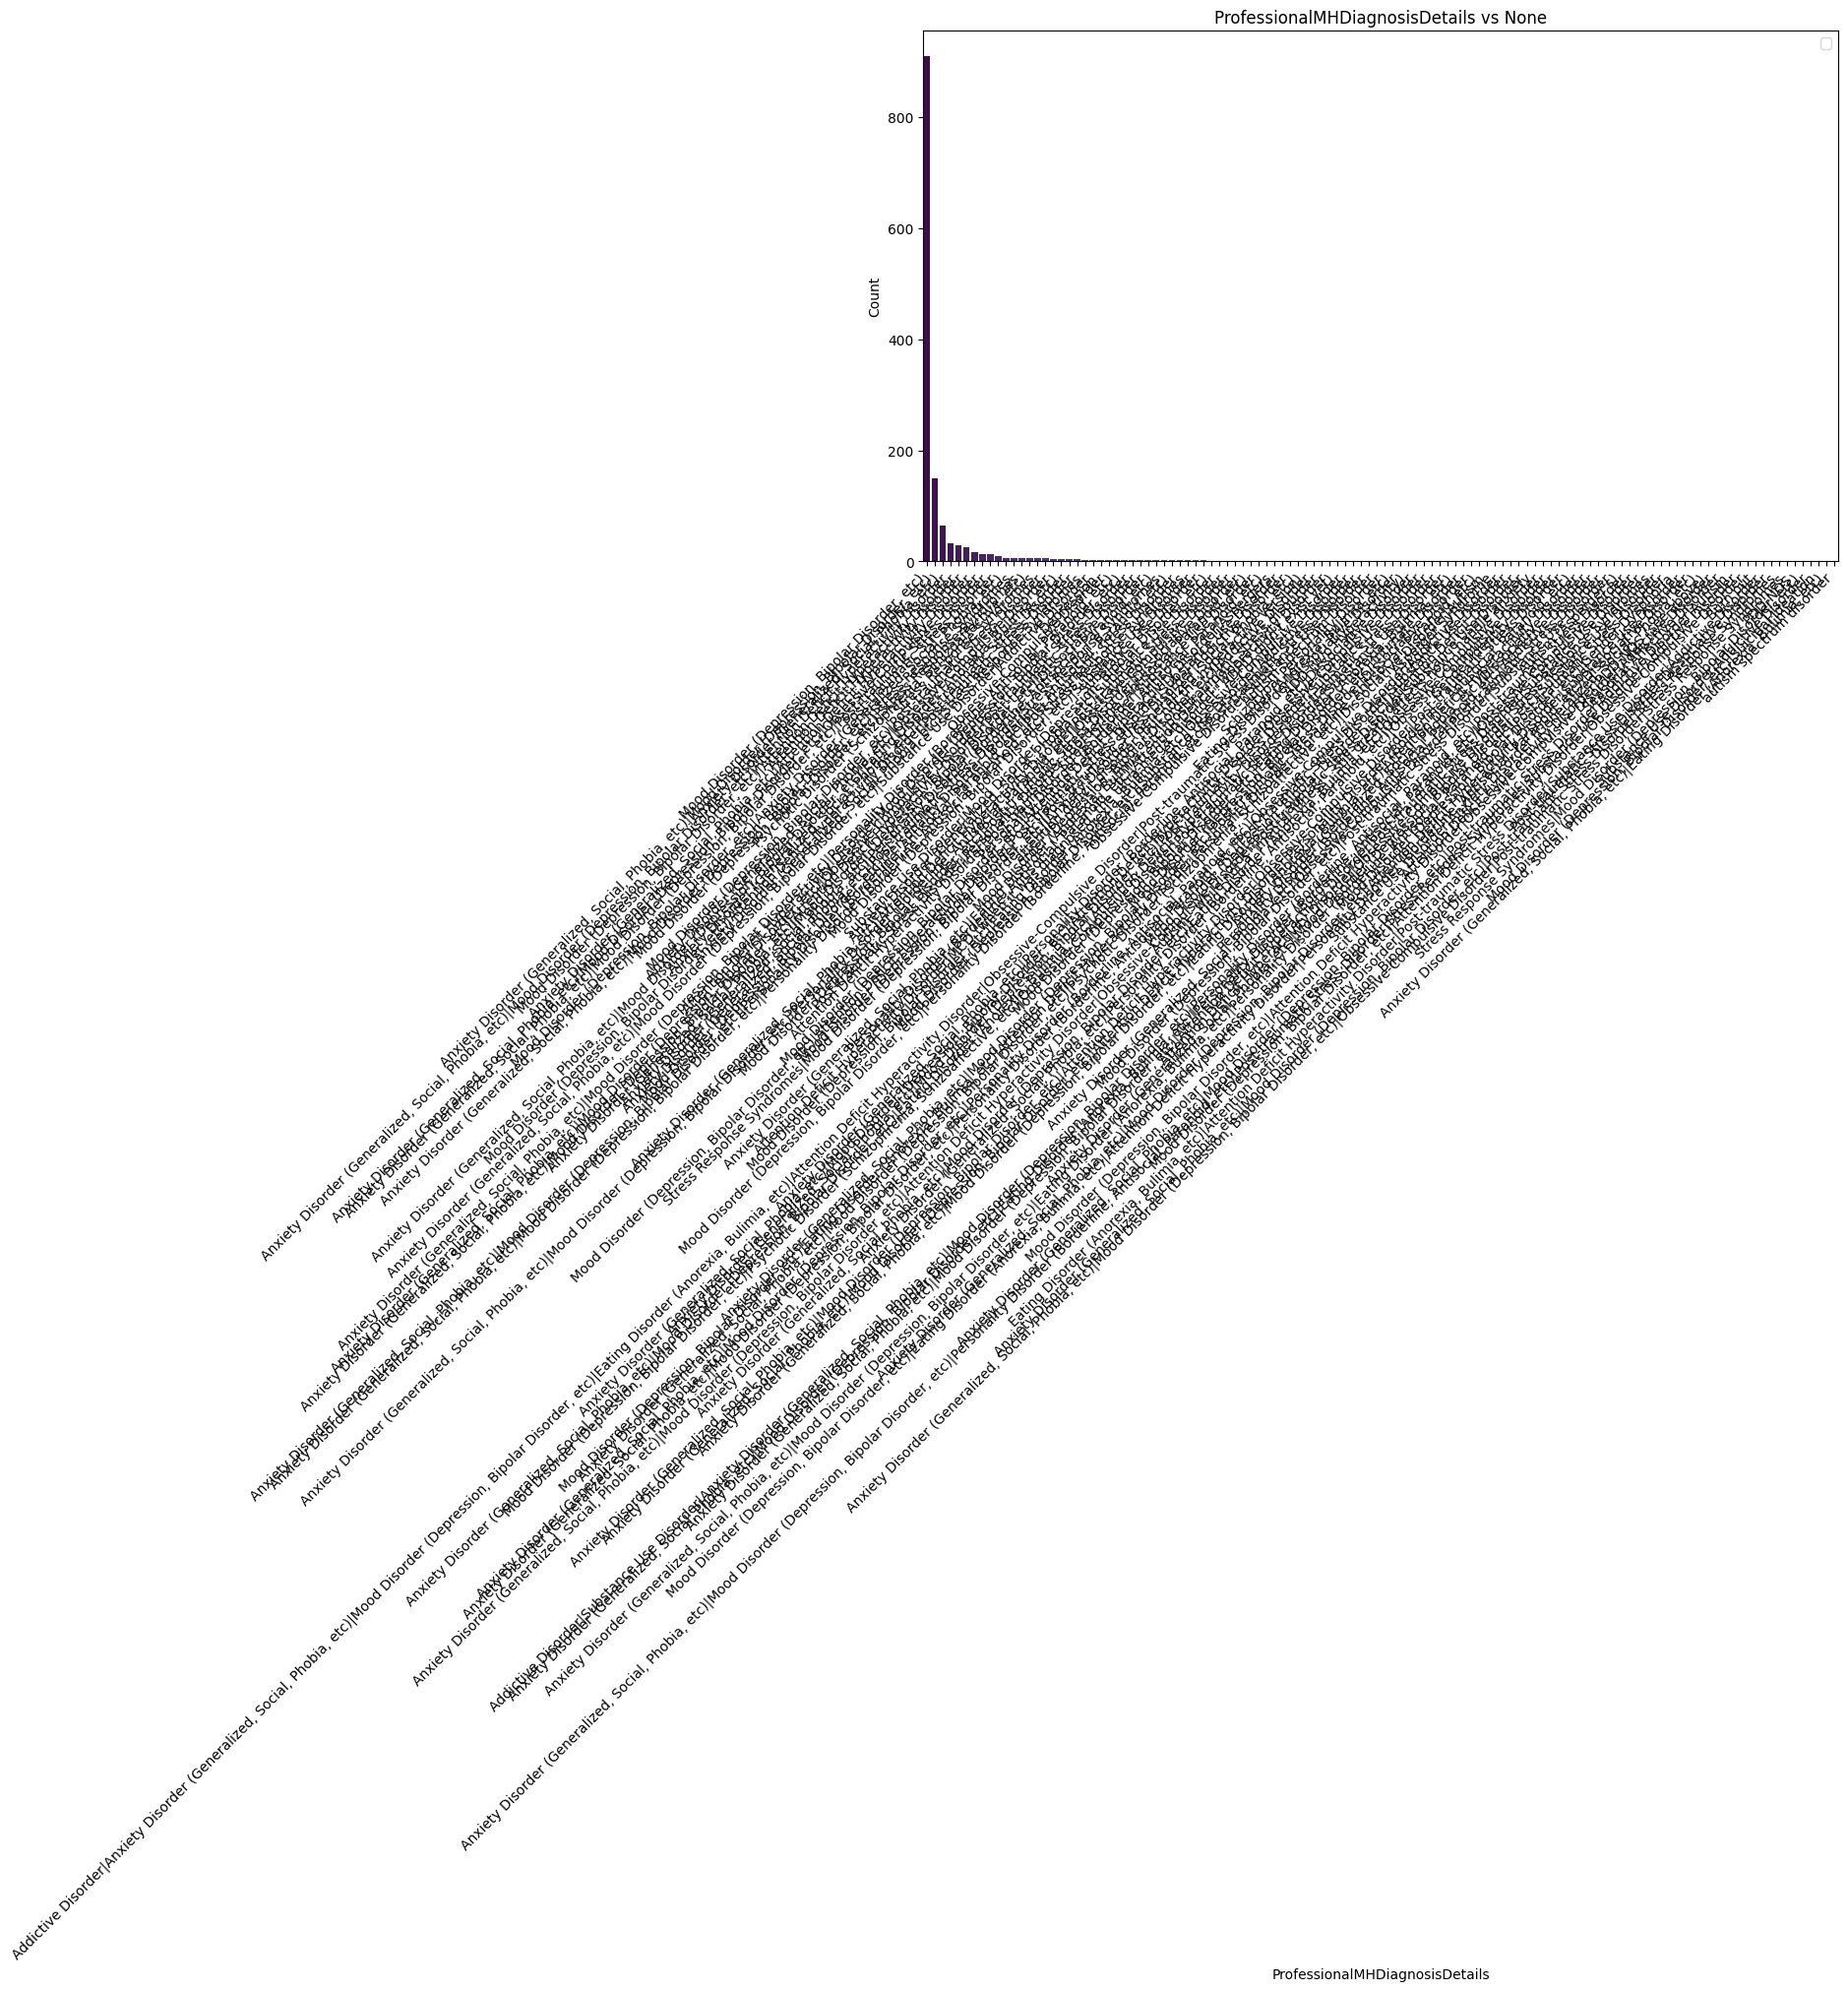

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


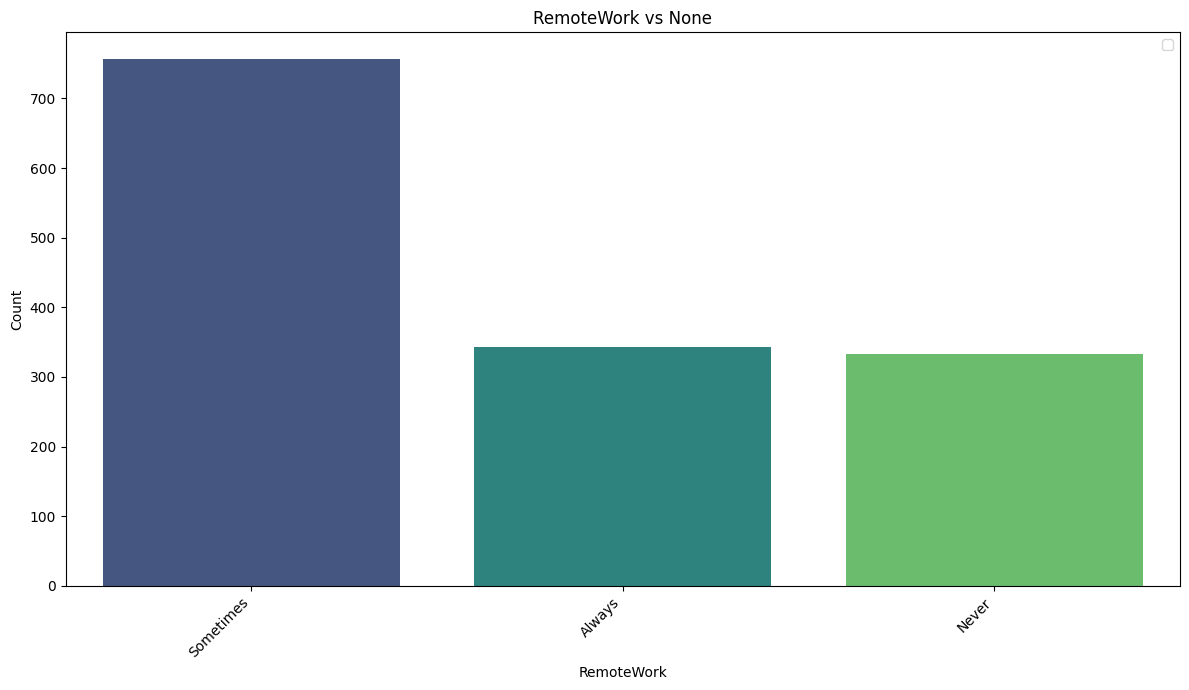

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


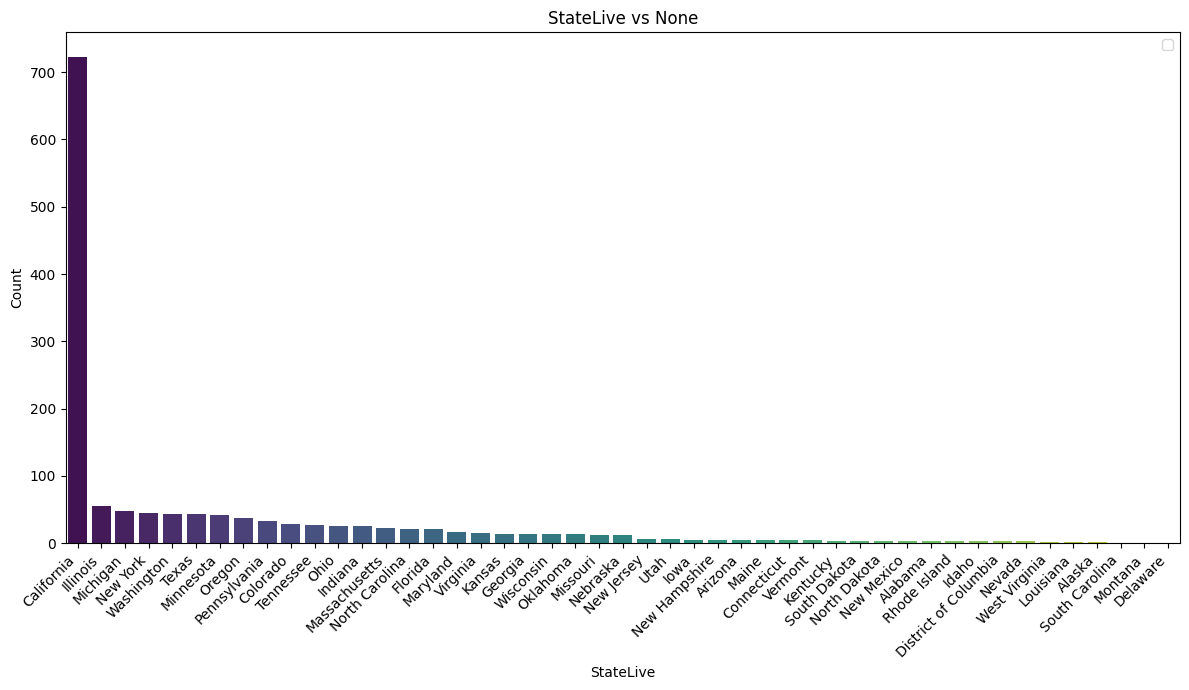

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


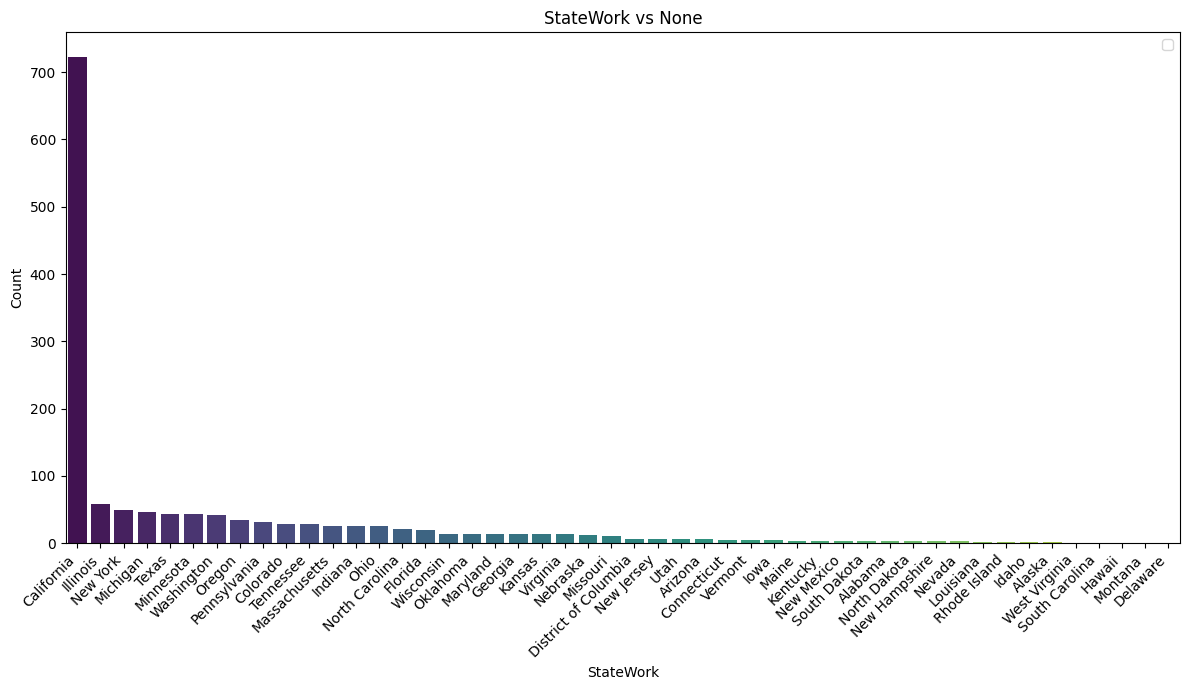

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue=target_variable_name, order=df[col].value_counts().index, palette='viridis')
c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_variable_name)


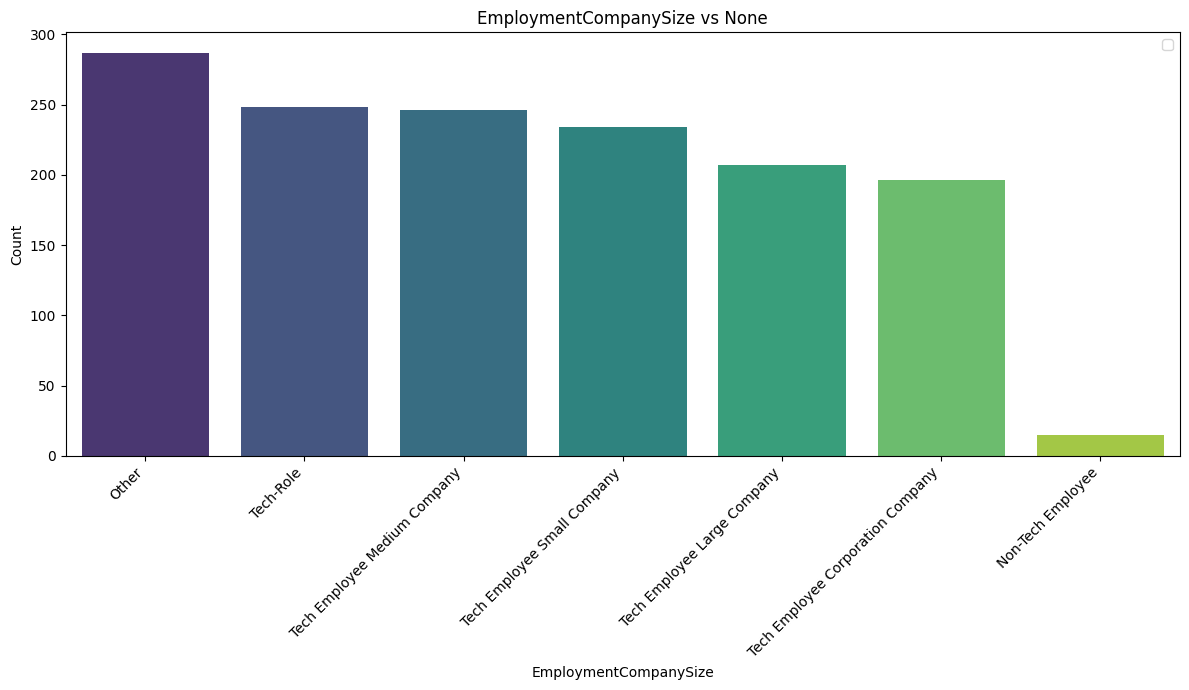

In [64]:
  # Get categorical columns
categorical_vs_target(df_cleaned, target_variable_name=target_variable, categorical_cols=categorical_cols)


c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_variable_name, y=col, data=df, palette='Set3')


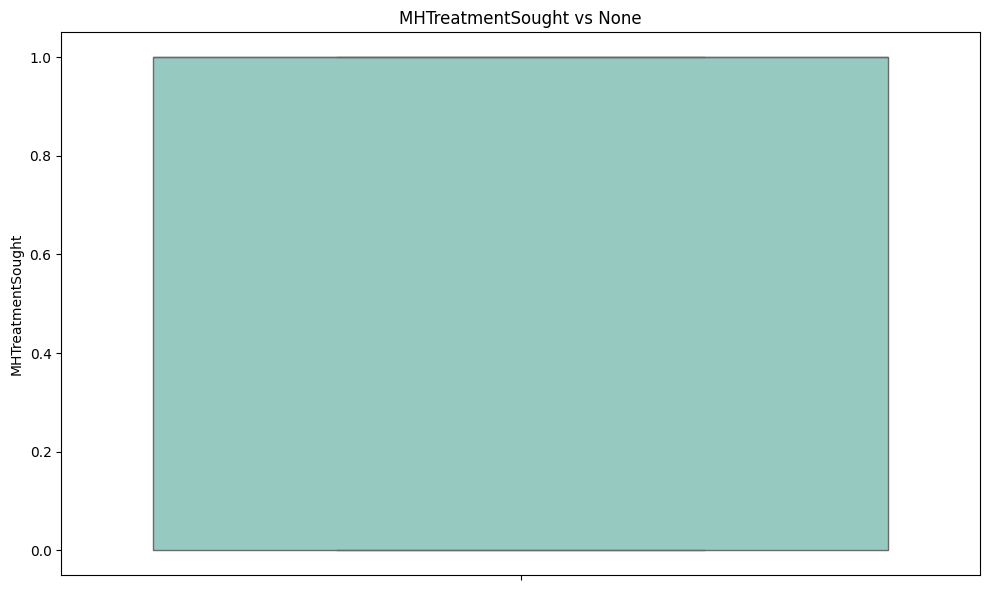

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_variable_name, y=col, data=df, palette='Set3')


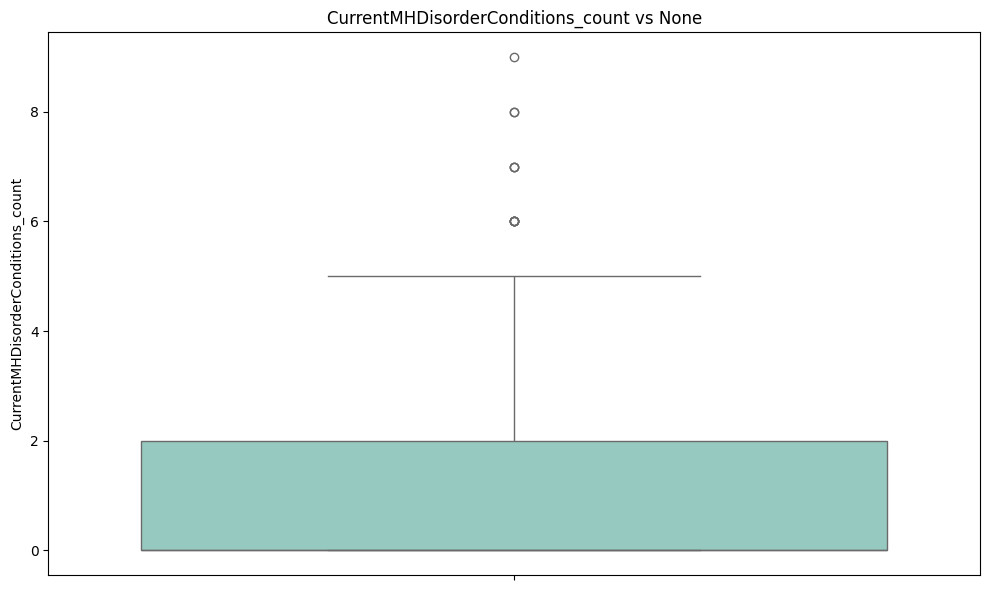

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_variable_name, y=col, data=df, palette='Set3')


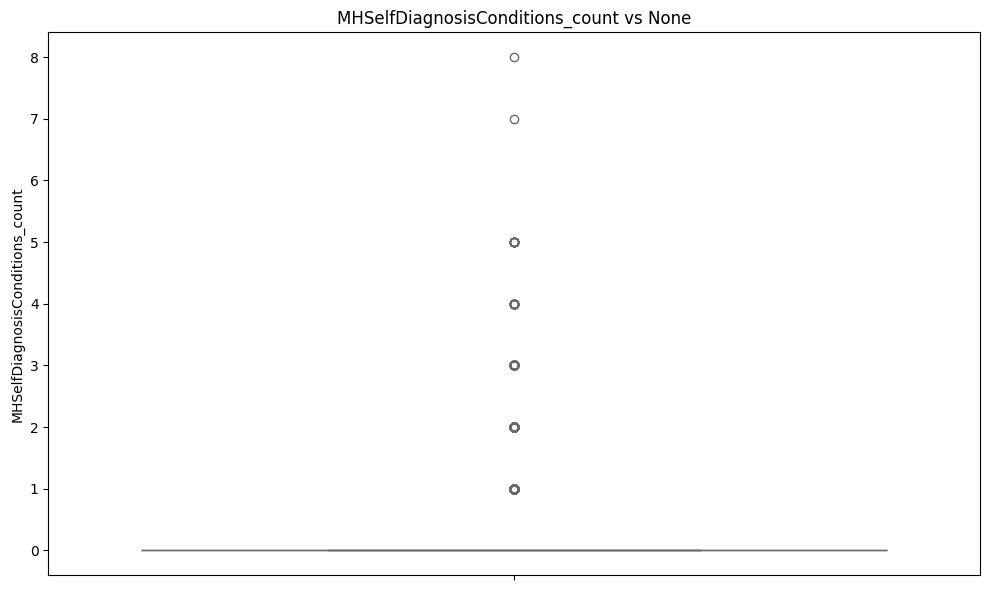

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_variable_name, y=col, data=df, palette='Set3')


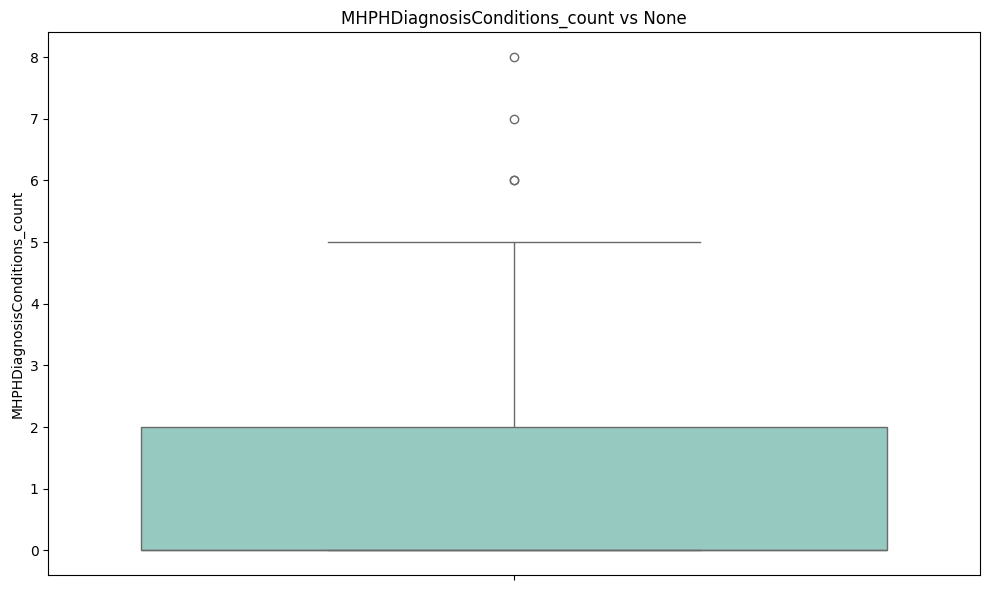

c:\Users\aswad\Desktop\NLP\Project\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\Predicting-and-Explaining-Mental-Health-of-Tech-Employees-using-SHAP\notebooks\..\src\visualizations.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_variable_name, y=col, data=df, palette='Set3')


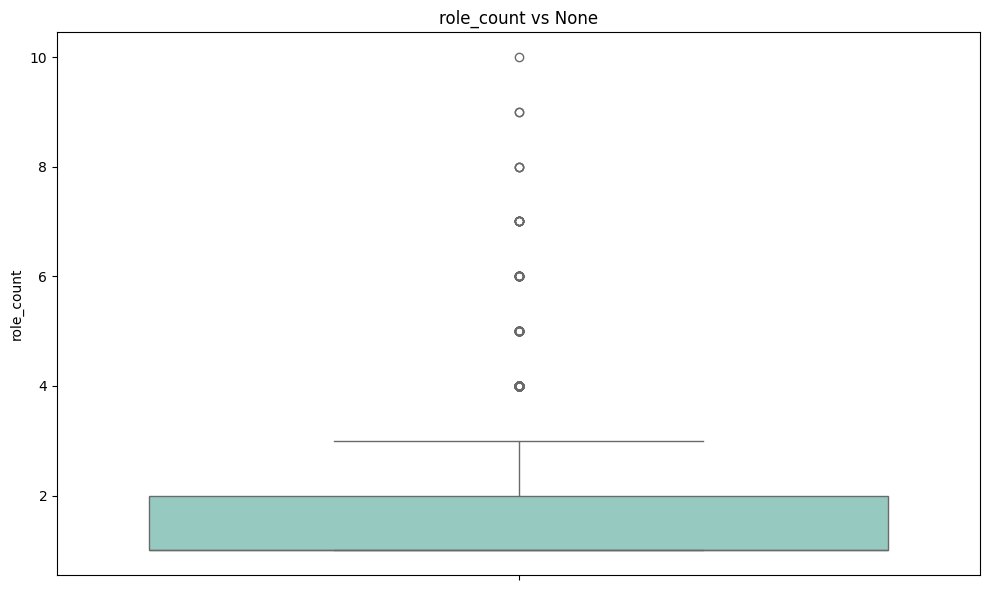

In [65]:
numerical_vs_target(df_cleaned, target_variable)


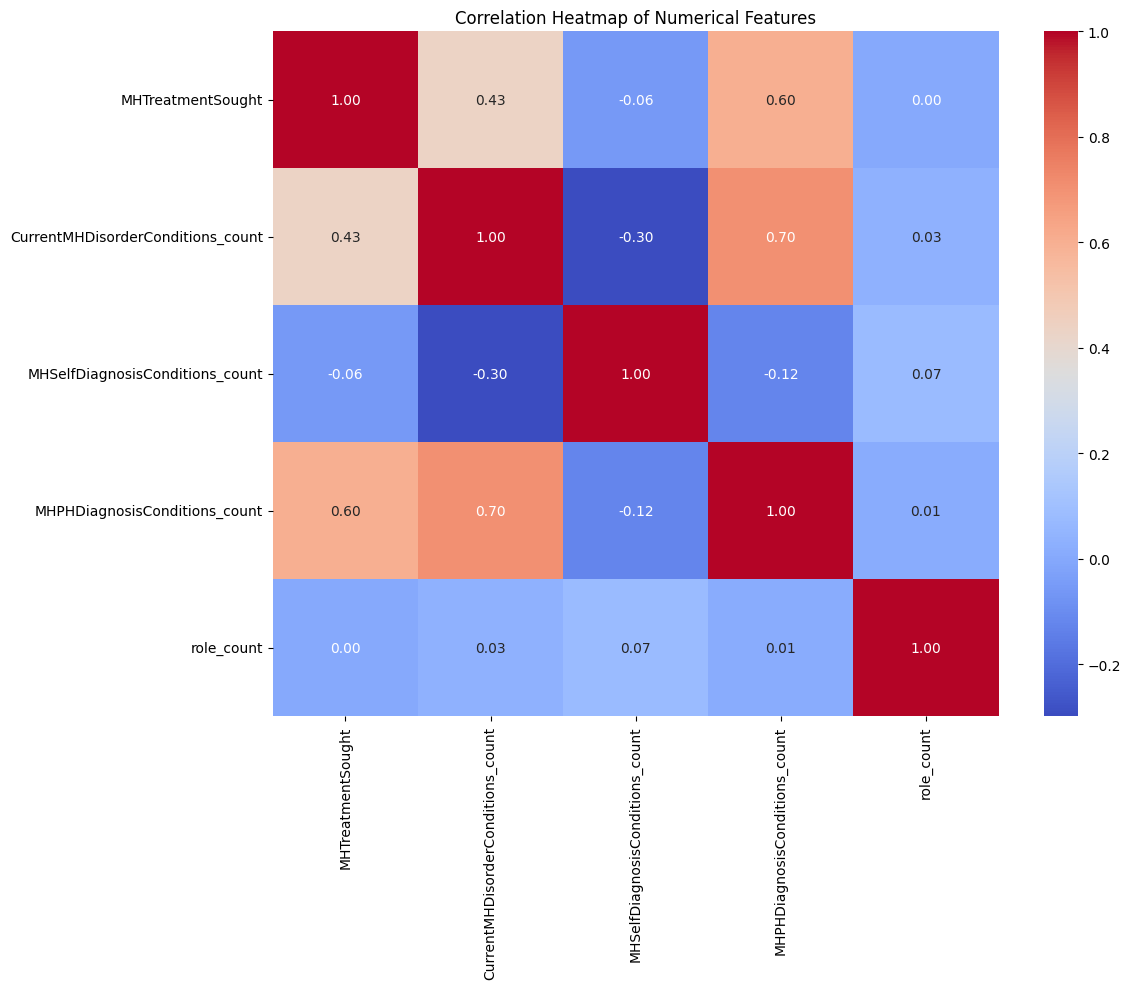

In [66]:
plot_correlation_heatmap(df_cleaned)

In [67]:
  # Get target variable.


print("\n--- Exploratory Data Analysis Completed ---")


--- Exploratory Data Analysis Completed ---


In [68]:
# --- Label Encoding ---
print("\n--- Label Encoding ---")
le = LabelEncoder()

# Target Variable Exploration and Encoding
target_variable = df_cleaned["CurrentMHDisorder"]
print(
    f"Target variable '{target_variable.name}' unique values: {target_variable.unique()}")
print(f"Data type of '{target_variable.name}': {target_variable.dtype}")


--- Label Encoding ---
Target variable 'CurrentMHDisorder' unique values: ['No' 'Yes' 'Maybe']
Data type of 'CurrentMHDisorder': object


In [69]:
target_encoded = le.fit_transform(target_variable)
target_encoded_series = pd.Series(target_encoded, name='target_encoded')
print("Target variable encoded.")
print("Label Encoding Mapping:")
for original_label, encoded_value in zip(le.classes_, le.transform(le.classes_)):
    print(f"{original_label}: {encoded_value}")

Target variable encoded.
Label Encoding Mapping:
Maybe: 0
No: 1
Yes: 2


In [70]:
# Encoding Categorical Features
categorical_df = df_cleaned.select_dtypes(exclude='number').drop(
    columns='CurrentMHDisorder', errors='ignore')
numerical_df = df_cleaned.select_dtypes(exclude=['object', 'category'])

encoded_categorical = encode_categorical_columns(categorical_df=categorical_df)
print("Categorical features encoded.")

Categorical features encoded.


In [71]:
# Dropping columns with multicollinearity (based on your previous analysis)
if 'StateLive' in encoded_categorical.columns and 'CountryLive' in encoded_categorical.columns:
    encoded_categorical.drop(
        columns=['StateLive', 'CountryLive'], inplace=True, errors='ignore')
    print("Potentially multicollinear columns 'StateLive' and 'CountryLive' dropped.")

Potentially multicollinear columns 'StateLive' and 'CountryLive' dropped.


In [72]:
# --- Data Concatination  ---
print("\n--- Data Splitting and Scaling ---")
X = pd.concat((encoded_categorical, numerical_df), axis=1)
y = target_encoded


--- Data Splitting and Scaling ---


In [73]:
# --- Data Scaling   ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [74]:
# --- Data Splitting  ---
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
X_dev, X_test, y_dev, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"Train size: {len(X_train)}")
print(f"Dev size: {len(X_dev)}")
print(f"Test size: {len(X_test)}")

Train size: 1003
Dev size: 215
Test size: 215


In [75]:
# --- Model Training and Evaluation on validation and test set---
print("\n--- Model Training and Evaluation ---")
models = get_models()


--- Model Training and Evaluation ---


In [76]:
results = {}

for name, mp in models.items():
    print(f"\n🔍 Tuning {name}...")
    grid = GridSearchCV(mp["model"], mp["params"], cv=5,
                        scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_

    # Evaluate on dev
    y_pred_dev = best_model.predict(X_dev)
    acc_dev = accuracy_score(y_dev, y_pred_dev)
    report_dev = classification_report(y_dev, y_pred_dev, output_dict=False)

    # Evaluate on test
    y_pred_test = best_model.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    report_test = classification_report(y_test, y_pred_test, output_dict=False)

    results[name] = {
        "model": best_model,
        "accuracy_dev": acc_dev,
        "report_dev": report_dev,
        "accuracy_test": acc_test,
        "report_test": report_test
    }


🔍 Tuning Random Forest...

🔍 Tuning XGBoost...


c:\Users\aswad\envs\nlp\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\aswad\envs\nlp\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\aswad\envs\nlp\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\aswad\envs\nlp\Lib\site-packages\xgboost\sklearn.py", line 1663, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^


🔍 Tuning Logistic Regression...


In [77]:
# Show model performance
print("\n✅ Final Model Comparison:")
for name, result in results.items():
    print(f"\n📌 {name}")
    print(f"Dev Accuracy:   {result['accuracy_dev']:.4f}")
    print(result["report_dev"])
    print(f"Test Accuracy:  {result['accuracy_test']:.4f}")
    print(result["report_test"])


✅ Final Model Comparison:

📌 Random Forest
Dev Accuracy:   1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        79
           2       1.00      1.00      1.00        87

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215

Test Accuracy:  0.9907
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        49
           1       0.98      1.00      0.99        80
           2       1.00      1.00      1.00        86

    accuracy                           0.99       215
   macro avg       0.99      0.99      0.99       215
weighted avg       0.99      0.99      0.99       215


📌 XGBoost
Dev Accuracy:   1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
     

In [78]:
# Optional: Find the best model on dev set
best_model_name = max(results, key=lambda x: results[x]["accuracy_dev"])
print(f"\n🏆 Best model based on Dev set accuracy: {best_model_name}")


🏆 Best model based on Dev set accuracy: Random Forest


In [79]:
# --- Model Evaluation Plots ---


print(f"""--- Model Evaluation Plots ---
      \n
      {plot_confusion_matrix(y_true, y_pred, title="Evaluation")}
      """)


for name, result in results.items():
    print(f"\n📊 Confusion Matrix for {name} (Test Set):")
    plot_confusion_matrix(y_test, result["model"].predict(
        X_test), f"{name} - Test Set")

NameError: name 'y_true' is not defined

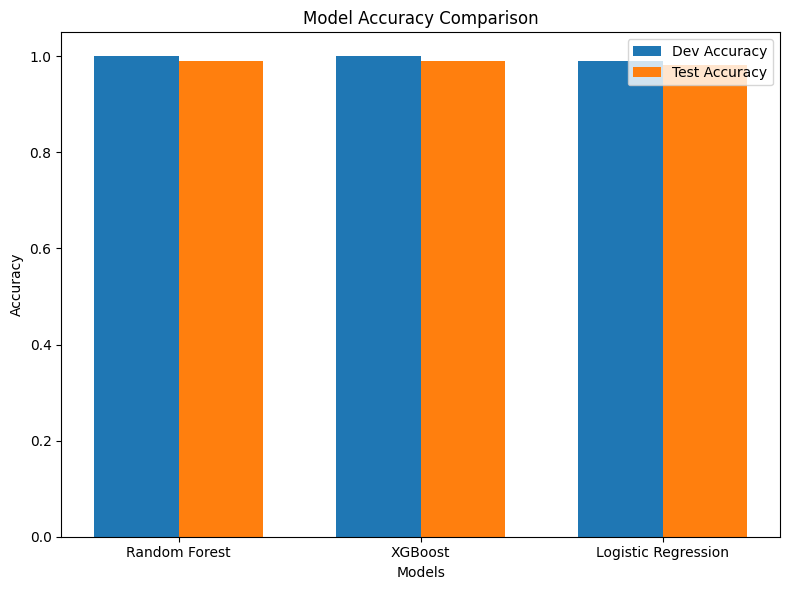

In [80]:
# Accuracy bar chart for dev/test sets
dev_scores = [results[m]["accuracy_dev"] for m in results]
test_scores = [results[m]["accuracy_test"] for m in results]
labels = list(results.keys())

x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, dev_scores, width, label='Dev Accuracy')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test Accuracy')

ax.set_ylabel('Accuracy')
ax.set_xlabel('Models')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

In [81]:
shap.initjs()
# Use TreeExplainer for tree-based models like XGBoost/Random Forest
explainer = shap.Explainer(results["Random Forest"]["model"])
shap_values = explainer(X_test)


C:\Users\aswad\AppData\Local\Temp\ipykernel_19768\1316676726.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar")


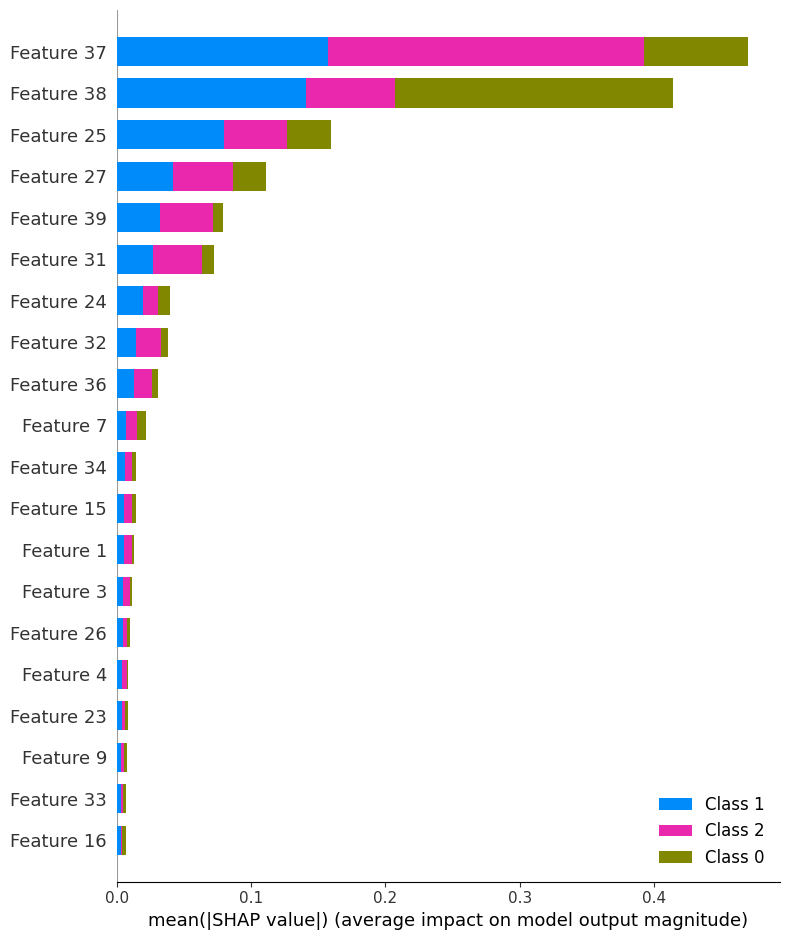

In [82]:

# SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")


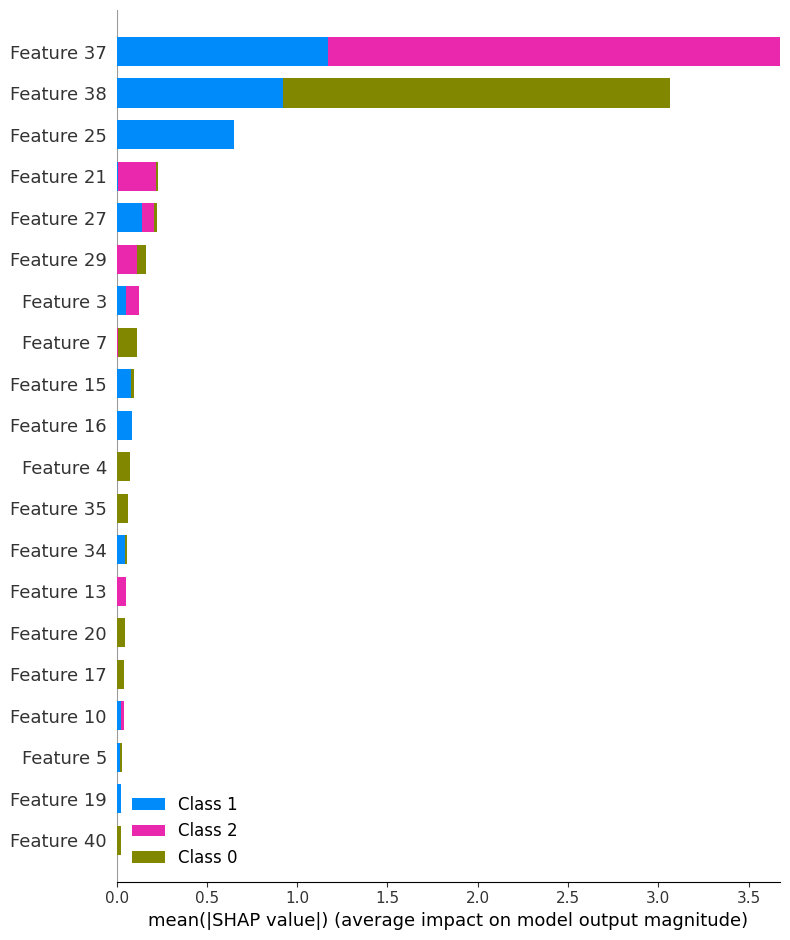

In [ ]:
# Detailed beeswarm plot
shap.summary_plot(shap_values, X_test)


In [ ]:
# Force plot for first instance
shap.plots.force(shap_values[0])


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

C:\Users\aswad\AppData\Local\Temp\ipykernel_19768\3857369642.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(lr_shap_values, X_dev[:100], feature_names=X.columns.to_list())


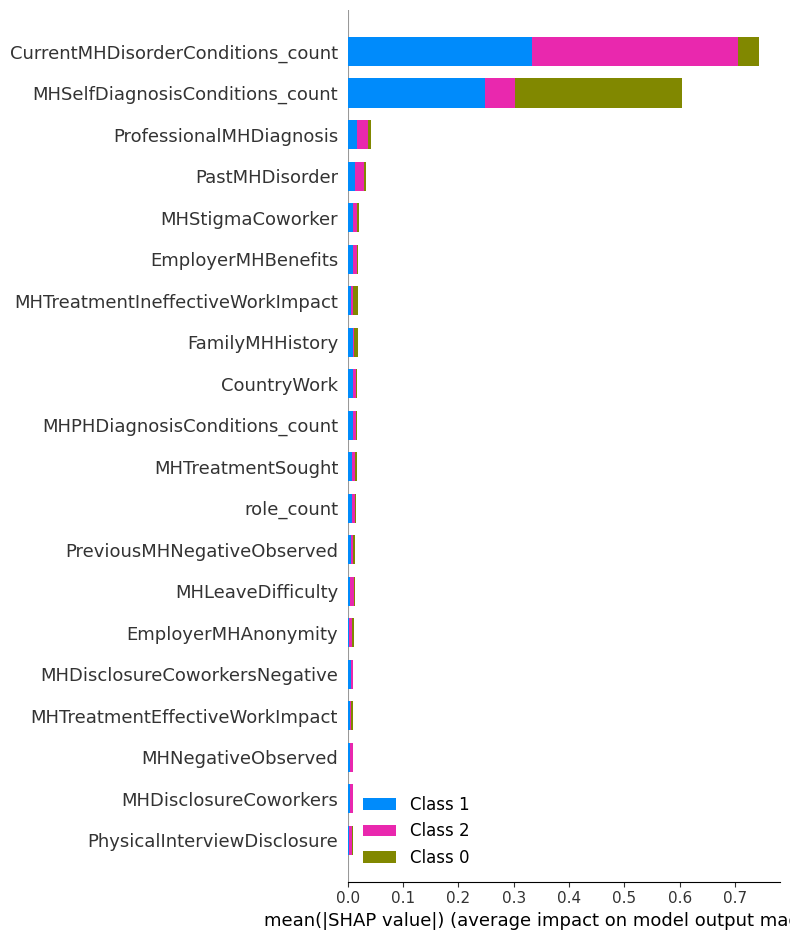

In [83]:
# KernelExplainer for non-tree models
lr_explainer = shap.Explainer(
    results["Logistic Regression"]["model"].predict_proba, X_dev)
lr_shap_values = lr_explainer(X_dev[:100])  # KernelExplainer is slow

shap.summary_plot(lr_shap_values, X_dev[:100], feature_names=X.columns.to_list())